# ANEOS SILICA MODEL DOCUMENTATION NOTEBOOK

## ANEOS FUSED SILICA v0.2

This Jupyter notebook provides documentation for a preliminary ANEOS model for fused SiO$_2$.

<b>Reference: Sarah T. Stewart and Kaitlyn A. Amodeo (2024). ANEOS Equation of State Model for Fused Silica. Zenodo. http://doi.org/10.5281/zenodo.XXX (https://github.com/ststewart/aneos-fused-silica/).</b><p>

When this model EOS is used, cite this doi-tagged Zenodo GitHub repository. Future updates to this EOS will be archived in Zenodo doi-tagged version-controlled releases.

Sarah T. Stewart
sstewa56@asu.edu
October 17, 2024

<b>VERSION INFORMATION</b><br>
EOS Version: Fused_Silica-ANEOSv0.2G1<br>
SLVT# translates to solid-liquid-vapor-thermal model adjustment-version number<br>
G1 = the gridded EOS tables used the gridflag=1 definition for the grid points<br>
SLVTv0.2G1 Release Date: 20241017<br>
GitHub: https://github.com/ststewart/aneos-fused-silica/<p>

This is a solid-liquid-vapor ANEOS model with ionization for SiO$_2$ glass. This model EOS uses the heat capacity adjustment factor described in Stewart et al. (AIP Conference Proceedings, 2020) and Stewart, ANEOS Code Modification: Thermal model adjustment parameter, https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/, 2019. <p>

This Jupyter notebook was used to develop and document ANEOS input parameters that are optimized to try to span very low pressures and temperatures to very high pressures and temperatures. <p>

<b>USAGE</b><br>
This notebook is designed to be used in two modes:<br>
<ul>
<li> Development mode: ANEOS is called in the local directory to generate new model output. The user can varying the model input parameters and tabular gridding schemes. This notebook produces plots of the equation of state surface and comparisons to experimental data and ab initio calculations.
<li> Release mode: the notebook interacts with previously created ANEOS model output. This notebook provides detailed documentation of a version-controlled release of the model EOS and enables users to interact with the EOS surface and compare the model to data. 
</ul>

This notebook is distributed in release mode. Users who wish to use the development mode can obtain the ANEOS source code from: Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019, November 1). M-ANEOS (Version 1.0). Zenodo. http://doi.org/10.5281/zenodo.3525030.<p>

Development mode:<br>
The notebook calls a local aneos executable which expects a formatted ANEOS.INPUT ascii file and an ascii gridtable.txt definition file that is generated by this notebook. ANEOS produces an ANEOS.OUTPUT ascii file and gridded ascii SESAME-format EOS tables.<br>
The user edits (1) the input parameters in ANEOS.INPUT (separately from this notebook) and (2) the output EOS table parameters in the notebook cell below.<br>
This notebook reads some parameters from ANEOS.INPUT and assumes that the variables are spaced by 10 columns.<br> 
When the notebook is run, the code issues a system call to run the aneos program in the local directory and reads in results from the ANEOS.OUTPUT, NEW-SESAME-STD.TXT, and NEW-SESAME-EXT.TXT files to make the plots below and to generate the GADGET format EOS table and other miscellaneous files.<p>

Release mode:<br>
This notebook reads in the provided ANEOS.INPUT, EOS tables, and other distribution data to generate the plots below. <p>

<b>OUTPUT/PROVIDED DATA FILES</b><br>
ANEOS.OUTPUT: Plain text file with an overview of the calculated equation of state. Look at this file for any errors in the EOS calculation.<br>

NEW-SESAME-STD.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy). 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-EXT.TXT: SESAME-style table with extra variables from ANEOS. Contains the standard 201 table and non-standard 301-extra-variables EOS table. The 301 table has: density grid values, temperature grid values, sp. entropy(T,rho), sound speed(T,rho), sp. heat capacity(T,rho), KPA flag(T,rho). 2-D arrays list all densities, looping over each temperature. 301 table units: g/cm$^3$, K, MJ/K/kg, cm/s, MJ/K/kg, integer flag, integer flag. The KPA flag is an ANEOS output with phase information. <br>

NEW-SESAME-HUG.TXT: Ascii table with the reference state Hugoniot. <br>

NEW-SESAME-MDQ.TXT: Ascii 301-style SESAME table with the MDQ rating. <br>

NEW-SESAME-IEP-BILINEAR.TXT: Standard length Sandia-style SESAME file with 201 table and 301-style table containing the IEP values for bilinear interpolation. Format: 1-D interpolated density points, 1-D interpolated temperature points, 2-D IEP arrays for pressure, sp. internal energy, Helmholtz free energy, sound speed). IEP units are ratios to the original calculated ANEOS point values. Located in the interpolation subdirectory.<br>

NEW-SESAME-STD-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-EXT-NOTENSION.TXT: SESAME-style table with extra variables from ANEOS. Contains the standard 201 table and non-standard 301-extra-variables EOS table where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. The 301 table has: density grid values, temperature grid values, sp. entropy(T,rho), sound speed(T,rho), sp. heat capacity(T,rho), KPA flag(T,rho). 2-D arrays list all densities, looping over each temperature. 301 table units: g/cm$^3$, K, MJ/K/kg, cm/s, MJ/K/kg, integer flag, integer flag. The KPA flag is an ANEOS output with phase information.

NEW-SESAME-GADGETINIT-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, specific entropy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/K/kg. <br>

NEW-GADGET2-STD-NOTENSION.TXT: Standard GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of pressure, temperature, specific internal energy, sound speed. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, dynes/cm$^2$, K, erg/g, cm/s. <br>

NEW-GADGET2-EXT-NOTENSION.TXT: Extended variables GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of Helmholtz free energy, KPA flag, MDQ flag. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, erg/g, integer flag, integer flag. <br>

The SESAME tabular equation of state formats are described in Lyon and Johnson (1992).<p>

<b>APPLICATIONS AND LIMITATIONS</b><br>
 
The reference state is the solid fused silica at STP. In ANEOS, the liquid model is a modification of the solid model. As a compromise to span the whole phase diagram, the solid does not represent the true polymorphs of SiO$_2$. The solid phases are simplified into two phases: a low-pressure phase and a denser, high-pressure phase. The heat capacity adjustment parameter is adjusted to match the estimated heat capacity of the liquid as determined from shock temperature data. The calculated shock temperatures provide a good fit to the data. The model Debye tempereature is not the true value for the solid; the Debye temperature was fitted to attain the desired specific entropy at boiling at 1 bar. The temperatures in the liquid field are much improved with the adjusted heat capacity compared to previous ANEOS models using the Dulong-Petit limit.

This high-pressure phase transition introduces artificial discontinuities in the liquid field and along the melt curve. This model becomes increasingly erroneous for shock pressures above about 800-1000 GPa as the curvature on the Hugoniot and the Grueneisen parameter are not correct at extremely high densities. The functional form for the Gruneisen parameter in ANEOS has difficulty matching the properties of silicate liquids, and this model does not approach the Thomas-Fermi limit.<p>

The experimental constraints on the melt curve for SiO$_2$ are poor. This preliminary model is tuned to agree at low pressures and is likely unreliable at high pressures.

The calculated vapor curve is skewed with a high temperature and low density, although it is close to the 1 bar values. <p>

<b>ANEOS NOTES</b><br>
This work uses v1.0 of M-ANEOS released on Zenodo: Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019). M-ANEOS (1.0). Zenodo. https://doi.org/10.5281/zenodo.3525030
This version included Melosh's (2007) treatment for molecular gas and the capability to include a melt curve and solid-solid/liquid-liquid transition (Collins & Melosh LPSC 2014). This version includes an adjustment to the Debye model for the thermal term in the Helmholtz free energy to approach a user-defined heat capacity at high temperatures. The multiplicative factor $f_{cv}$ is entered in input value V44, and the high-temperature heat capacity is $3f_{cv}Nk$.<p>
The ANEOSTEST.f routine was modified to output tabulated EOS. Note that the current version of this function sets positive pressures smaller than 1.E-30 GPa equal to 1.E-30 GPa.<br>
ANEOS2.f was modified to increase the number of points tabulated on the melt curve in the ANEOS.OUTPUT file and to gather the variables for the heat capacity modification.<br>
ANHUG.f was modified to output more Hugoniot points.<br>
ANEOS1.f and ANEOS2.f were modified to increase the high temperature limit for the heat capacity (Stewart et al., AIP Conference Proceedings, 2020).<p>

<b>CORRECTIONS AND IMPROVEMENTS</b><br>
Please send corrections to STS and any requests for data to include in the model-data comparison plots.<p>

In [1]:
# defines class objects for extEOStable and functions to read in ANEOS input and output
# READ THIS CODE IF YOU WANT TO UNDERSTAND THE OBJECT STRUCTURES

%run import-modules

Platform:  Darwin Kernel Version 24.0.0: Tue Sep 24 23:37:25 PDT 2024; root:xnu-11215.1.12~1/RELEASE_ARM64_T6030
python version:  3.11.9
matplotlib version:  3.9.1
hvplot version:  0.10.0
numpy version:  2.0.1
pandas version:  2.2.2



In [2]:
# THIS CELL DEFINES FUNCTIONS AND CUSTOMIZATIONS
#
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["patch.force_edgecolor"] = True
#
# define index function (must be a more efficient way to do this...)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
#
# this prevents some error messages for inline plotting in a jupyter notebook
%matplotlib inline 
#
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

    return artists


In [3]:
# Remember the versions used to run python code
# copy this cell into your own notebooks
# add additional modules to the list in the f.write statements

# Record the verions information for these calculation for posterity
from platform import python_version
from matplotlib import __version__ as mplversion
from numpy import __version__ as npversion
from scipy import __version__ as scipyversion
from pandas import __version__ as pdversion
from eos_table import __version__ as etabversion

# Get date and time values in ISO 8601 format
# importing datetime and time module
# Calling the isoformat() function over the current time including time zone:
import datetime
import zoneinfo
DateTime_in_ISOFormat = datetime.datetime.now(zoneinfo.ZoneInfo('America/Los_Angeles')).isoformat('T', 'seconds') #

versionfilename = './python-versions.txt'
with open(versionfilename, 'a') as f:
    f.write('---------------------------\n')
    f.write(DateTime_in_ISOFormat+'\n')
    f.write('python '+python_version()+'\n')
    f.write('numpy '+npversion+'\n')
    f.write('scipy '+scipyversion+'\n')
    f.write('matplotlib '+mplversion+'\n')
    f.write('pandas '+pdversion+'\n')
    f.write('eos_table '+etabversion+'\n')
    f.write('---------------------------\n')

# Printing Today's date and time in ISO format
print(f"Version history file {versionfilename}")
print(f"Date and time {DateTime_in_ISOFormat}")
print('python '+python_version())
print('numpy '+npversion)
print('scipy '+scipyversion)
print('matplotlib '+mplversion)
print('pandas '+pdversion)
print('eos_table '+etabversion)


Version history file ./python-versions.txt
Date and time 2024-10-18T08:51:18-07:00
python 3.11.9
numpy 2.0.1
scipy 1.14.0
matplotlib 3.9.1
pandas 2.2.2
eos_table 1.1.4


## USER INPUTS FOR SESAME AND GADGET2 TABLE CONSTRUCTION

If the code cell below is hidden, use the button above to reveal the cell.<p>

In development mode, the user must input:<br>
1. Header information for the SESAME table.<br>
2. Temperature, density and entropy grid points.<p>

The following code cell also includes the development mode flag and 
option to skip construction of a GADGET2 table if it is not needed.<p>

In [4]:
# -------------------------------------------------------------
# USER INPUTS
#-------------------------------------------------------------
# NOTEBOOK MODE
#-------------------------------------------------------------
#
DEVMODE = 0 # 1=development mode; 0=release mode
#
#-------------------------------------------------------------
# OPTIONS TO REMOVE TENSION REGION AND CONSTRUCT A GADGET2 TABLE
#-------------------------------------------------------------
#
REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region
MAKEGADGETTABLE=1  # 1=make table; 0=do not make gadget2 table
#
#-------------------------------------------------------------
# USER MUST SET THESE VALUES TO DEFINE THE TABULATED EOS GRIDS
#-------------------------------------------------------------
#
# ====>>>>>> YOU NEED TO MAKE SURE THESE VALUES MATCH ANEOS.INPUT  <<<<=====
MATERIALNAME = 'silica'
MODELNAME = 'Fused-silica-ANEOS-SLVTv0.2G1'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 220227.     # Date as a single 6-digit number YYMMDD
VERSION = 0.1      # ANEOS Parameters Version number
FMN = 30.          # Formula weight in atomic numbers for silica
FMW = 60.083       # Formula molecular weight (g/mol)
# The following define the default initial state for material in the 201 table
R0REF   = 2.20     # g/cm3 *** R0REF is inserted into the density array
K0REF   = 4.0E11   # dynes/cm2
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
# generate output files for other ANEOS models
modelflag = 0   # 0 - don't change anything above; 1 - Melosh MAPS 2007
#
if modelflag == 1:
    MODELNAME = 'Silica_Melosh_2007'
    # Header information must all be compatible with float format
    MATID = 1.0        # MATID number
    DATE = 070513.     # Date as a single 6-digit number YYMMDD
    VERSION = 1.0      # ANEOS Parameters Version number
    FMN = 30.          # Formula weight in atomic numbers for silica
    FMW = 60.083       # Formula molecular weight (g/mol)
    # The following define the default initial state for material in the 201 table
    R0REF   = 2.65     # g/cm3 *** R0REF is inserted into the density array
    K0REF   = 3.58E11  # dynes/cm2
    T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
    P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
#-------------------------------------------------------------
# EXAMPLE EOS GRID ARRAYS
#-------------------------------------------------------------
#
# Life is easier if the grid arrays are even in length (after adding T0REF and R0REF below)
#
# Flag for easily switching between different table grids during model development
# 0: low res for testing
# 1: high res for production
gridflag = 11
#
#------------------------------------------------------
if gridflag == 99: # low res for testing
    gridtvals  = [0, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [30., 30.,20.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    gridrvals  = [1.e-20, 0.1, 2.4, 3.0, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [20, 10, 6, 30, 20] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [80] # number of grid points in each segment
#
if gridflag == 0: # medium resolution grid <1E7 entries in 301 table. This is about 250,000 values.
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # 298 K is inserted into the table if it is not present in the original array
    gridtvals  = [0, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [200.,200.,151.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.1, 2.4, 3.0, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [150, 76, 55, 206, 40] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [0.,0.03] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [1] # 1 for linear, 0 for log in each segment
    gridsnpts  = [500] # number of grid points in each segment
#
if gridflag == 1: # new form for the high resolution table entries in 301 table. Try for 1e6 values
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [0, 100, 1600, 2000, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [2, 151., 140, 300.,100.,50.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.1, 2.4, 3.0, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [200, 100, 160, 300, 100] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [800] # number of grid points in each segment

if gridflag == 11: # new form for the high resolution table entries in 301 table. Try for 1e6 values
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [0, 100, 1600, 2000, 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [5, 201., 200, 200.,50.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-30, 0.1, 2.4, 3.0, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [300, 100, 160, 200, 100] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [800] # number of grid points in each segment
#----------------------------------------
# END USER INPUT
#----------------------------------------

In [5]:
# THIS CELL HAS CODE TO GENERATE THE GRIDS AND WRITES TO A FILE TO BE READ BY ANEOS
print('GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.')
#-------------- the following code generates the temperature array
gridtarr = []
for iir in  range(1,len(gridtvals)):
    if gridtstyle[iir-1] == 1:
        # linear region
        temptarr = np.arange(gridtnpts[iir-1])/gridtnpts[iir-1]*(gridtvals[iir]-gridtvals[iir-1])+gridtvals[iir-1]
    if gridtstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridtvals[iir])-np.log10(gridtvals[iir-1]))/gridtnpts[iir-1]
        temptarr = np.power(10.,np.log10(gridtvals[iir-1])+(np.arange(gridtnpts[iir-1]))*logstep)
    gridtarr = np.concatenate((gridtarr,temptarr))
# check if T0REF already in the grid
#indexT0REF = get_indexes(T0REF,gridtarr)
indexT0REF = np.where(abs(T0REF-gridtarr)<1.E-4)[0]
if len(indexT0REF) == 0:
    # insert T0REF K into the array
    indexT0REF = np.where((gridtarr-T0REF)>0.)[0]
    gridtarr = np.concatenate((gridtarr[0:indexT0REF[0]],[T0REF],gridtarr[indexT0REF[0]::]))
    if indexT0REF[0]>1:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-2:indexT0REF[0]+3])
    else:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-1:indexT0REF[0]+3])
else:
    print('T0REF already in temperature array: ',T0REF,gridrarr[indexT0REF[0]-2:indexT0REF[0]+2])
# Remove 0 K or convert to 1 K
indexzero = get_indexes(0.,gridtarr)
indexone = get_indexes(1.,gridtarr)
if len(indexzero) == 1 and len(indexone) == 0:
    gridtarr[indexzero] = 1.
    print('Zero kelvin changed to 1 kelvin.')
else:
    gridtarr = np.delete(gridtarr, indexzero)
    print('Deleted zero K index.')
#
#gridtsize = len(grdtarr)
print('Number of temperature points: ',len(gridtarr))
#print(gridtarr)
#------------ the following code generates the density array
gridrarr = []
for iir in range(1,len(gridrvals)):
    if gridrstyle[iir-1] == 1:
        # linear region
        temprarr = np.arange(gridrnpts[iir-1])/gridrnpts[iir-1]*(gridrvals[iir]-gridrvals[iir-1])+gridrvals[iir-1]
    if gridrstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridrvals[iir])-np.log10(gridrvals[iir-1]))/gridrnpts[iir-1]
        temprarr = np.power(10.,np.log10(gridrvals[iir-1])+(np.arange(gridrnpts[iir-1]))*logstep)
    gridrarr = np.concatenate((gridrarr,temprarr))
# check if R0REF already in the grid
#indexR0REF = get_indexes(R0REF,gridrarr)
indexR0REF = np.where(abs(R0REF-gridrarr)<1.E-4)[0]
if len(indexR0REF) == 0:
    # insert R0REF  into the array
    indexR0REF = np.where((gridrarr-R0REF)>0.)[0]
    gridrarr = np.concatenate((gridrarr[0:indexR0REF[0]],[R0REF],gridrarr[indexR0REF[0]::]))
    print('Inserted the REFERENCE DENSITY INTO THE ARRAY:',gridrarr[indexR0REF[0]-2:indexR0REF[0]+3])
    #print('NOT INSERTING REFERENCE DENSITY INTO THE ARRAY.')
else:
    print('R0REF already in density array: ',R0REF,gridrarr[indexR0REF[0]-2:indexR0REF[0]+2])
# Remove 0 g/cm3 if present
indexzero = get_indexes(0.,gridrarr)
if len(indexzero) == 1:
    gridrarr = np.delete(gridrarr, indexzero)
    print('Deleted zero g/cm3 index.')
#
#gridrsize = len(gridrarr)
print('Number of density points: ',len(gridrarr))
#print(gridrarr)
#------------ the following code generates the specific entropy array for gadget tables
gridsarr = []
for iir in range(1,len(gridsvals)):
    if gridsstyle[iir-1] == 1:
        # linear region
        tempsarr = np.arange(gridsnpts[iir-1])/gridsnpts[iir-1]*(gridsvals[iir]-gridsvals[iir-1])+gridsvals[iir-1]
    if gridsstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridsvals[iir])-np.log10(gridsvals[iir-1]))/gridsnpts[iir-1]
        tempsarr = np.power(10.,np.log10(gridsvals[iir-1])+(np.arange(gridsnpts[iir-1]))*logstep)
    gridsarr = np.concatenate((gridsarr,tempsarr))
# Remove 0 MJ/K/kg if present
indexzero = get_indexes(0.,gridsarr)
if len(indexzero) == 1:
    gridsarr[indexzero]=1.e-20
#    gridsarr = np.delete(gridsarr, indexzero)
    print('replaced zero MJ/K/kg index with 1.E-20')
#gridssize = len(gridsarr)
#
print('Number of specific entropy points: ',len(gridsarr))
#print(gridsarr)

print('Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*3.)
#-----------------------------------------------------------
#
if DEVMODE:
    print('WRITING tablegrid.txt FOR ANEOS in the local directory.\n')
    # write the table arrays to a file for the ANEOS driver to read in
    tablegridfile = open("tablegrid.txt","w")  
    tablegridfile.write("{:.6e}".format(MATID)+'\n')  
    tablegridfile.write("{:.6e}".format(DATE)+'\n')  
    tablegridfile.write("{:.6e}".format(VERSION)+'\n')  
    tablegridfile.write("{:.6e}".format(FMN)+'\n')  
    tablegridfile.write("{:.6e}".format(FMW)+'\n')  
    tablegridfile.write("{:.6e}".format(R0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(K0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(T0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(len(gridrarr))+'\n')  # number of density points
    tablegridfile.write("{:.6e}".format(len(gridtarr))+'\n')  # number of temperature points
    for i in range(0,len(gridrarr)):
        tablegridfile.write("{:.6e}".format(gridrarr[i])+'\n')
    for i in range(0,len(gridtarr)):
        tablegridfile.write("{:.6e}".format(gridtarr[i])+'\n')
    tablegridfile.close()
#
#-----------------------------------------------------
# Output GADGET2 Table information
if MAKEGADGETTABLE:
    print('Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*8.)
#------------------------------------------------------

#----------------------------------------------------
# Sp. Internal Energy grid for Tillotson
#tillearr = np.power(10.,np.arange(600)/600.*6.-3.) # MJ/kg
#tillearr = np.append(0.,tillearr)
#print('Number of specific internal energy points for Tillotson EOS: ',len(tillearr))
#----------------------------------------------------
# Paranoia check
# make sure all table grid values are unique
if (len(np.unique(gridtarr))!=len(gridtarr)):
    print('NON-UNIQUE VALUES IN TEMP ARRAY')
    stopthecode
if (len(np.unique(gridrarr))!=len(gridrarr)):
    print('NON-UNIQUE VALUES IN DENSITY ARRAY')
    stopthecode
if (len(np.unique(gridsarr))!=len(gridsarr)):
    print('NON-UNIQUE VALUES IN SP. ENTROPY ARRAY')
    stopthecode
#if (len(np.unique(tillearr))!=len(tillearr)):
#    print('NON-UNIQUE VALUES IN SP. ENERGY ARRAY')
#    stopthecode

#----------------------------------------------------

print('\nDone generating EOS grids.\n')
print('\nCHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.\n')

# END TABLE GRIDDING INFORMATION

GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.
Inserted the REFERENCE TEMPERATURE INTO THE ARRAY: [286.56716418 294.02985075 298.         301.49253731 308.95522388]
Zero kelvin changed to 1 kelvin.
Number of temperature points:  657
Inserted the REFERENCE DENSITY INTO THE ARRAY: [2.17  2.193 2.2   2.216 2.239]
Number of density points:  861
Number of specific entropy points:  800
Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)= 1698551.0
WRITING tablegrid.txt FOR ANEOS in the local directory.

Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)= 4526936.0

Done generating EOS grids.


CHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.



In [6]:
if DEVMODE:
    # call aneos in the local directory
    # output file is in the local directory
    print('RUNNING IN DEVELOPMENT MODE')
    print('Calling aneos in the local directory.')
    completed = subprocess.run(['./aneos-mbam3'])
    print('Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.')
    print('aneos call result: ', completed.returncode)
    print('Check ANEOS.OUTPUT file for errors.')
else:
    print('RUNNING IN RELEASE MODE: NO ANEOS SYSTEM CALL.')
    print('READING IN EOS DISTRIBUTION FILES.')

RUNNING IN DEVELOPMENT MODE
Calling aneos in the local directory.
Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.
aneos call result:  0
Check ANEOS.OUTPUT file for errors.


In [7]:
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
NewEOS  = etab.extEOStable() # FIRST make new empty EOS object
NewEOS.loadextsesame('NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.loadstdsesame('NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.MODELNAME = MODELNAME # string set above in user input
NewEOS.MDQ = np.zeros((NewEOS.NT,NewEOS.ND)) # makes the empty MDQ array
#print(NewEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
NewEOS.MATID   = MATID
NewEOS.DATE    = DATE
NewEOS.VERSION = VERSION
NewEOS.FMN     = FMN
NewEOS.FMW     = FMW
NewEOS.R0REF   = R0REF
NewEOS.K0REF   = K0REF
NewEOS.T0REF   = T0REF
NewEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
NewEOS.loadaneos(aneosinfname='ANEOS.INPUT',aneosoutfname='ANEOS.OUTPUT')
#
# calculate the principal Hugoniot from the table
if DEVMODE:
    # calculate the Hugoniot and write to a file. This is from the ANEOS REFERENCE STATE
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,writefilename='NEW-SESAME-HUG.TXT')
    # calculate the Hugoniot and write to a file pyrolitic Glass initial state, which is not on this EOS surface (proxy crystalline solid + liquid + vapor)
    # this result is basically the same as the requested Hugoniot at r0 and t0, where ANEOS interprets the initial density to be in tension. Differences at very low pressures.
    #NewEOS.calcOffEOSHugoniot(r0=2.20,t0=298.,p0=1.e-4,e0=0.1565,r1=2.65,writefilename='NEW-SESAME-HUG-GLASS.TXT')
    NewEOS.calcOffEOSHugoniot(r0=2.20,t0=298.,p0=1.e-4,e0=0.,r1=2.65,writefilename='NEW-SESAME-HUG-GLASS.TXT')
else:
    # just calculate the Hugoniot and put it in the EOS object
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)
#    NewEOS.calcOffEOSHugoniot(r0=2.20,t0=298.,p0=1.e-4,e0=0.1565,r1=2.65,writefilename='NEW-SESAME-HUG-GLASS.TXT')
    NewEOS.calcOffEOSHugoniot(r0=2.20,t0=298.,p0=1.e-4,e0=0.,r1=2.65,writefilename='NEW-SESAME-HUG-GLASS.TXT')
#
# 9390/.06/1.e6=0.1565 Richet 9390 J/mol -> MJ/kg
# calculate the 1-bar profile; loop over temp
NewEOS.onebar.T = np.zeros(NewEOS.NT)
NewEOS.onebar.S = np.zeros(NewEOS.NT)
NewEOS.onebar.rho = np.zeros(NewEOS.NT)
it0 = np.where(NewEOS.T >= NewEOS.T0REF)[0]
id0 = np.arange(NewEOS.ND)#np.where(NewEOS.rho >= 0.8*NewEOS.R0REF)[0]
for iit in range(0,NewEOS.NT):
    NewEOS.onebar.T[iit] = NewEOS.T[iit]
    NewEOS.onebar.S[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.S[iit,id0])
    NewEOS.onebar.rho[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.rho[id0])
    #print(iit,NewEOS.onebar.rho[iit],NewEOS.onebar.T[iit],NewEOS.onebar.S[iit]*1.E3)


Done loading ANEOS files.
ANEOS WAS CALLED WITH THE FOLLOWING INPUT, LOADED FROM FILE  ANEOS.INPUT
 *         EOS#      string for EOS name           .....Hugoniot initial........ long
 *                                                 T(eV)           Rho(g/cc)     flag
 * Reference solid Hugoniot at STP initial density and temperature
 ANEOS1    -1        'FUSED_SILICA_v0.2'           THUG=-1         RHUG=2.2      LONG

 *
 *         nelem     type      rho0      temp0(K)  press0    B0/-Cbulk Gamma0    Tdebye(K)
 *         V01       V02       V03       V04       V05       V06       V07       V08
 ANEOS2    2         4         2.20      298.      1.e6      0.40E12   0.57      -1600.

rho0= 2.2
 *         TG model  Gamma     Esep      Tmelt(K)  ..Critical Pt..     Thermal Conduction
 *         or S1     3*C24     erg/g     or -Em    C53       C54       H0        C41
 *         V09       V10       V11       V12       V13       V14       V15       V16
 ANEOS3    1.        6.0       1.20E1

May 2023
No tension table using adjacent values.
See no tension notebook for a little bit of actual interpolation.


In [8]:
# Make a NOTENSION TABLE and GADGET TABLE
################### REMOVE TENSION REGION ###########################
## The GADGET2 tables do not have a tension region. 
## If the gadget2 table is selected, then must generate a no-tension table
if MAKEGADGETTABLE:
    REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region

# minimum pressure 1.E-30
# minimum sp energy about 1.E-4 before negative entropy region
# minimum sp entropy about 1.E-5 before negative entropy region
# minimum HFE about 1.E-3 before negative entropy region
# minimum sound speed about 1.E-10 before negative entropy region
# minimum sp heat capacity about 1.E-4 before negative entropy region

## FUTURE WORK: THIS SECTION COULD USE THE LEVER RULE TO FILL IN THE MISSING POINTS
## SINCE MANY VALUES ARE NEAR THE LOWER LIMITS IN THE SUBLIMATION REGION ANYWAY, 
## HERE, TENSION REGION VALUES ARE FILLED IN WITH THE ADJACENT S-V DOME VALUES
## This is obviously bad for interpolations. Fix for future work.
if REMOVETENSIONFLAG:
    # First make a deep copy of the original table with the tension region
    NewEOSorig = deepcopy(NewEOS)
    NewEOS.MODELNAME = NewEOS.MODELNAME+'notension'
    # THIS SECTION REWRITES NEGATIVE PRESSURE REGION
    # The tension region is in the solid-vapor phase boundary. 
    # Use the liquid-vapor phase boundary. Below the temperature of the triple point, it is the sublimation curve.
    # But the pressures for the solid calculation is spurious at very low pressures, so use the vapor pressure.
    # HFE = GFE + TS
    print('REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.')
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.P[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, len(badind), NewEOS.T[itt], 'tension only', NewEOS.P[itt,badind[0]-4:badind[0]+1])
                # at this temperature, all densities are the same pressure in the vapor dome
                # so use the adjacent positive pressure value
                # do the same for all the variables since there is very little change in this region of the dome.
                # Errors introduced by interpolating the vapor curve are comparable to
                # recalculating the lever rule. Would need to call ANEOS again to get good end point values
                # to calculate the mass-weighted value via the lever rule.
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1])
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                NewEOS.KPA[itt,badind] = np.full(len(badind),2)
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-1) # replaced tension region flag
            else:
                print('SOMETHING VERY WRONG WITH TENSION IN THE TABLE')
                makethecodestop # please tell me a more graceful way to stop the notebook
    #
    # THIS SECTION RESETS NEGATIVE SPECIFIC ENTROPIES WITH ADJACENT VALUES OR MINIMUM POSITIVE VALUES
    # THESE VALUES TYPICALLY DEFINE THE COLD COMPRESSION LIMIT OF THE MATERIAL
    # OR SPURIOUS NEGATIVE ENTROPIES AT VERY LOW PRESSURES (IMPERFECT DEBYE MODEL IN ANEOS)
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.S[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, antarr[itt], andarr[badind[0]], badind[0],len(badind),'negative entropy', ansarr[itt,badind[0]],ansarr[itt,badind[0]-1])
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1]) # use the adjacent pressure at this temperature in the dome
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                #NewEOS.KPA[itt,badind]  # leave as original region flag
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag
                #print('Some NEGATIVE  S AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt],NewEOS.P[itt,badind[0]-1],NewEOS.P[itt,badind[0]-2]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
            if badind[0] == 0:
                print('All S VALUES NEGATIVE AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
                NewEOS.S[itt,badind] = np.full(len(badind),1.E-10)            
                NewEOS.U[itt,badind] = np.full(len(badind),1.E-10) # also replace the negative sp. internal energies           
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag

    #### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, HFE
        NewEOS.writestdsesame(writestdsesfname="NEW-SESAME-STD-NOTENSION.TXT")
        NewEOS.writeextsesame(writeextsesfname="NEW-SESAME-EXT-NOTENSION.TXT")
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, S
        NewEOS.writegadgetinitsesame(writegadgetinitsesfname="NEW-SESAME-GADGETINIT-NOTENSION.TXT")

#### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
if DEVMODE:
    #### WRITE MDQ Flag as a 301-style table
    NewEOS.writemdqsesame(writemdqsesfname="NEW-SESAME-MDQ.TXT")
#
#--------------------------------------------------------------------------
########## MAKE GADGET2 EOS TABLE ARRAYS ###################
# LATER WE CAN TURN THIS INTO A FUNCTION IN THE GADGET EOS OBJECT
# FLAG IS SET ABOVE IN THE USER INPUT SECTION
# MAKEGADGETTABLE = 1 # 1 - do it ; 0 - skip it
if MAKEGADGETTABLE:
    print('Starting interpolation for GADGET table.')
    GadEOS  = etab.extGADtable() # make new empty Gadget EOS object
    #
    # rho array is andarr to match the SESAME table
    # S array is gridsarr
    GadEOS.ND  = len(gridrarr)
    GadEOS.NS  = len(gridsarr)
    GadEOS.rho = gridrarr
    GadEOS.S   = gridsarr
    GadEOS.P   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.T   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.U   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.A   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cs  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cv  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.KPA = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MDQ = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-linear-int'
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, apply minimum values
    gadpmin  = np.min(NewEOS.P) # GPa
    gadsmin  = 1.E-30     # MJ/K/kg
    gademin  = np.min(NewEOS.U)    # MJ/kg
    gadtmin  = 1.     # K
    gadcmin  = np.min(NewEOS.cs) # cm/s
    gadcvmin = 0.     # MJ/K/kg
    gadamin  = np.min(NewEOS.A) # can be negative    # MJ/kg
    print('Minimum values used in the rational function interpolation scheme:')
    print('gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin=')
    print(gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin)
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, fill the region with the adjacent real values from the original T-RHO table
    # ----------------------------------------------------------
    # SIMPLE LINEAR INTERPOLATION TO FLIP T-RHO to S-RHO table
    print("LINEAR INTERPOLATION FOR GADGET TABLE.")
    for iid in range(0,GadEOS.ND):
        # same density arrays for the T-rho table and S-rho table
        sall1d = NewEOS.S[:,iid]
        pall1d = NewEOS.P[:,iid]
        eall1d = NewEOS.U[:,iid]
        tall1d = NewEOS.T[:]
        call1d = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d = NewEOS.A[:,iid]
        kall1d = NewEOS.KPA[:,iid]
        mdqall1d = NewEOS.MDQ[:,iid]
        # interpolate P at the new S
        testinterp = interpolate.interp1d(sall1d,pall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = pall1d[NewEOS.NT-1]
        # interpolate E at the new S
        testinterp = interpolate.interp1d(sall1d,eall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = eall1d[NewEOS.NT-1]
        # interpolate T at the new S
        testinterp = interpolate.interp1d(sall1d,tall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = tall1d[NewEOS.NT-1]
        # interpolate sound speed at the new S
        testinterp = interpolate.interp1d(sall1d,call1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate sp. heat capacity at the new S
        testinterp = interpolate.interp1d(sall1d,cvall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate HFE at the new S
        testinterp = interpolate.interp1d(sall1d,aall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate phase information KPA flag at the new S
        testinterp = interpolate.interp1d(sall1d,kall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate model development quality flag at the new S
        testinterp = interpolate.interp1d(sall1d,mdqall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = call1d[NewEOS.NT-1]
    #
    GadEOSlin = deepcopy(GadEOS)
    #
    '''
    # ----------------------------------------------------------
    # 1D RATIONAL FUNCTION INTERPOLATION METHOD FROM KERLEY
    print("RATIONAL FUNCTION INTERPOLATION TO GENERATE GADGET2 EOS TABLE.")
    for iid in range(0,GadEOS.ND):
        GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-ratfunc-int'
        #
        # same density arrays for the T-rho table and S-rho table
        sall1d  = NewEOS.S[:,iid]
        pall1d  = NewEOS.P[:,iid]
        eall1d  = NewEOS.U[:,iid]
        tall1d  = NewEOS.T[:]
        call1d  = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d  = NewEOS.A[:,iid]
        #kall1d = NewEOS.KPA[:,iid]
        #mdqall1d = NewEOS.MDQ[:,iid]
        #
        # interpolate P at the new S
        GadEOS.P[:,iid] = rf1d(sall1d,pall1d,gridsarr,gadpmin)
        # interpolate E at the new S
        GadEOS.U[:,iid] = rf1d(sall1d,eall1d,gridsarr,gademin)
        # interpolate T at the new S
        GadEOS.T[:,iid] = rf1d(sall1d,tall1d,gridsarr,gadtmin)
        # interpolate sound speed at the new S
        GadEOS.cs[:,iid] = rf1d(sall1d,call1d,gridsarr,gadcmin)
        # interpolate sp. heat capacity at the new S
        GadEOS.cv[:,iid] = rf1d(sall1d,cvall1d,gridsarr,gadcvmin)
        # interpolate HFE at the new S
        GadEOS.A[:,iid] = rf1d(sall1d,aall1d,gridsarr,gadamin)
        # Do not interpolate KPA or MDQ with rational function interp. Use Linear.
        # do not overwrite the linear interpolation above.
    '''
    #
    print('Done interpolating the gadget2 table.')
    #print('Using RATIONAL FUNCTION INTERPOLATION EXCEPT FOR KPA and MDQ FLAGS (bilinear).')
    if DEVMODE:
        # ONLY WRITE GADGET2 TABLE TO DISK IN DEVELOPMENT MODE
        #### WRITE NEW GADGET2 TABLE WITH NO TENSION REGION
        #### This ascii table format follows the sesame table format of 5 columns of numbers in 16.8e format
        #### the STYLE variable is just a counter to 5 to know when to write a newline
        GadEOS.writestdgadget(writestdgadgetfname="NEW-GADGET-STD-NOTENSION.TXT")
        GadEOS.writeextgadget(writeextgadgetfname="NEW-GADGET-EXT-NOTENSION.TXT")


REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  10 137.3134
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  9 129.8507
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  8 122.3881
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  7 114.9254
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  6 107.4627
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  5 100.0
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  4 80.0
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  3 60.0
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  2 40.0
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  1 20.0
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  0 1.0
Done writing the STD SESAME 301 table to local directory:  NEW-SESAME-STD-NOTENSION.TXT
Done writing the EXT SESAME 301 table to local directory:  NEW-SESAME-EXT-NOTENSION.TXT
Done writing the GADGET INIT SESAME 301 notension table to local directory:  NEW-SESAME-GADGETINIT-NOTENSION.TXT
Done writing the MDQ Flag as a 301-style 

## Read in silica data

In [9]:
%%capture 
## This cell loads the modules, data, and EOS parameters
## capture magic function hides the output; comment out to see diagnostic info during data load

# These scripts and data will be distributed in a separate GitHub repository (Amodeo et al., in prep.)

qtz_liq_hug = 'KD09' # or `KD13` # pick which quartz Hugoniot equation
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/load_paths
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/load_modules
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/load_silica_data
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/define_eos
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/define_mc
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/load_vapor_domes.py
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/load_liquid_model.py
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/load_solid_models.py
%run -i /Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github-group/silica-sm/silica-book/scripts/hugoniot-calcs.py


In [10]:
# Read in additional SiO2 system data that is not read in load_silica_data.py
# silicadatadir = SET IN LOAD_SILICA_DATA.PY

# Use these units:
units_str = 'rho g/cm3, T K, P GPa, U MJ/kg, A MJ/kg, S kJ/K/kg, cs cm/s, cv MJ/K/kg, us km/s, up km/s'

# Bourova, E., Richet, P., 1998. Quartz and Cristobalite: high-temperature cell parameters and volumes of fusion. Geophys. Res. Lett. 25, 2333–2336. https://doi.org/10.1029/98GL01581
# Bourova & Richet 1998 volumes of fusion qtz, cristobalite, liquid
qtz_mc_BR98_file = silicadatadir+'BourovaRichet1998-qtz-melt-curve.txt'
qtz_mc_BR98 = etab.EOSmeltcurve()
qtz_mc_BR98.Pl = np.loadtxt(qtz_mc_BR98_file,delimiter=',',skiprows=2,usecols=[0])*1.E8/1.e9 # kbar -> GPa
qtz_mc_BR98.Ps = np.loadtxt(qtz_mc_BR98_file,delimiter=',',skiprows=2,usecols=[0])*1.E8/1.e9 # kbar -> GPa
qtz_mc_BR98.T = np.loadtxt(qtz_mc_BR98_file,delimiter=',',skiprows=2,usecols=[1]) # K
qtz_mc_BR98.units = units_str
qtz_mc_BR98.label = 'Melt curve Bourova & Richet 1998'
#print(qtz_mc_BR98.Pl)

# Millot, M., Dubrovinskaia, N., Černok, A., Blaha, S., Dubrovinsky, L., Braun, D.G., Celliers, P.M., Collins, G.W., Eggert, J.H., Jeanloz, R., 2015. Shock compression of stishovite and melting of silica at planetary interior conditions. Science (80-. ). 347, 418–420. https://doi.org/10.1126/science.1261507
# Millot et al. Science 2015 Melt curve fitted Simon's equation using stishovite crossing point
#stv_mc_MM15_file   = silicadatadir+'Millot-melt-curve.txt'
#stv_mc_MM15 = EOSmeltcurve()
#stv_mc_MM15.Pl = np.loadtxt(stvmcfile,delimiter=',',skiprows=0,usecols=[0])*1.e9 # Pa
#stv_mc_MM15.Ps = stv_mc.Pl
#stv_mc_MM15.T = np.loadtxt(stvmcfile,delimiter=',',skiprows=0,usecols=[1])*1.e3 # K
stv_mc_MM15 = etab.EOSmeltcurve()
stv_mc_MM15.Pl = np.arange(0,600) # GPa
stv_mc_MM15.Ps = np.arange(0,600) # GPa
stv_mc_MM15.T = 1968.5 + 307.8*np.power(stv_mc_MM15.Pl,0.485) # K with P in GPa
stv_mc_MM15.units = units_str
stv_mc_MM15.label = 'Melt curve Millot et al. 2015'
#print(stv_mc_MM15.T)

# McCoy, C.A., Gregor, M.C., Polsin, D.N., Fratanduono, D.E., Celliers, P.M., Boehly, T.R., Meyerhofer, D.D., 2016. Measurements of the sound velocity of shock-compressed liquid silica to 1100 GPa. J. Appl. Phys. 120. https://doi.org/10.1063/1.4972338
# McCoy et al. JAP 2016 Gammas from sound speeds on the Hugoniot
qtz_hug_McCoy16_file = silicadatadir+'McCoy2016-qtz-hug-gamma.txt'
qtz_hug_McCoy16 = etab.EOShugoniot()
qtz_hug_McCoy16.P = np.loadtxt(qtz_hug_McCoy16_file,delimiter=' ',skiprows=2,usecols=[1]) # GPa
qtz_hug_McCoy16.cs = np.loadtxt(qtz_hug_McCoy16_file,delimiter=' ',skiprows=2,usecols=[5]) # km/s
qtz_hug_McCoy16.gamma = np.loadtxt(qtz_hug_McCoy16_file,delimiter=' ',skiprows=1,usecols=[7]) # [-] 
qtz_hug_McCoy16.rho = np.interp(qtz_hug_McCoy16.P,qtz_hug_KD.P,qtz_hug_KD.rho) # g/cm3
qtz_hug_McCoy16.units = units_str
qtz_hug_McCoy16.label = 'Qtz McCoy et al. 2016'
#print(mccoy_hug.S)
#print(mccoy_hug.rho)

# NIST-JANAF web site SiO2
qtz_1bar_JANAF_file = silicadatadir+'JANAF-qtz-crystal-liquid.txt'
qtz_1bar_JANAF = etab.EOS1barcurve()
qtz_1bar_JANAF.T = np.loadtxt(qtz_1bar_JANAF_file,delimiter='\t',skiprows=2,usecols=[0]) # K
qtz_1bar_JANAF.S = np.loadtxt(qtz_1bar_JANAF_file,delimiter='\t',skiprows=2,usecols=[2])/0.0600843/1.e3 # J/K/mol -> kJ/K/kg
qtz_1bar_JANAF.units = units_str
qtz_1bar_JANAF.label = '1 bar JANAF'
#print(qtz_1bar_JANAF.S)
#janafgasfile = silicadatadir+'janaf-gas.txt'
#janafgas_1bar = EOS1barcurve()
#janafgas_1bar.T = np.loadtxt(janafgasfile,delimiter='\t',skiprows=3,usecols=[0]) # K
#janafgas_1bar.S = np.loadtxt(janafgasfile,delimiter='\t',skiprows=3,usecols=[2])/0.0600843 # J/K/mol -> J/K/kg
#print(janafgas_1bar.S) # this does not seem to be right?? does not agree with Melosh 2007

## read in Connolly data
C16highs = np.loadtxt(silicadatadir+'Connolly-high-cp.csv',delimiter=',',usecols=[0])
C16hight = np.loadtxt(silicadatadir+'Connolly-high-cp.csv',delimiter=',',usecols=[1])
C16bsrho  = np.loadtxt(silicadatadir+'Connolly-Fig4b-black-T-rho.csv',delimiter=',',usecols=[0])/1.e3
C16bstemp = np.loadtxt(silicadatadir+'Connolly-Fig4b-black-T-rho.csv',delimiter=',',usecols=[1])


C16lows = np.loadtxt(silicadatadir+'Connolly-low-cp.csv',delimiter=',',usecols=[0])
C16lowt = np.loadtxt(silicadatadir+'Connolly-low-cp.csv',delimiter=',',usecols=[1])
C16bdrho  = np.loadtxt(silicadatadir+'Connolly-Fig4b-black-dashed-T-rho.csv',delimiter=',',usecols=[0])/1.e3
C16bdtemp = np.loadtxt(silicadatadir+'Connolly-Fig4b-black-dashed-T-rho.csv',delimiter=',',usecols=[1])

C16sils = np.loadtxt(silicadatadir+'Connolly-SiL-VWRK.csv',delimiter=',',usecols=[0])
C16silt = np.loadtxt(silicadatadir+'Connolly-SiL-VWRK.csv',delimiter=',',usecols=[1])
C16rsrho  = np.loadtxt(silicadatadir+'Connolly-Fig4b-red-T-rho.csv',delimiter=',',usecols=[0])/1.e3
C16rstemp = np.loadtxt(silicadatadir+'Connolly-Fig4b-red-T-rho.csv',delimiter=',',usecols=[1])

# Load Karki gammas 2007
v0 = 45.8 # A/SiO2
rho0 = sio2mol/v0*1.6605391 # g/cm3

# STS estimated melt curve line for data review draw as dotted above 155 GPa
dat_file   = silicadatadir+'karki-gamma.txt'
dat         = etab.EOSmeltcurve()
dat.matid    = [174]
dat.material = ['Quartz']
dat.formula  = ['SiO2']
dat.rho_ref = [2.650] # g/cm3
sio2mol = 28.085+ 2*15.999
vol=np.loadtxt(dat_file,delimiter=',',skiprows=1,usecols=[0])*v0
dat.rho      = sio2mol/vol*1.6605391 # amu/a^3 -> g/cm3
dat.rho_units = ['g/cm3']
dat.gamma=np.loadtxt(dat_file,delimiter=',',skiprows=1,usecols=[1])

dat_file   = silicadatadir+'karki-cv.txt'
dat.cv=np.loadtxt(dat_file,delimiter=',',skiprows=1,usecols=[1])*3*8.314/(sio2mol/1000) # J/K/kg

#print(dat.gamma)
#print(dat.rho)
#print(dat.cv)
karkigcvorig = deepcopy(dat)
dat=[]
vol=[]

## Color mesh plots of the SESAME Rho-T table


In [11]:
# PLOT COLOR SHADED VALUES RHO-T TABLE
lw=1
sfont = 15
ds = (10,10)
plt.rcParams['pcolor.shading'] ='nearest'



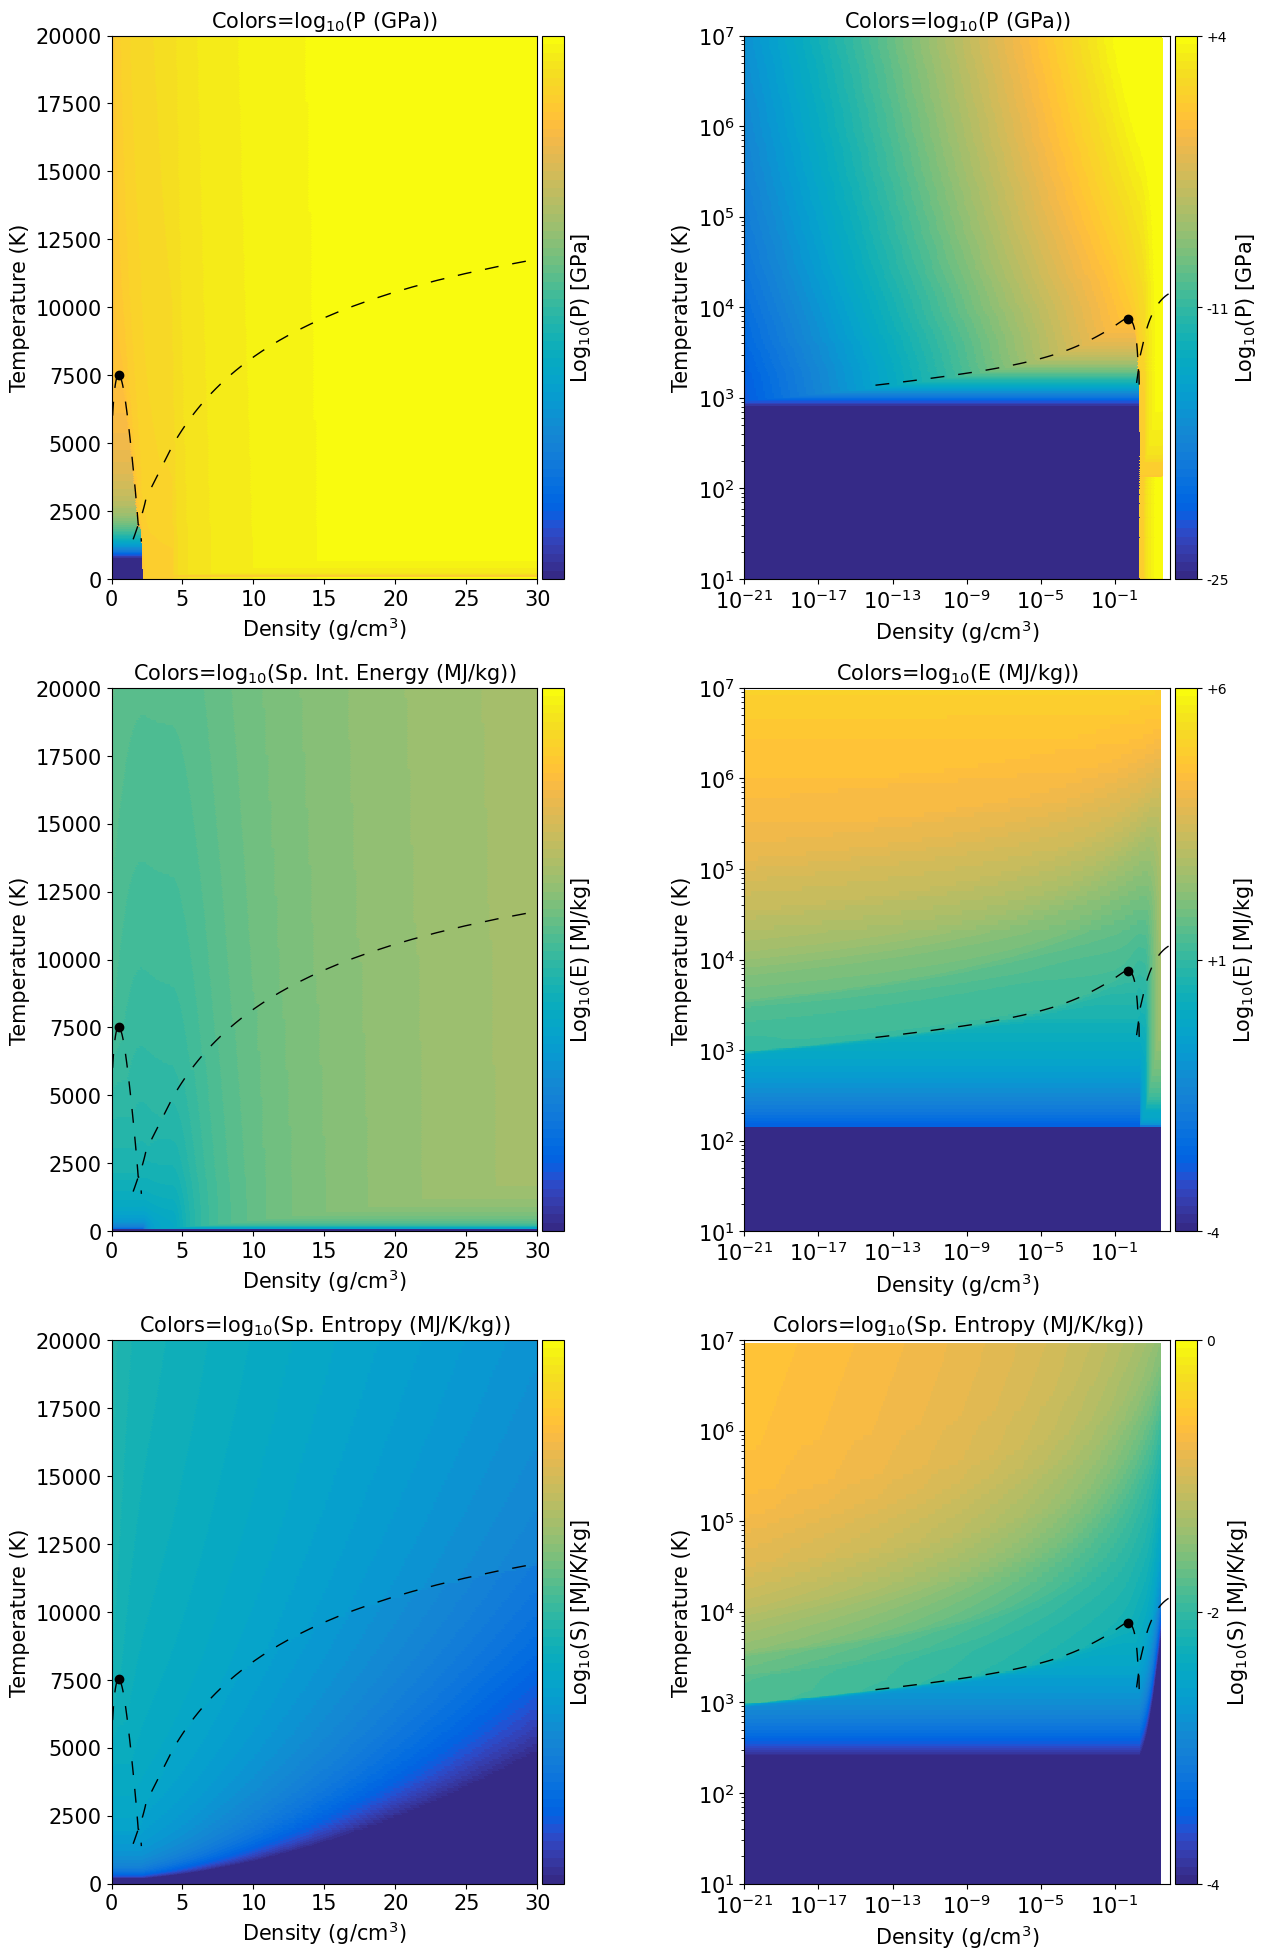

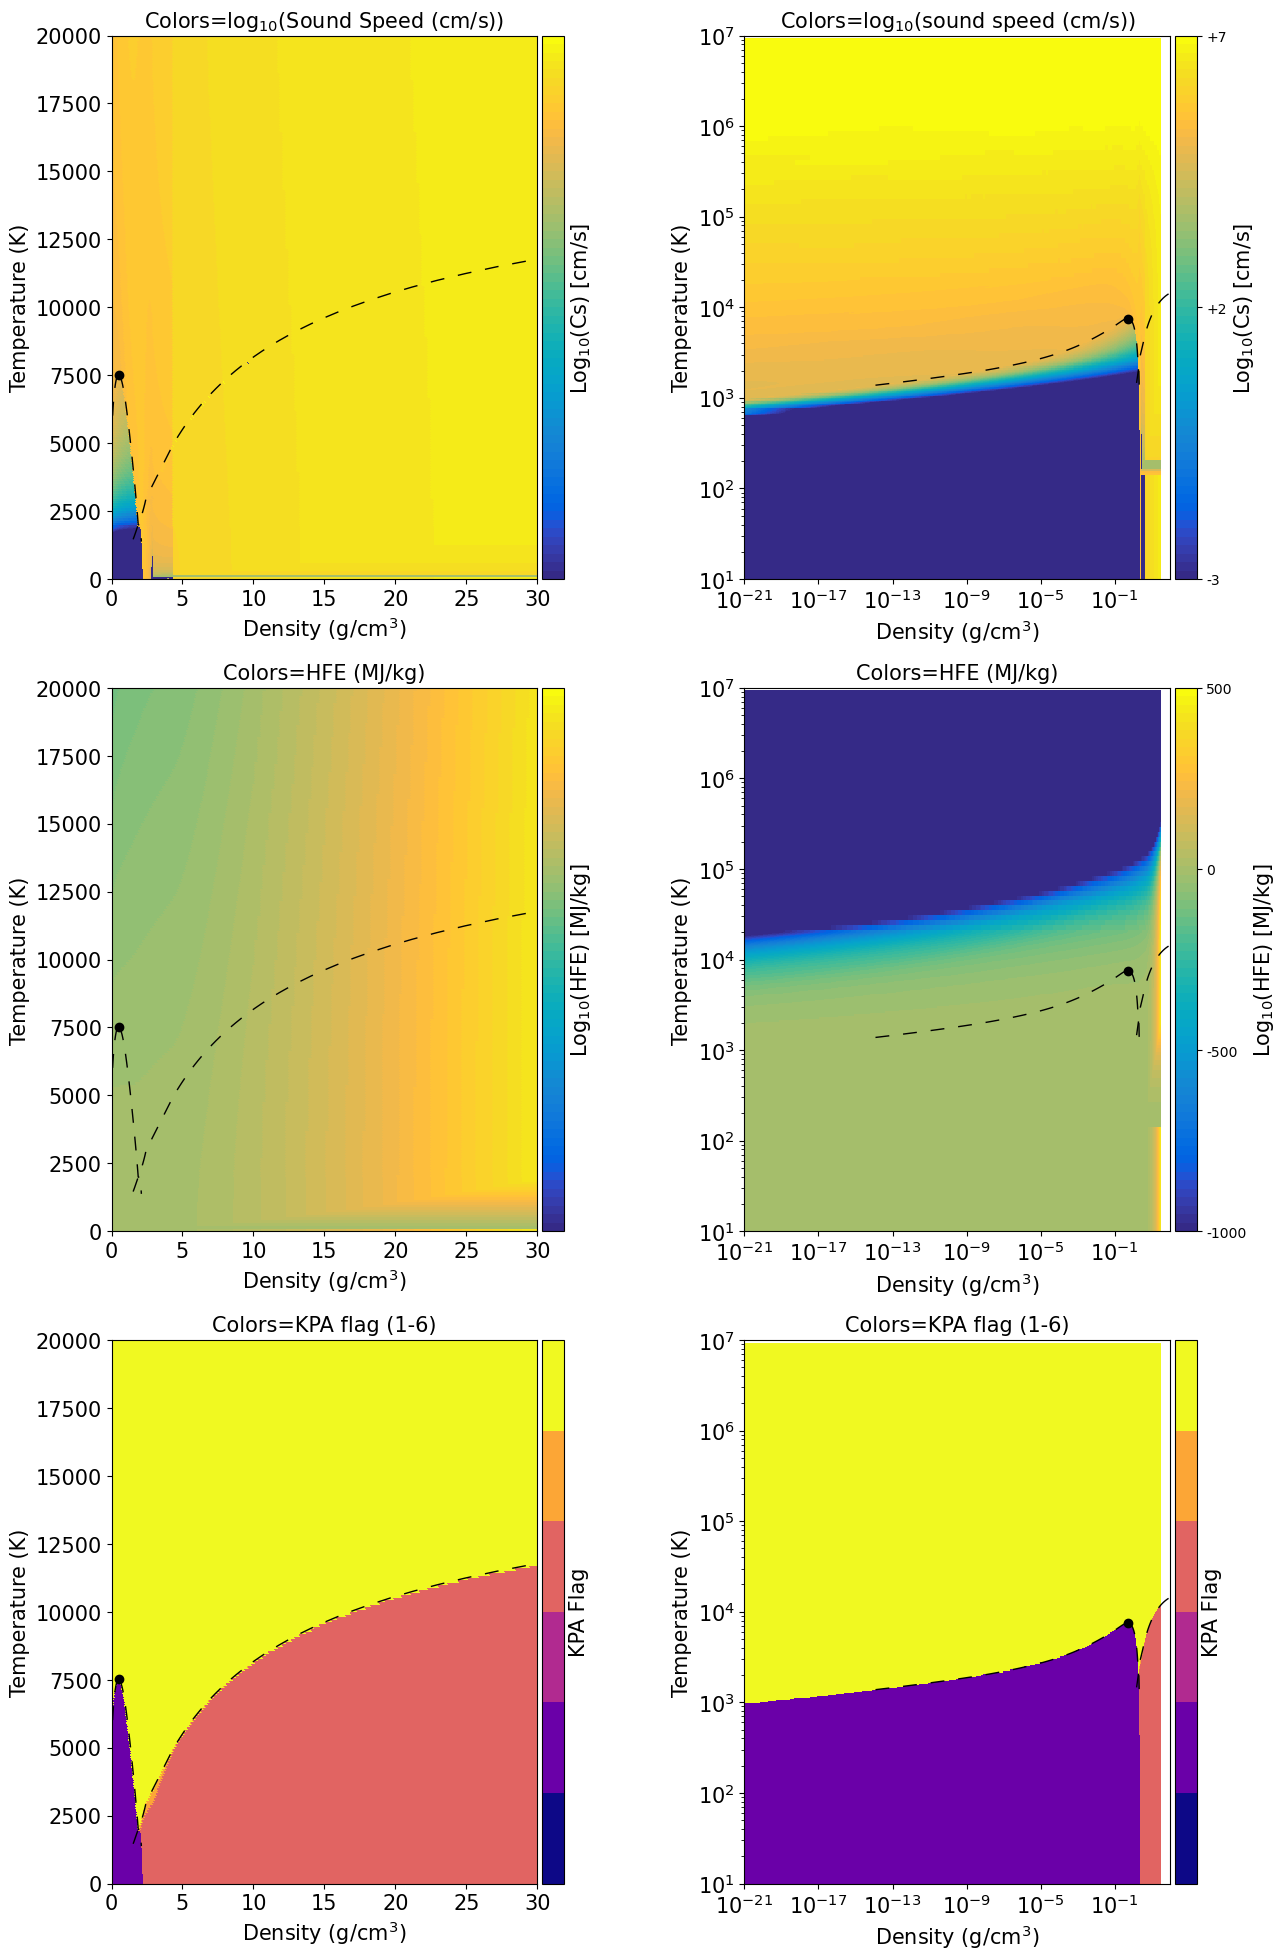

In [12]:


%matplotlib inline
fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)
#plt.tight_layout(pad=0.6)

##================ Pressure
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
#cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
#cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

im1=ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)


#================ Sp. Int. Energy
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
# does not want to label ticks in this location
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','',''])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)
#cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

#================ Sp. Entropy
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-4', '-2', '0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '-2','0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


##============= start new plot
fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#================ Sound Speed
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig2.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig2.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


#================ HFE
amin = np.min(NewEOS.A)
amin = -1000.
alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
#print('amin, log10(amin)',amin,np.log10(-amin))
#print('alogmax=',alogmax)
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig2.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig2.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



#================ KPA flag
cmap2 = plt.get_cmap('plasma', 6)    # 6 discrete colors

im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA))/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=KPA flag (1-6)',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig2.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=KPA flag (1-6)',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
#cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
cbar = fig2.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)






# Model Data Quality (MDQ) Flag
We provide an MDQ rating which is saved as a 301-style SESAME table. The MDQ rating is a qualitative guide for users that provides some known quality control information. This information is necessarily subjective and incomplete. The rating does not guarantee any fidelity in the EOS model except for points that have been directly compared to experimental data in the plots below.<br>
<ul>
    <li>MDQ=1: Data point has experimental data and falls within experimental error. NOT USED AT THIS TIME. Will be added in the future.
    <li>MDQ=0: Data point rating is neutral. The value appears to be a thermodynamically self-consistent model point without known gross errors.
    <li>MDQ=-1: Data point rating is erroneous. The value is not thermodynamically correct in a known way. In this work, this flag is used for the replacement values for the tension region to generate an all positive pressure equilibrium EOS table. The current replacement scheme is to use the values in the adjacent grid cell: for each P and T in the sublimation region, use values at the adjacent density with positive pressure. The magnitude of the error is small, but the derivatives in this region will be incorrect.
    <li>MDQ=-2: Data point rating is non-physical. The value is not thermodynamically correct in a known way. In this work, this flag is used for ANEOS output with negative values for the specific entropy.
    <li>MDQ=-4: Developer judgement that this region of phase space does not provide a robust representation of the material. There are no high-pressure solid phases in this EOS model. Seek alternative models for problems focused in this region.
    <li>MDQ=-5: Developer judgement that this region of phase space does not provide a robust representation of the material. Applied to regions with pressures > 2 TPa. The Gruneisen gamma value is too large for liquid in this region and missing physics at higher pressures and temperatures. Seek alternative models for problems focused in this region.
</ul>   


Unique values in the MDQ flag array: [-2. -1.  0.]
Value: # elements with this value
-2.0 :  29077
-1.0 :  5726
0.0 :  530874


[Text(1, 0.0, ''),
 Text(1, 0.08333333333333333, '-5'),
 Text(1, 0.16666666666666666, ''),
 Text(1, 0.25, '-4'),
 Text(1, 0.3333333333333333, ''),
 Text(1, 0.4166666666666667, '-3'),
 Text(1, 0.5, ''),
 Text(1, 0.5833333333333334, '-2'),
 Text(1, 0.6666666666666666, ''),
 Text(1, 0.75, '-1'),
 Text(1, 0.8333333333333334, ''),
 Text(1, 0.9166666666666666, '0'),
 Text(1, 1.0, '')]

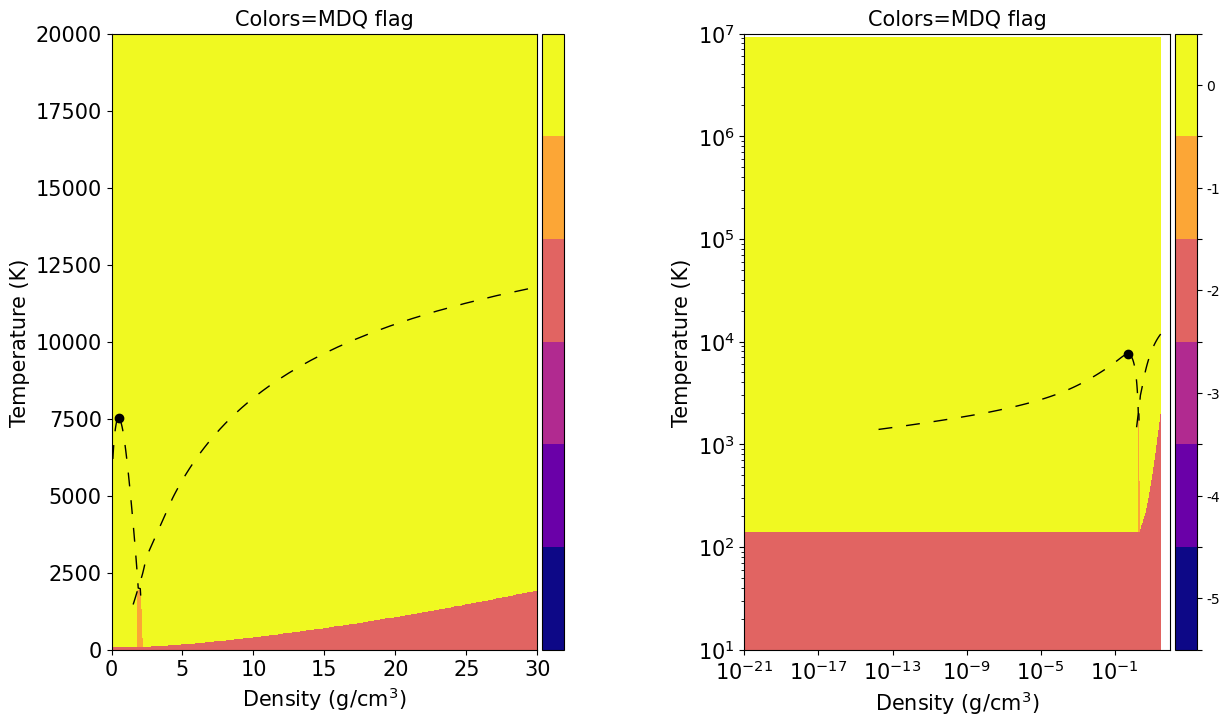

In [13]:
# check the user-defined model data quality flag across the EOS surface
uniqmdqarr = np.unique(NewEOS.MDQ)
print("Unique values in the MDQ flag array:", uniqmdqarr)
print("Value: # elements with this value")
#get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

for i in uniqmdqarr:
    ix = get_indexes(i,np.reshape(NewEOS.MDQ,NewEOS.ND*NewEOS.NT))
    print(i,': ',len(ix))


##============= start new plot
fig3, ([ax4, ax5])= plt.subplots(nrows=1,ncols=2,figsize=(14,8))
plt.subplots_adjust(wspace=0.4)

#================ MDQ flag
cmap2 = plt.get_cmap('plasma', 6)    # 6 discrete colors

#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=MDQ flag',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig3.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','-5','','-4','','-3','','-2','','-1','','0','','1'])  # vertical colorbar

cmap2 = plt.get_cmap('plasma', 6)    # 6 discrete colors
ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=cmap2,vmin=0,vmax=1)
#ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=MDQ flag',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig3.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
#cbar.ax.set_yticklabels(['','-5','','-4','','-3','','-2','','-1','','0','','1'])  # vertical colorbar
cbar.ax.set_yticklabels(['','-5','','-4','','-3','','-2','','-1','','0',''])  # vertical colorbar



## ANEOS Model Compared to Experimental and Ab Initio Data

The following plots compare the ANEOS model Hugoniots with laboratory data and ab initio calculations. 

ANEOS STP Hugoniots: blue -- Hugoniot based at STP (model solid at reference density).


Requested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):
Initial Pressure (GPa): 0.0001
Initial Temperature (K): 298.0
Initial Sp. Entropy (MJ/K/kg): 0.00017886
Initial Sp. Internal Energy (MJ/kg): 0.043369
Initial Density (g/cm3): 2.2
[ 75.9  85.9  92.5  99.3 107.8 109.7] [4440. 4850. 5430. 5630. 5900. 6100.]
quartz Boslough P-T fit 75-110 GPa:  [-3.39692149e-01  1.11592149e+02 -2.10423906e+03]


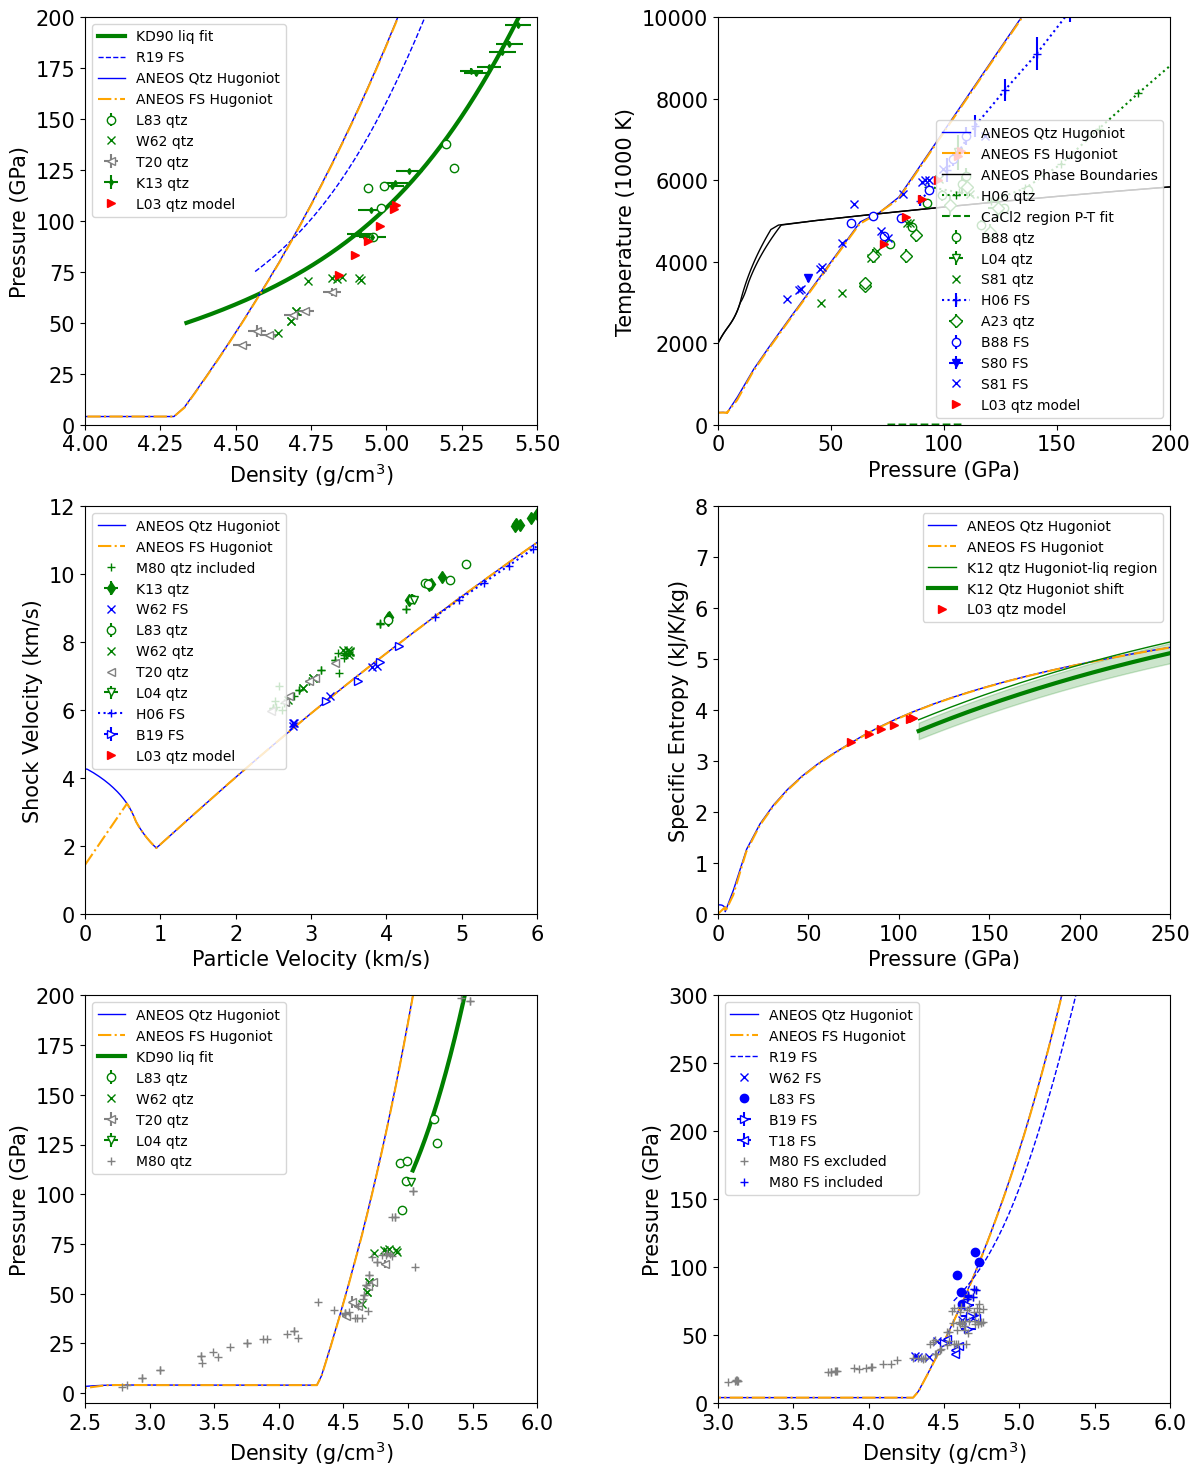

In [14]:
# Display the initial conditions for the Hugoniot in ANEOS.OUTPUT    
print('\nRequested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.anhug.P[0])
print('Initial Temperature (K):',NewEOS.anhug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.anhug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.anhug.U[0])
print('Initial Density (g/cm3):',NewEOS.anhug.rho[0])
#

#========== PLOTTING STYLES FOR LOTS OF PLOTS =================
styleqmd = ['^','red',5,'Fo QMD calc (Root et al. 2018)']
stylezdat = ['^','black',5,'Fo Z data (Root et al. 2018)']
stylegg = ['+','green',5,'Fo Gas gun data\n(Mosenfelder et al. 2007)']
styleliq = ['^','orange',7,'Liquid Fo data corrected\n(Thomas & Asimow 2013)']
styleliqhug = ['-','orange',1,'ANEOS Liquid 2273K Hugoniot']
stylezfit = ['-','green',1,'Fo Z fit (Davies et al. 2019)']
styleanhug = ['-','red',1,'ANEOS Glass-tension Hugoniot']
stylestphug = ['-','blue',1,'ANEOS Qtz Hugoniot']
styleanphase = ['-','black',1,'ANEOS Phase Boundaries']
stylephasept = ['o','black',6]



#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,18))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Density Data vs. ANEOS
ai=0
aj=0
#axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])

#axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
#axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,'-.',color='orange',label='ANEOS FS Hugoniot')

if 0:
    axes[ai,aj].scatter(qtz_hug_W62.rho,qtz_hug_W62.P,marker='+',color='purple',label=qtz_hug_W62.label)
    axes[ai,aj].scatter(qtz_hug_L3.rho,qtz_hug_L3.P,marker='+',color='blue',label=qtz_hug_L3.label)
    axes[ai,aj].plot(qtz_hug_KD.rho,qtz_hug_KD.P,color='green',label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.rho,fs_hug_RTK19.P,'-',color='red',label=fs_hug_RTK19.label)

# silicadb
if 1:
    ind = np.where(qtz_hug_KD.P>50)[0]
    axes[ai,aj].plot(qtz_hug_KD.rho[ind],qtz_hug_KD.P[ind],'g-',linewidth=3,label='KD90 liq fit')
    axes[ai,aj].errorbar(shockdat_list[L83qtzhug['id']].rho,shockdat_list[L83qtzhug['id']].P,fmt='go',mfc='white',\
                 yerr=shockdat_list[L83qtzhug['id']].P_std,label=L83qtzhug['lab'])
    axes[ai,aj].errorbar(shockdat_list[W62qtz['id']].rho,shockdat_list[W62qtz['id']].P,fmt='gx',label=W62qtz['lab'])
    #plt.errorbar(shockdat_list[A23qtz['id']].rho,shockdat_list[A23qtz['id']].P,fmt='gD',mfc='white',label=A23qtz['lab'],\
    #            xerr=shockdat_list[A23qtz['id']].rho_std,yerr=shockdat_list[A23qtz['id']].P_std)
    axes[ai,aj].errorbar(shockdat_list[T20qtz['id']].rho,shockdat_list[T20qtz['id']].P,fmt='<',mfc='white',color='grey',\
                 xerr = shockdat_list[T20qtz['id']].rho_std, yerr=shockdat_list[T20qtz['id']].P_std, label=T20qtz['lab'])

    axes[ai,aj].errorbar(shockdat_list[K13qtz['id']].rho,shockdat_list[K13qtz['id']].P,fmt='gd',markersize=3,\
             xerr=shockdat_list[K13qtz['id']].rho_std,yerr=shockdat_list[K13qtz['id']].P_std,label=K13qtz['lab'])
    ind = np.where(fs_hug_RTK19.P > 74.)[0]
    axes[ai,aj].plot(fs_hug_RTK19.rho[ind],fs_hug_RTK19.P[ind],'b--',label='R19 FS',linewidth=1)
    axes[ai,aj].errorbar(shockdat_list[L03qtz['id']].rho,shockdat_list[L03qtz['id']].P,fmt='r>',label=L03qtz['lab'])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,'-.',color='orange',label='ANEOS FS Hugoniot')

axes[ai,aj].set_ylim(0,200)
axes[ai,aj].set_xlim(4.,5.5)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure - Temperature Data vs. ANEOS
ai=0
aj=1

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.T,'-.',color='orange',label='ANEOS FS Hugoniot')

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Pl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.Ps,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

if 0:
    axes[ai,aj].plot(qtz_hug_KD.P,qtz_hug_KD.T/1.e3,color='green',label='Qtz Brygoo et al. 2015')
    axes[ai,aj].plot(fs_hug_Hicks06.P,fs_hug_Hicks06.T/1.e3,'-',color='red',label=fs_hug_Hicks06.label)
    axes[ai,aj].scatter(qtz_hug_LA80.P,qtz_hug_LA80.T/1.E3,marker='+',color='green',label='Qtz Lyzenga & Ahrens 1980')
    axes[ai,aj].plot(stv_mc_MM15.Pl,stv_mc_MM15.T/1.E3,color='cyan',label=stv_mc_MM15.label)

# silicadb
if 1:
    axes[ai,aj].errorbar(shockdat_list[B88qtz['id']].P,shockdat_list[B88qtz['id']].T,fmt='go',mfc='white',yerr=shockdat_list[B88qtz['id']].T_std,label=B88qtz['lab'])
    axes[ai,aj].errorbar(shockdat_list[L04qtz['id']].P,shockdat_list[L04qtz['id']].T,fmt='gv',mfc='white',xerr=shockdat_list[L04qtz['id']].P_std,yerr=shockdat_list[L04qtz['id']].T_std,label=L04qtz['lab'])
    axes[ai,aj].errorbar(shockdat_list[S81qtz['id']].P,shockdat_list[S81qtz['id']].T,fmt='gx',label=S81qtz['lab'])
    # Hicks decaying shock
    axes[ai,aj].plot(qtz_hug_Hicks06.P,qtz_hug_Hicks06.T,'g+:',label='H06 qtz')
    ind = np.where((shockdat_list[B88qtz['id']].P >75) & (shockdat_list[B88qtz['id']].P <110))
    qtztpfit = np.polyfit(shockdat_list[B88qtz['id']].P[ind],shockdat_list[B88qtz['id']].T[ind],2)
    # Hicks decaying shock
    #plt.plot(fs_hug_Hicks06.P,fs_hug_Hicks06.T,'b+:',label='H06 FS')
    axes[ai,aj].errorbar(fs_hug_Hicks06.P,fs_hug_Hicks06.T,fmt='b+:',\
                 yerr=fs_hug_Hicks06.T_std,label='H06 FS')
    print(shockdat_list[B88qtz['id']].P[ind],shockdat_list[B88qtz['id']].T[ind])
    print('quartz Boslough P-T fit 75-110 GPa: ',qtztpfit)
    #plt.plot(shockdat_list[B88qtz['id']].P[ind],qtztpfit[1]+qtztpfit[0]*shockdat_list[B88qtz['id']].P[ind],'g:',label='Likely d-NiAs')
    qtzptmp = np.arange(75,110,1)
    qtzttmp = qtztpfit[2]+qtztpfit[1]*qtzptmp+qtztpfit[0]*qtzptmp*qtzptmp
    axes[ai,aj].plot(qtzptmp,qtzttmp/1.E3,'g--',label='CaCl2 region P-T fit')        
    axes[ai,aj].errorbar(shockdat_list[A23qtz['id']].P,shockdat_list[A23qtz['id']].T,fmt='gD',mfc='white',xerr=shockdat_list[A23qtz['id']].P_std,yerr=shockdat_list[A23qtz['id']].T_std,label=A23qtz['lab'])
    axes[ai,aj].errorbar(shockdat_list[B88fs['id']].P,shockdat_list[B88fs['id']].T,fmt='bo',mfc='white',yerr=shockdat_list[B88fs['id']].T_std,label=B88fs['lab'])

    axes[ai,aj].errorbar(shockdat_list[S80fs['id']].P,shockdat_list[S80fs['id']].T,fmt='bv',xerr=shockdat_list[S80fs['id']].P_std,yerr=shockdat_list[S80fs['id']].T_std,label=S80fs['lab'])
    axes[ai,aj].errorbar(shockdat_list[S81fs['id']].P,shockdat_list[S81fs['id']].T,fmt='bx',label=S81fs['lab'])
    axes[ai,aj].errorbar(shockdat_list[L03qtz['id']].P,shockdat_list[L03qtz['id']].T,fmt='r>',label=L03qtz['lab'])

    
axes[ai,aj].set_xlim(0,200)
axes[ai,aj].set_ylim(0,10000)
axes[ai,aj].set_ylabel('Temperature (1000 K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Particle Velocity vs. Shock Velocity; Data vs. ANEOS
ai=1
aj=0

axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.up,NewEOS.hugo.us,'-.',color='orange',label='ANEOS FS Hugoniot')

if 0:
    axes[ai,aj].scatter(qtz_hug_W62.up,qtz_hug_W62.us,marker='+',color='purple',label=qtz_hug_W62.label)
    axes[ai,aj].scatter(qtz_hug_L3.up,qtz_hug_L3.us,marker='+',color='blue',label=qtz_hug_L3.label)
    axes[ai,aj].plot(qtz_hug_KD.up,qtz_hug_KD.us,color='green',label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.up,fs_hug_RTK19.us,'-',color='red',label=fs_hug_RTK19.label)

# silicadb
if 1:
    mqtzup = deepcopy(np.asarray(qtzdf['up'][indqtz]))
    mqtzus = deepcopy(np.asarray(qtzdf['us'][indqtz]))
    #inda = np.where((mqtzus>8) & (mqtzus<9.23))[0]
    inda = np.where((mqtzus>6))[0]
    axes[ai,aj].errorbar(mqtzup[inda],mqtzus[inda],fmt='g+',label='M80 qtz included')

    axes[ai,aj].errorbar(shockdat_list[K13qtz['id']].up,shockdat_list[K13qtz['id']].us,fmt='gd',markersize=6,\
                 xerr=shockdat_list[K13qtz['id']].up_std,yerr=shockdat_list[K13qtz['id']].us_std,label=K13qtz['lab'])
    axes[ai,aj].errorbar(shockdat_list[W62fs['id']].up,shockdat_list[W62fs['id']].us,fmt='bx',label=W62fs['lab'])

    axes[ai,aj].errorbar(shockdat_list[L83qtzhug['id']].up,shockdat_list[L83qtzhug['id']].us,fmt='go',mfc='white',\
                 yerr=shockdat_list[L83qtzhug['id']].us_std,label=L83qtzhug['lab'])
    axes[ai,aj].errorbar(shockdat_list[W62qtz['id']].up,shockdat_list[W62qtz['id']].us,fmt='gx',label=W62qtz['lab'])
    #plt.errorbar(shockdat_list[L03qtz['id']].rho,shockdat_list[L03qtz['id']].P,fmt='r>',label=L03qtz['lab'])
    #plt.errorbar(shockdat_list[T20qtz['id']].up,shockdat_list[T20qtz['id']].us,fmt='g<',mfc='white',\
    #             xerr = shockdat_list[T20qtz['id']].up_std, yerr=shockdat_list[T20qtz['id']].us_std, label=T20qtz['lab'])
    axes[ai,aj].errorbar(shockdat_list[T20qtz['id']].up,shockdat_list[T20qtz['id']].us,fmt='<',mfc='white',color='grey',\
                  label=T20qtz['lab'])
    #print(shockdat_list[T20qtz['id']].up,shockdat_list[T20qtz['id']].us)
    #res = np.polyfit(shockdat_list[T20qtz['id']].up,shockdat_list[T20qtz['id']].us,1)
    #print(res)
    axes[ai,aj].errorbar(shockdat_list[L04qtz['id']].up,shockdat_list[L04qtz['id']].us,fmt='gv',mfc='white',\
             xerr=shockdat_list[L04qtz['id']].up_std,yerr=shockdat_list[L04qtz['id']].us_std,label=L04qtz['lab'])
    axes[ai,aj].errorbar(fs_hug_Hicks06.up,fs_hug_Hicks06.us,fmt='b+:',\
                label='H06 FS')
    axes[ai,aj].errorbar(shockdat_list[B19fs['id']].up,shockdat_list[B19fs['id']].us,fmt='b>',mfc='white',label=B19fs['lab'],\
                 xerr=shockdat_list[B19fs['id']].up_std,yerr=shockdat_list[B19fs['id']].us_std)
    axes[ai,aj].errorbar(shockdat_list[L03qtz['id']].up,shockdat_list[L03qtz['id']].us,fmt='r>',label=L03qtz['lab'])

axes[ai,aj].set_xlim(0,6)
axes[ai,aj].set_ylim(0,12)
axes[ai,aj].set_xlabel('Particle Velocity (km/s)',size=sfont)
axes[ai,aj].set_ylabel('Shock Velocity (km/s)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Sp. Entropy vs Pressure; Calculated from experiments vs. ANEOS
ai=1
aj=1

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.e3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.S*1.e3,'-.',color='orange',label='ANEOS FS Hugoniot')

if 0:
    # Kraus entropy fit only good to 800 GPa
    ind = np.where(qtz_hug_KD.P <= 800.)
    axes[ai,aj].plot(qtz_hug_KD.P[ind],qtz_hug_KD.S[ind],color='green',label='Qtz Kraus et al. 2012')
    Kraus_serr = (127.3+0.328*qtz_hug_KD.P[ind]-0.000193*np.power(qtz_hug_KD.P[ind],2))/1.e3 # kJ/K/kg
    axes[ai,aj].fill_between(qtz_hug_KD.P[ind],(qtz_hug_KD.S[ind]-Kraus_serr),(qtz_hug_KD.S[ind]+Kraus_serr),color=stylezfit[1],alpha=0.2)

# silicadb
if 1:
    entropyshift = 220.
    penter = 111.
    kqtzparr = np.arange(100,500) # GPa
    kqtzsarr = 1793+22.4*kqtzparr-0.0426*np.power(kqtzparr,2)+4.319e-05*np.power(kqtzparr,3)-1.742e-8*np.power(kqtzparr,4)
    kqtzserrarr = 127.3+0.328*kqtzparr-0.000193*np.power(kqtzparr,2)
    ind = np.where(kqtzparr >= penter)[0]
    axes[ai,aj].plot(kqtzparr[ind],kqtzsarr[ind]/1.e3,'g-',linewidth=1,label='K12 qtz Hugoniot-liq region')
    axes[ai,aj].plot(kqtzparr[ind],(kqtzsarr[ind]-entropyshift)/1.e3,'g-',linewidth=3,label='K12 Qtz Hugoniot shift')
    axes[ai,aj].fill_between(kqtzparr[ind],(kqtzsarr[ind]-entropyshift-kqtzserrarr[ind])/1.e3,(kqtzsarr[ind]-entropyshift+kqtzserrarr[ind])/1.e3,color=stylezfit[1],alpha=0.2)
    axes[ai,aj].errorbar(shockdat_list[L03qtz['id']].P,shockdat_list[L03qtz['id']].S,fmt='r>',label=L03qtz['lab'])
   
    

axes[ai,aj].set_ylim(0,8.)
axes[ai,aj].set_xlim(0,250)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   LOW PRESSURE + LIQUID HUGONIOT
ai=2
aj=0
# ANEOS REFERENCE POINT (STP) Hugoniots
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,'-.',color='orange',label='ANEOS FS Hugoniot')

if 0:
    axes[ai,aj].scatter(qtz_hug_W62.rho,qtz_hug_W62.P,marker='+',color='purple',label=qtz_hug_W62.label)
    axes[ai,aj].scatter(qtz_hug_L3.rho,qtz_hug_L3.P,marker='+',color='blue',label=qtz_hug_L3.label)
    axes[ai,aj].plot(qtz_hug_KD.rho,qtz_hug_KD.P,color='green',label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.rho,fs_hug_RTK19.P,'-',color='red',label=fs_hug_RTK19.label)

# silicadb
if 1:
    axes[ai,aj].errorbar(shockdat_list[L83qtzhug['id']].rho,shockdat_list[L83qtzhug['id']].P,fmt='go',mfc='white',\
                 yerr=shockdat_list[L83qtzhug['id']].P_std,label=L83qtzhug['lab'])
    axes[ai,aj].errorbar(shockdat_list[W62qtz['id']].rho,shockdat_list[W62qtz['id']].P,fmt='gx',label=W62qtz['lab'])
    #plt.errorbar(shockdat_list[A23qtz['id']].rho,shockdat_list[A23qtz['id']].P,fmt='gD',mfc='white',label=A23qtz['lab'],\
    #            xerr=shockdat_list[A23qtz['id']].rho_std,yerr=shockdat_list[A23qtz['id']].P_std)
    axes[ai,aj].errorbar(shockdat_list[T20qtz['id']].rho,shockdat_list[T20qtz['id']].P,fmt='<',mfc='white',color='grey',\
                 xerr = shockdat_list[T20qtz['id']].rho_std, yerr=shockdat_list[T20qtz['id']].P_std, label=T20qtz['lab'])
    #print(shockdat_list[T20qtz['id']].up,shockdat_list[T20qtz['id']].us)
    #res = np.polyfit(shockdat_list[T20qtz['id']].up,shockdat_list[T20qtz['id']].us,1)
    #print(res)
    axes[ai,aj].errorbar(shockdat_list[L04qtz['id']].rho,shockdat_list[L04qtz['id']].P,fmt='gv',mfc='white',\
             xerr=shockdat_list[L04qtz['id']].rho_std,yerr=shockdat_list[L04qtz['id']].P_std,label=L04qtz['lab'])

    ind = np.where(qtz_hug_KD.P>112)[0]
    axes[ai,aj].plot(qtz_hug_KD.rho[ind],qtz_hug_KD.P[ind],'g-',linewidth=3,label='KD90 liq fit')
    axes[ai,aj].errorbar(qtzdf['rho'][indqtz],qtzdf['P'][indqtz],fmt='+',color='grey',label='M80 qtz')

    
axes[ai,aj].set_ylim(-5,200)
axes[ai,aj].set_xlim(2.5,6.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   EXTRAPOLATED HIGH PRESSURE
ai=2
aj=1
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,'-.',color='orange',label='ANEOS FS Hugoniot')

if 0:
    axes[ai,aj].plot(qtz_hug_KD.rho,qtz_hug_KD.P,color='green',label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.rho,fs_hug_RTK19.P,'-',color='red',label=fs_hug_RTK19.label)

# silicadb
if 1:
    axes[ai,aj].errorbar(shockdat_list[W62fs['id']].rho,shockdat_list[W62fs['id']].P,fmt='bx',label=W62fs['lab'])
    axes[ai,aj].errorbar(shockdat_list[L83fshug['id']].rho,shockdat_list[L83fshug['id']].P,fmt='bo',label=L83fshug['lab'])
    axes[ai,aj].errorbar(shockdat_list[B19fs['id']].rho,shockdat_list[B19fs['id']].P,fmt='b>',xerr=shockdat_list[B19fs['id']].rho_std,\
                 yerr=shockdat_list[B19fs['id']].P_std,mfc='white',label=B19fs['lab'])
    axes[ai,aj].errorbar(shockdat_list[T18fs['id']].rho,shockdat_list[T18fs['id']].P,fmt='b<',mfc='white',\
                 xerr=shockdat_list[T18fs['id']].rho_std,yerr=shockdat_list[T18fs['id']].P_std,label=T18fs['lab'])

    #plt.errorbar(np.asarray(shockdat_list[A23fs['id']].rho)/1000.,shockdat_list[A23fs['id']].P,fmt='bD',mfc='white',label=A23fs['lab'])
    #plt.errorbar(np.asarray(shockdat_list[A23fs['id']].rho),shockdat_list[A23fs['id']].P,fmt='bD',mfc='white',label=A23fs['lab'],\
    #            xerr=shockdat_list[A23fs['id']].rho_std,yerr=shockdat_list[A23fs['id']].P_std)
    axes[ai,aj].errorbar(fsdf['rho'][indfs],fsdf['P'][indfs],fmt='+',color='grey',label='M80 FS excluded')
    indhigh = np.where(fsdf['P'][indfs] > 74)[0]
    axes[ai,aj].errorbar(fsdf['rho'][indfs][indhigh],fsdf['P'][indfs][indhigh],fmt='b+',label='M80 FS included')

    #axes[ai,aj].plot(fitfslrarr,fitfslparr,'b-',linewidth=2,label='cubic fit liquid')
    #axes[ai,aj].plot(fitfssrarr,fitfssparr,'b-',label='linear fit solid')
    ind = np.where(fs_hug_RTK19.P > 74.)[0]
    axes[ai,aj].plot(fs_hug_RTK19.rho[ind],fs_hug_RTK19.P[ind],'b--',label='R19 FS',linewidth=1)


axes[ai,aj].set_ylim(0,300)
axes[ai,aj].set_xlim(3.,6.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

plt.savefig(MODELNAME+'-Hugoniots.pdf')

In [15]:
print(shockdat_list[L03qtz['id']].S)

[3.365 3.527 3.621 3.712 3.817 3.839]



Requested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):
Initial Pressure (GPa): 0.0001
Initial Temperature (K): 298.0
Initial Sp. Entropy (MJ/K/kg): 0.00017886
Initial Sp. Internal Energy (MJ/kg): 0.043369
Initial Density (g/cm3): 2.2
[13.7  14.5  20.   23.75 28.   34.   36.   37.5  40.   42.   46.  ]
[55. 60. 66. 74.]
[100. 102. 114. 117.]
[135. 155.]
[217.5 218.5   nan]


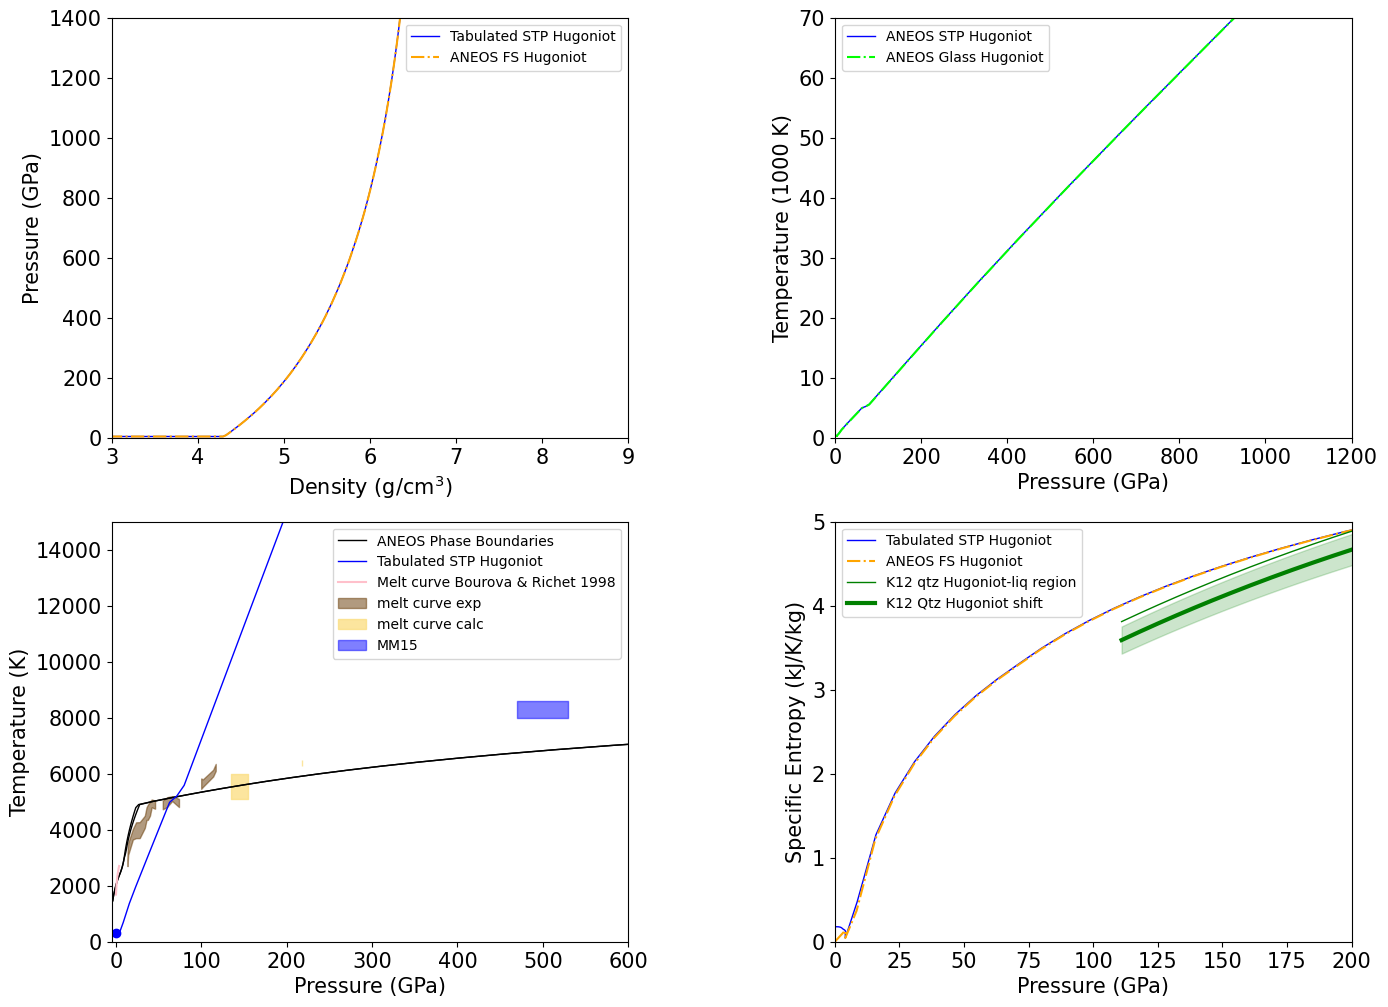

In [16]:
# Display the initial conditions for the Hugoniot in ANEOS.OUTPUT    
print('\nRequested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.anhug.P[0])
print('Initial Temperature (K):',NewEOS.anhug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.anhug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.anhug.U[0])
print('Initial Density (g/cm3):',NewEOS.anhug.rho[0])
#

#========== PLOTTING STYLES FOR LOTS OF PLOTS =================
styleqmd = ['^','red',5,'Fo QMD calc (Root et al. 2018)']
stylezdat = ['^','black',5,'Fo Z data (Root et al. 2018)']
stylegg = ['+','green',5,'Fo Gas gun data\n(Mosenfelder et al. 2007)']
styleliq = ['^','orange',7,'Liquid Fo data corrected\n(Thomas & Asimow 2013)']
styleliqhug = ['-','orange',1,'ANEOS Liquid 2273K Hugoniot']
stylezfit = ['-','green',1,'Fo Z fit (Davies et al. 2019)']
styleanhug = ['-','red',1,'ANEOS Glass-tension Hugoniot']
stylestphug = ['-','blue',1,'Tabulated STP Hugoniot']
styleanphase = ['-','black',1,'ANEOS Phase Boundaries']
stylephasept = ['o','black',6]



#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Density Data vs. ANEOS
ai=0
aj=0
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,'-.',color='orange',label='ANEOS FS Hugoniot')

if 0:
    axes[ai,aj].plot(qtz_hug_KD.rho,qtz_hug_KD.P,color='green',label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.rho,fs_hug_RTK19.P,'-',color='red',label=fs_hug_RTK19.label)


axes[ai,aj].set_ylim(0,1400)
axes[ai,aj].set_xlim(3.,9.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure - Temperature Data vs. ANEOS
ai=0
aj=1

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label='ANEOS STP Hugoniot')
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.T/1.E3,'-.',color='lime',label='ANEOS Glass Hugoniot')

if 0:
    axes[ai,aj].plot(qtz_hug_KD.P,qtz_hug_KD.T/1.e3,color='green',label='Qtz Brygoo et al. 2015')
    axes[ai,aj].plot(fs_hug_Hicks06.P,fs_hug_Hicks06.T/1.e3,'-',color='red',label=fs_hug_Hicks06.label)

    axes[ai,aj].scatter(qtz_hug_LA80.P,qtz_hug_LA80.T/1.E3,marker='+',color='green',label='Qtz Lyzenga & Ahrens 1980')
    axes[ai,aj].plot(stv_mc_MM15.Pl,stv_mc_MM15.T/1.E3,color='cyan',label=stv_mc_MM15.label)


axes[ai,aj].set_xlim(0,1200)
axes[ai,aj].set_ylim(0,70)
axes[ai,aj].set_ylabel('Temperature (1000 K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)


#-------
# pressure - temperature melt curve
ai=1
aj=0
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Pl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.Ps,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.P[0],NewEOS.hug.T[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,15000)
axes[ai,aj].set_xlim(-5,600)

#axes[ai,aj].plot(peridotiteliquidusdatarr.iloc[:,0].values,peridotiteliquidusdatarr.iloc[:,1].values,linestyle='-',color='orange',label='Peridotite Liquidus')
#axes[ai,aj].plot(peridotitesolidusdatarr.iloc[:,0].values,peridotitesolidusdatarr.iloc[:,1].values,linestyle=':',color='orange',label='Peridotite Solidus\n(Fiquet et al. 2010)')

if 1:
    #axes[ai,aj].plot(stv_mc_MM15.Pl,stv_mc_MM15.T,color='cyan',label=stv_mc_MM15.label)
    axes[ai,aj].plot(qtz_mc_BR98.Pl,qtz_mc_BR98.T,color='pink',label=qtz_mc_BR98.label)

if 1:
    wcol = "#653700"
    wcol2 = "#FBDD7E"
    wcol3 = "#F97306"
    wop = 0.5
    wop2=0.75
    wop3=0.25
    ind = np.arange(0,11)
    print(stsmc.P[ind])
    axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],label='melt curve exp',alpha=wop,color=wcol)
    ind = np.arange(12,16)
    print(stsmc.P[ind])
    axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],alpha=wop,color=wcol)
    ind = np.arange(17,21)
    print(stsmc.P[ind])
    axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],alpha=wop,color=wcol)
    ind = np.arange(22,24)
    print(stsmc.P[ind])
    axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],alpha=wop2,color=wcol2,label='melt curve calc')
    ind = np.arange(25,28)
    print(stsmc.P[ind])
    axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],alpha=wop2,color=wcol2)
    # Millot stv melt curve crossing
    axes[ai,aj].fill_between([470.,530.],[8000.,8000.],[8600.,8600.],alpha=0.5,color='blue',label='MM15')
    

if 0:
    ind = np.where(stsmcsmooth.P <=Pt3)[0]
    axes[ai,aj].plot(stsmcsmooth.P[ind],stsmcsmooth.T[ind],'m-',linewidth=3,label='Proposed melt curve')
    ind = np.where(stsmcsmooth.P >=Pt3)[0]
    axes[ai,aj].plot(stsmcsmooth.P[ind],stsmcsmooth.T[ind],'m:',linewidth=3)#,label='Proposed melt curve')



axes[ai,aj].legend()

#-------
ai=1
aj=1
#axes[ai,aj].axis('off')

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.e3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.S*1.e3,'-.',color='orange',label='ANEOS FS Hugoniot')

if 0:
    # Kraus entropy fit only good to 800 GPa
    ind = np.where(qtz_hug_KD.P <= 800.)
    axes[ai,aj].plot(qtz_hug_KD.P[ind],qtz_hug_KD.S[ind],color='green',label='Qtz Kraus et al. 2012')
    Kraus_serr = (127.3+0.328*qtz_hug_KD.P[ind]-0.000193*np.power(qtz_hug_KD.P[ind],2))/1.e3 # kJ/K/kg
    axes[ai,aj].fill_between(qtz_hug_KD.P[ind],(qtz_hug_KD.S[ind]-Kraus_serr),(qtz_hug_KD.S[ind]+Kraus_serr),color=stylezfit[1],alpha=0.2)

# silicadb
if 1:
    entropyshift = 220.
    penter = 111.
    kqtzparr = np.arange(100,500) # GPa
    kqtzsarr = 1793+22.4*kqtzparr-0.0426*np.power(kqtzparr,2)+4.319e-05*np.power(kqtzparr,3)-1.742e-8*np.power(kqtzparr,4)
    kqtzserrarr = 127.3+0.328*kqtzparr-0.000193*np.power(kqtzparr,2)
    ind = np.where(kqtzparr >= penter)[0]
    axes[ai,aj].plot(kqtzparr[ind],kqtzsarr[ind]/1.e3,'g-',linewidth=1,label='K12 qtz Hugoniot-liq region')
    axes[ai,aj].plot(kqtzparr[ind],(kqtzsarr[ind]-entropyshift)/1.e3,'g-',linewidth=3,label='K12 Qtz Hugoniot shift')
    axes[ai,aj].fill_between(kqtzparr[ind],(kqtzsarr[ind]-entropyshift-kqtzserrarr[ind])/1.e3,(kqtzsarr[ind]-entropyshift+kqtzserrarr[ind])/1.e3,color=stylezfit[1],alpha=0.2)
   
    

axes[ai,aj].set_ylim(0,5.)
axes[ai,aj].set_xlim(0,200)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

plt.savefig(MODELNAME+'-3panel.pdf')

## Model Critical Point and Shock-Induced Phase Changes



In [17]:
print('ANEOS Calculated Critical point:')
print('   Temperature (K):       ',NewEOS.cp.T)
print('   Pressure (GPa):        ', NewEOS.cp.P)
print('   Density (g/cm^3):      ',NewEOS.cp.rho)
print('   Sp. Energy (MJ/kg):    ', NewEOS.cp.U)
print('   Sp. Entropy (kJ/K/kg): ', NewEOS.cp.S*1.e3)
print('\n')
print('ANEOS Calculated Values at 1 bar:')
print('   Temperature at melting (K):                     ', NewEOS.onebar.Tmelt)
print('   Liquid density at melting (g/cm^3):             ', NewEOS.onebar.rhocm)
print('   Sp. Entropy at inc. melting Sim (kJ/K/kg):      ', NewEOS.onebar.Sim*1.E3)
print('   Sp. Entropy at com. melting Scm (kJ/K/kg):      ', NewEOS.onebar.Scm*1.E3)
print('   Temperature at boiling (K):                     ', NewEOS.onebar.Tvap)
print('   Liquid density at boiling (g/cm^3):             ', NewEOS.onebar.rhoiv)
print('   Sp. Entropy at inc. vaporization Siv (kJ/K/kg): ', NewEOS.onebar.Siv*1.E3)
print('   Sp. Entropy at com. vaporization Scv (kJ/K/kg): ', NewEOS.onebar.Scv*1.E3)
print('\n')
if NewEOS.tp.T > 0:
    print('ANEOS Calculated Triple Point:')
    print('   Temperature (K):                        ',NewEOS.tp.T)
    print('   Pressure (GPa):                         ', NewEOS.tp.P)
    print('   Solid density (g/cm^3):                 ',NewEOS.tp.rhos)
    print('   Liquid density (g/cm^3):                ',NewEOS.tp.rhol)
    print('   Vapor density (g/cm^3):                 ',NewEOS.tp.rhov)
    print('   Sp. Entropy at inc. melt Sim (kJ/K/kg): ', NewEOS.tp.Sim*1.E3)
    print('   Sp. Entropy at com. melt Scm (kJ/K/kg): ', NewEOS.tp.Scm*1.E3)
    print('   Sp. Entropy at inc. vap. Siv (kJ/K/kg): ', NewEOS.tp.Siv*1.E3)
    print('   Sp. Entropy at com. vap. Scv (kJ/K/kg): ', NewEOS.tp.Scv*1.E3)
else:
    print('ANEOS: No melt curve or triple point in this calculation.')
print('\n')
print('Starting at reference conditions (rho,T): ',NewEOS.R0REF,NewEOS.T0REF, ' (g/cm^3, K)')
print('ANEOS model conditions for shock-induced vaporization on release to 1 bar:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))
print('ANEOS model conditions for shock-induced vaporization on release to the triple point pressure:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.tp.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Siv+0.5*(NewEOS.tp.Scv-NewEOS.tp.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.tp.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Siv+0.5*(NewEOS.tp.Scv-NewEOS.tp.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))


ANEOS Calculated Critical point:
   Temperature (K):        7512.49
   Pressure (GPa):         0.390284
   Density (g/cm^3):       0.507337
   Sp. Energy (MJ/kg):     16.8021
   Sp. Entropy (kJ/K/kg):  5.76996


ANEOS Calculated Values at 1 bar:
   Temperature at melting (K):                      1996.010972480397
   Liquid density at melting (g/cm^3):              1.8810072665433093
   Sp. Entropy at inc. melting Sim (kJ/K/kg):       2.4828055952383483
   Sp. Entropy at com. melting Scm (kJ/K/kg):       2.8135042388169302
   Temperature at boiling (K):                      3212.86
   Liquid density at boiling (g/cm^3):              1.6832
   Sp. Entropy at inc. vaporization Siv (kJ/K/kg):  3.58174
   Sp. Entropy at com. vaporization Scv (kJ/K/kg):  6.80183


ANEOS Calculated Triple Point:
   Temperature (K):                         1996.0
   Pressure (GPa):                          2.90104e-09
   Solid density (g/cm^3):                  2.0225999999999997
   Liquid density (g/cm^3):  

## Model Phase Boundaries

Black lines are the ANEOS phase boundaries. Blue curve is the interpolated Hugoniot from the gridded eos table.

Comparison critical points from experimentally constrained quartz critical point (Kraus et al. 2012), ab initio enstatite critical point (Xiao & Stixrude 2018), ab initio forsterite critical point (Townsend et al. 2020).

Orange diamonds are the 1-bar boiling point; orange squares are the 1-bar melting point for pure forsterite for reference.


[13.7  14.5  20.   23.75 28.   34.   36.   37.5  40.   42.   46.  ]
[55. 60. 66. 74.]
[100. 102. 114. 117.]
[135. 155.]
[217.5 218.5   nan]


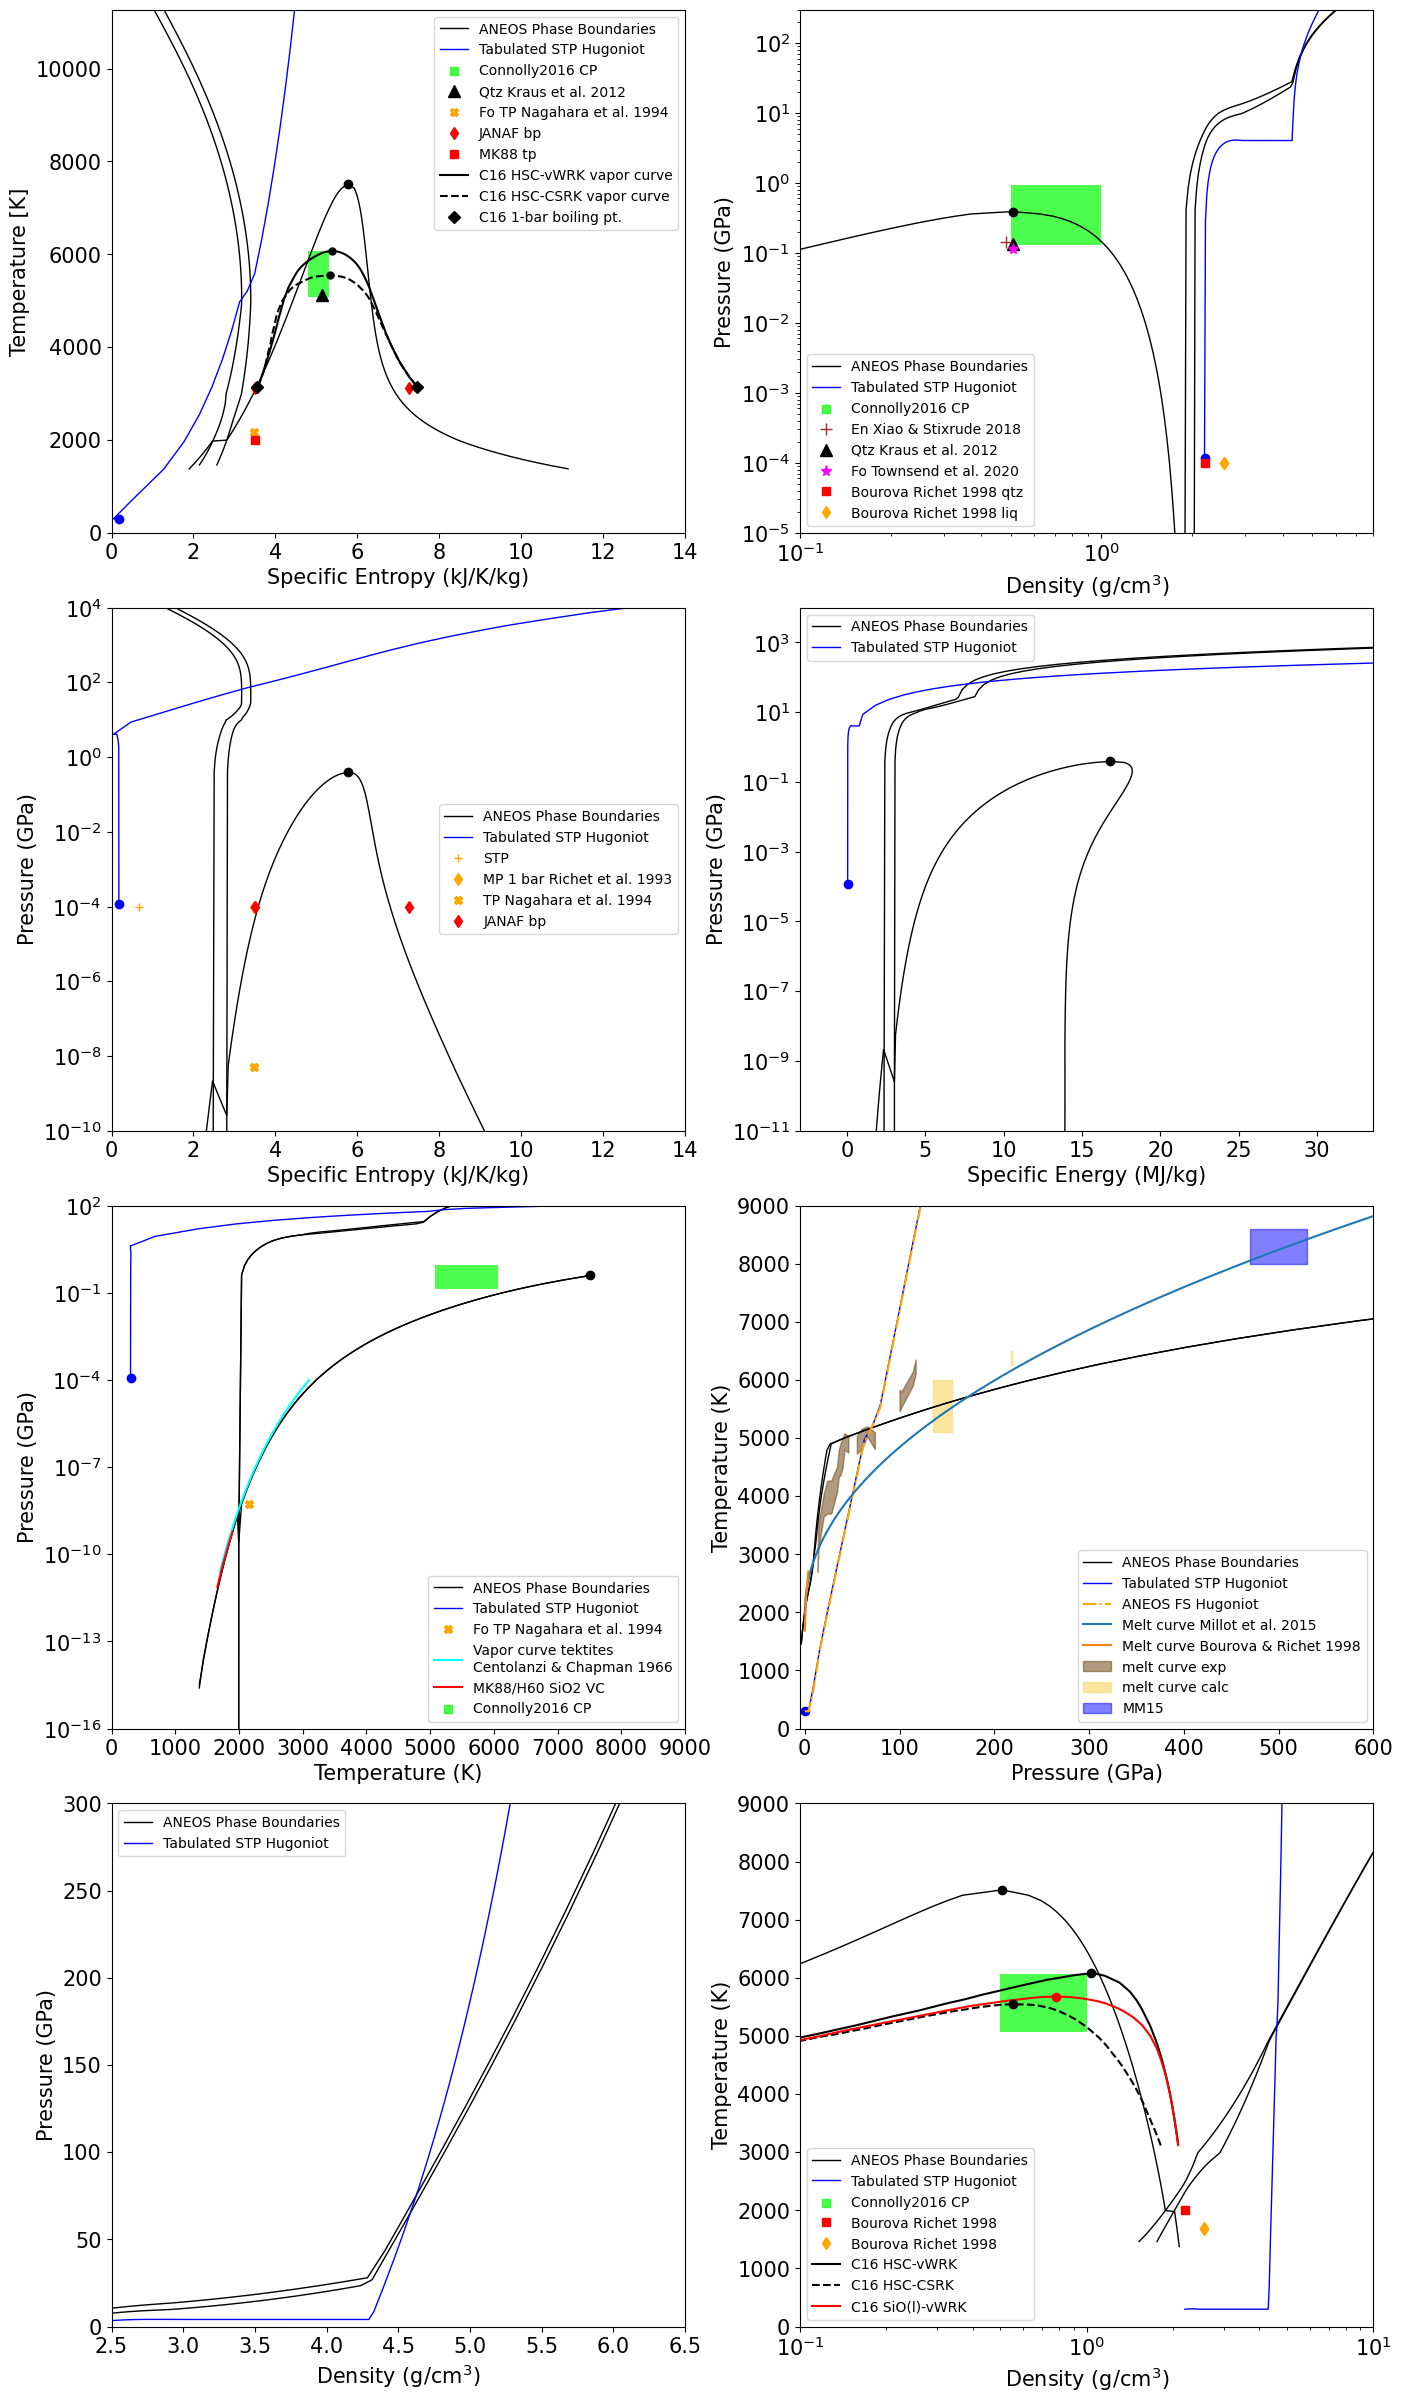

In [18]:
# PHASE DIAGRAM PLOTS
#======================LOTS OF PLOTS============================
# Plot aneos phase boundaries with focus on the vapor curve
sfont = 15
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#------------------------------
# entropy-temperature
ai=0
aj=0
axes[ai,aj].plot(NewEOS.vc.Sl*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.T[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylim(0,1.5*NewEOS.cp.T)
axes[ai,aj].set_xlim(0,14)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------------------
# density-pressure
ai=0
aj=1
axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])



axes[ai,aj].set_ylim(1.e-5,300)
axes[ai,aj].set_xlim(1.e-1,8)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
#entropy-pressure
ai=1
aj=0
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.E3,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-10,10000)
axes[ai,aj].set_xlim(0,14)

#-----------
# specific energy - pressure
ai=1
aj=1
axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.U,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.U[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-11,10000)
axes[ai,aj].set_xlim(-3,NewEOS.cp.U*2.)

#-------
# temperature - pressure
ai=2
aj=0
axes[ai,aj].semilogy(NewEOS.vc.T,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.T,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.T,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.T,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.T[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_xlim(0,9000)
axes[ai,aj].set_ylim(1.e-16,100)

#-------
# pressure - temperature melt curve
ai=2
aj=1
#axes[ai,aj].plot(NewEOS.vc.Pl,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
#axes[ai,aj].plot(NewEOS.vc.Pv,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
#axes[ai,aj].plot(NewEOS.cp.P,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Pl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.Ps,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.P[0],NewEOS.hug.T[0],'o',color=stylestphug[1])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.T,'-.',color='orange',label='ANEOS FS Hugoniot')

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,9000)
axes[ai,aj].set_xlim(-5,600)


#-------
# density - pressure melt curve
ai=3
aj=0
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,300)
axes[ai,aj].set_xlim(2.5,6.5)


#-------
# density -- temperature
ai=3
aj=1
axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
#axes[ai,aj].plot(NewEOS.hug.T[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,9000)
axes[ai,aj].set_xlim(0.1,10)



    
#===================================================================
# PLOT EXPERIMENTAL CONSTRAINTS ON THE ANEOS PHASE BOUNDARIES
PLOTDATA=1
datms = 8
if PLOTDATA:
    # entropy-temperature [0,0]
    ai=0
    aj=0
    
    # Connolly JGR 2016 summary of critical points
    axes[ai,aj].add_patch(Rectangle((4.8,5071), 0.5, 1000,  alpha=0.7, facecolor='lime', linewidth=0))
    axes[ai,aj].scatter(1900, -1.e-9, alpha=0.7, marker='s',color='lime', label='Connolly2016 CP')
    
    axes[ai,aj].plot(5.149,5130,'^',markersize=datms,color='black',label='Qtz Kraus et al. 2012')
    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(3.470,2163,'X',color='orange',label='Fo TP Nagahara et al. 1994')

    axes[ai,aj].add_patch(Rectangle((1850, 1.e-10), 600, 3.e-7, alpha=0.2, facecolor='brown', linewidth=0))
    axes[ai,aj].plot([3.507,7.267],[3127,3127],'d',color='red',label='JANAF bp')
    axes[ai,aj].plot([3.507],[1996],'s',color='red',label='MK88 tp')

    
    if 1:
        #plot Connolly calcs
        b = np.argsort(C16highs)
        axes[ai,aj].plot(C16highs[b]/1.e3,C16hight[b],'-',color='black',label='C16 HSC-vWRK vapor curve')
        axes[ai,aj].plot(5.382,6074,'o',color='black',markersize=5)
        axes[ai,aj].plot(C16lows/1.e3,C16lowt,'--',color='black',label='C16 HSC-CSRK vapor curve')
        axes[ai,aj].plot(5.322,5548,'o',color='black',markersize=5)
        #plt.plot(C16sils,C16silt,'-',color='orangered',label='C16 SiO(l)-vWRK')
        #plt.plot(5403,5675,'o',color='orangered')
        # plot boiling point at 1 bar
        # note Kraus S_vap too small
        axes[ai,aj].plot([3.554,7.460],[3130,3130],'kD',label='C16 1-bar boiling pt.')
      
    # density-pressure [0,1]
    ai=0
    aj=1
    # Connolly JGR 2016 summary of critical points
    axes[ai,aj].add_patch(Rectangle((0.5,.13), 0.5, .8,  alpha=0.7, facecolor='lime', linewidth=0))
    axes[ai,aj].scatter(1900, -1.e-9, alpha=0.7, marker='s',color='lime', label='Connolly2016 CP')

    axes[ai,aj].plot(0.4822,0.1414,'+',label='En Xiao & Stixrude 2018',markersize=datms,color='brown')
    axes[ai,aj].plot(0.508,0.132,'^',label='Qtz Kraus et al. 2012',markersize=datms,color='black')
    axes[ai,aj].plot(0.51,0.114,'*',label='Fo Townsend et al. 2020',markersize=datms,color='magenta')

    axes[ai,aj].plot(60.083/27.30,1.e-4,'s',color='red',label='Bourova Richet 1998 qtz')
    axes[ai,aj].plot(60.083/23.45,1.e-4,'d',color='orange',label='Bourova Richet 1998 liq')
    axes[ai,aj].plot(60.083/23.51,1.e-4,'d',color='orange',label='')

    # Caracas Pyrolite DFT
    #axes[ai,aj].add_patch(Rectangle((.3, .08), 0.7, 0.05, alpha=0.5, facecolor='cyan', linewidth=0))
    
    
    # entropy -- pressure [1,0]
    ai=1
    aj=0
    # 0.6689 kJ/kg STP entropy from Robie et al. 1982
    axes[ai,aj].plot(0.669,1.e-4,'+',color='orange',label='STP')
    # 1 bar melting point entropy, enthalpy and temperature from Richet et al. 1993
    axes[ai,aj].plot(3.470,1.e-4,'d',color='orange',label='MP 1 bar Richet et al. 1993')
    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(3.470,5.2e-9,'X',color='orange',label='TP Nagahara et al. 1994')

    axes[ai,aj].plot([3.507,7.267],[1.e-4,1.e-4],'d',color='red',label='JANAF bp')

    
    # temperature -- pressure [2,0]
    ai=2
    aj=0
    
    # Petaev BSE triple system region
    #axes[ai,aj].add_patch(Rectangle((1850, 1.e-10), 600, 3.e-7, alpha=0.2, facecolor='brown', linewidth=0))
    #axes[ai,aj].scatter(1900, -1.e-9, alpha=0.2, marker='s',color='brown', label='Petaev BSE TP')
    
    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(2163.,5.2e-9,'X',color='orange',label='Fo TP Nagahara et al. 1994')
    # Melt curve points
    # axes[ai,aj].plot(2174,1.e-4,'d',color='orange',label='Richet et al. 1993')
    # axes[ai,aj].plot(2550,13.,'v',color='orange',label='de Koker et al. 2009')
    # Nagahara et al. 1994 vapor curve of forsterite
    tvapfo = np.arange(46)*10.+1400.+273. # in C to K
    #pvapfo = np.exp(-77955.0/tvapfo+27.7)
    pvapfonagaqhara = np.exp(169.-543.e3/(8.314*(tvapfo))) 
    #print(pvapfonagahara)
    #print(tvapfo)
    #print(pvapfo)
    #axes[3,0].plot(tvapfo+273.,pvapfo*1.e5/1.e9,linestyle='-',color='orange',label='Sublimation curve\nMysen & Kushiro 1988')
    #axes[3,0].plot(tvapfo,pvapfonagahara*1.e5/1.e9,linestyle='-',color='green',label='Sublimation curve\nNagahara et al. 1994')
    #print(pvapfonagahara)
    #tt=np.zeros(7)
    #tt.fill(273.)
    #tt=tt+np.asarray([1400.,1500.,1600.,1700.,1725.,1760.,1800.])
    #axes[ai,aj].plot(tt,np.asarray([8.79E-9,5.98E-8,3.85E-7,2.7E-6,4.21E-6,9.58E-6,1.52E-5])/1.e4,'-x',color='orange',label='Fo Nagahara et al. 1994')

    #Centolanzi and Chapman Tektite vapor curve
    tvaptek = np.arange(1400)+1700. # in K
    pvaptek = np.exp(-57400.0/tvaptek+18.5)*101325. # in atm to Pa
    axes[ai,aj].plot(tvaptek,pvaptek/1.e9,linestyle='-',color='cyan',label='Vapor curve tektites\nCentolanzi & Chapman 1966')

    # Misha Petaev BSE vapor curve 50% condensed
    #axes[ai,aj].scatter([2500., 3000., 3500., 4000., 4500.],[0.5e-6,2.e-5,3.e-4,20e-4,100.e-4],marker='+',label='Petaev BSE 50% condensation')
    #axes[ai,aj].plot(6110,0.114,'*',label='Fo Townsend et al. 2020',markersize=datms,color='magenta')

    # Mysen and Kushiro 1988 SiO2 vapor curve and TPs
    # not sure this is pure SiO2 - may be mixed with H2 - check
    #axes[ai,aj].add_patch(Rectangle((1608+273, 4.e-11), 93, 1.3e-10, alpha=0.7, facecolor='green', linewidth=0))
    #axes[ai,aj].scatter(1900, -1.e-9, alpha=0.7, marker='s',color='green', label='Mysen1988 TP')
    # fitted temps between 2000 and 1880 - this is SiO2+H2
    #MKvap_t = np.arange(1880,2000,20) # K Fig 5
    #MKvap_p = np.exp(-50011/MKvap_t + 14.2)*1.e5/1.e9 # GPa
    #axes[ai,aj].plot(MKvap_t,MKvap_p,color='red',label='Mysen1988 SiO2+H2 VC')
    #print(MKvap_t,MKvap_p)
    # Figure 2 pure SiO2 Hidalgo 1960 equation 1660-1920 K
    MKvap_t = np.arange(1660,1920,20) # K Fig 2
    MKvap_p = np.exp(-57800/MKvap_t + 18.4)*1.e5/1.e9 # GPa
    axes[ai,aj].plot(MKvap_t,MKvap_p,color='red',label='MK88/H60 SiO2 VC')
    
    # Connolly JGR 2016 summary of critical points
    axes[ai,aj].add_patch(Rectangle((5071, .13), 1000, .8, alpha=0.7, facecolor='lime', linewidth=0))
    axes[ai,aj].scatter(1900, -1.e-9, alpha=0.7, marker='s',color='lime', label='Connolly2016 CP')
    
    # pressure- temperature [2,1]
    ai=2
    aj=1
    # Melt curve points
    axes[ai,aj].plot(stv_mc_MM15.Pl,stv_mc_MM15.T,label=stv_mc_MM15.label)
    axes[ai,aj].plot(qtz_mc_BR98.Pl,qtz_mc_BR98.T,label=qtz_mc_BR98.label)

    #axes[ai,aj].scatter(qtz_hug_LA80.P,qtz_hug_LA80.T,label=qtz_hug_LA80.label)
    #axes[ai,aj].plot(qtz_hug_KD.P,qtz_hug_KD.T,color='green',label='Qtz Brygoo et al. 2015')


    #axes[ai,aj].plot(Mosenfelderdatarr.iloc[:,0].values,Mosenfelderdatarr.iloc[:,1].values,linestyle='-',color='brown',linewidth=1,label='Forsterite Melt Curve\n(Mosenfelder et al. 2007)')
    #axes[ai,aj].plot(peridotiteliquidusdatarr.iloc[:,0].values,peridotiteliquidusdatarr.iloc[:,1].values,linestyle='-',color='orange',label='Peridotite Liquidus')
    #axes[ai,aj].plot(peridotitesolidusdatarr.iloc[:,0].values,peridotitesolidusdatarr.iloc[:,1].values,linestyle=':',color='orange',label='Peridotite Solidus\n(Fiquet et al. 2010)')
    if 1:
        wcol = "#653700"
        wcol2 = "#FBDD7E"
        wcol3 = "#F97306"
        wop = 0.5
        wop2=0.75
        wop3=0.25
        ind = np.arange(0,11)
        print(stsmc.P[ind])
        axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],label='melt curve exp',alpha=wop,color=wcol)
        ind = np.arange(12,16)
        print(stsmc.P[ind])
        axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],alpha=wop,color=wcol)
        ind = np.arange(17,21)
        print(stsmc.P[ind])
        axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],alpha=wop,color=wcol)
        ind = np.arange(22,24)
        print(stsmc.P[ind])
        axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],alpha=wop2,color=wcol2,label='melt curve calc')
        ind = np.arange(25,28)
        print(stsmc.P[ind])
        axes[ai,aj].fill_between(stsmc.P[ind],stsmc.T_s[ind],stsmc.T_l[ind],alpha=wop2,color=wcol2)
        # Millot stv melt curve crossing
        axes[ai,aj].fill_between([470.,530.],[8000.,8000.],[8600.,8600.],alpha=0.5,color='blue',label='MM15')
 

    if 0:
        ind = np.where(stsmcsmooth.P <=Pt3)[0]
        axes[ai,aj].plot(stsmcsmooth.P[ind],stsmcsmooth.T[ind],'m-',linewidth=3,label='Proposed melt curve')
        ind = np.where(stsmcsmooth.P >=Pt3)[0]
        axes[ai,aj].plot(stsmcsmooth.P[ind],stsmcsmooth.T[ind],'m:',linewidth=3)#,label='Proposed melt curve')

    # density - pressure [3,0]
    ai=3
    aj=0
    
    #axes[ai,aj].scatter(qtz_hug_LA80.rho[6],qtz_hug_LA80.P[6],color='green',label=qtz_hug_LA80.label)
    #axes[ai,aj].plot(qtz_hug_KD.rho,qtz_hug_KD.P,color='green',label=qtz_hug_KD.label)

    # density - temperature [3,1]
    ai=3
    aj=1
    # Connolly JGR 2016 summary of critical points for silica
    axes[ai,aj].add_patch(Rectangle((0.5,5071), 0.5, 1000,  alpha=0.7, facecolor='lime', linewidth=0))
    axes[ai,aj].scatter(1900, -1.e-9, alpha=0.7, marker='s',color='lime', label='Connolly2016 CP')

    axes[ai,aj].plot(60.083/27.30,1999.,'s',color='red',label='Bourova Richet 1998')
    axes[ai,aj].plot(60.083/23.45,1700.,'d',color='orange',label='Bourova Richet 1998')
    axes[ai,aj].plot(60.083/23.51,1673.,'d',color='orange',label='')

    #axes[ai,aj].scatter(qtz_hug_LA80.rho[6],qtz_hug_LA80.T[6],color='green',label=qtz_hug_LA80.label)

    # density - pressure [3,0]
    ai=3
    aj=1    
    # Connolly JGR 2016
    axes[ai,aj].plot(C16bsrho,C16bstemp,'k-',label='C16 HSC-vWRK')
    axes[ai,aj].plot(C16bdrho,C16bdtemp,'k--',label='C16 HSC-CSRK')
    axes[ai,aj].plot(C16rsrho,C16rstemp,'r-',label='C16 SiO(l)-vWRK')
    # critical points
    axes[ai,aj].plot(1.036,6074,'ko')
    axes[ai,aj].plot(.555,5548,'ko')
    axes[ai,aj].plot(.782,5675,'ro')

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)




plt.tight_layout(pad=0.6)
plt.savefig(MODELNAME+'-phase-diagram-fig.pdf', format='pdf', dpi=1000,transparent=True)
#--------



## ANEOS model comparisons to experimental data

In the liquid field, we assume that the heat capacity is constant and similar to the value for forsterite liquid reported in Thomas and Asimow 2013. 



3.6099158145574792
4.132848346563289


/var/folders/4z/xws_ywgj78sc494vpwymn9bw0000gn/T/ipykernel_87866/2785270329.py:159: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1,1].legend(fontsize=sfont-5)


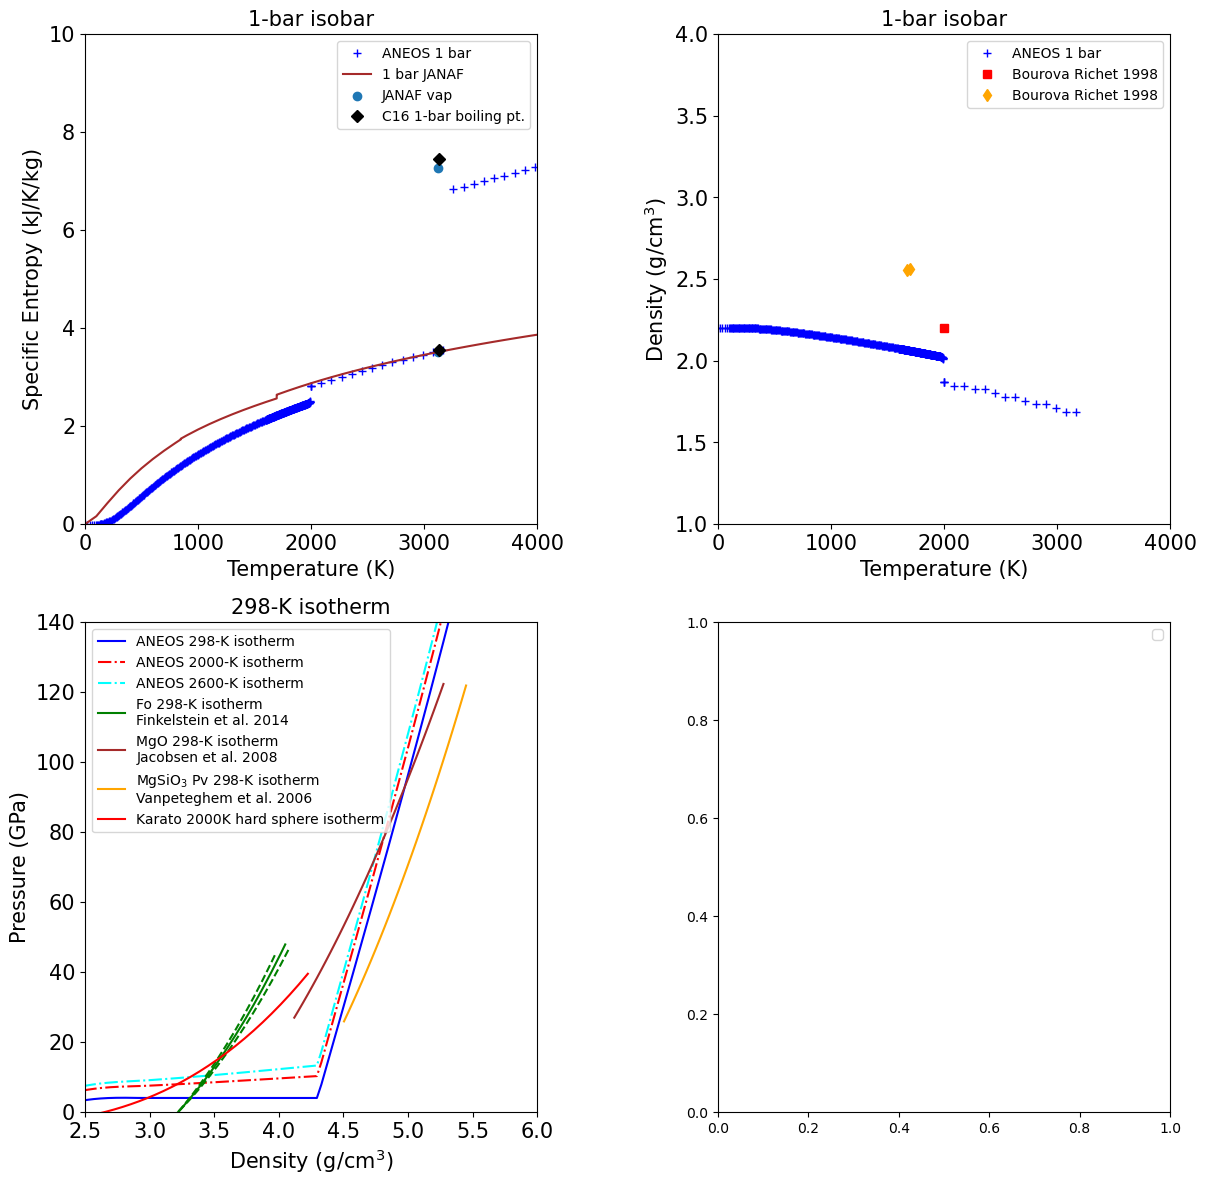

In [19]:
# 1-bar plots and 298 K plots

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)

#--------
# temperature - entropy at 1 bar
ai=0
aj=0

axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.S*1.E3,'+',color='blue',label='ANEOS 1 bar')

axes[ai,aj].plot(qtz_1bar_JANAF.T,qtz_1bar_JANAF.S,linestyle='-',color='brown',label=qtz_1bar_JANAF.label)
#axes[ai,aj].plot(janafgas_1bar.T,janafgas_1bar.S/1.e3,linestyle='-',color='orange',label='JANAF gas')
axes[ai,aj].scatter([3127,3127],[3.507,7.267],label='JANAF vap') 

axes[ai,aj].plot([3130,3130],[3.554,7.460],'kD',label='C16 1-bar boiling pt.')

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,10)
axes[ai,aj].set_xlim(0,4000)


#----
# density-temperature at 1 bar
ai=0
aj=1

axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.rho,'+',color='blue',label='ANEOS 1 bar')

axes[ai,aj].set_ylabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1,4)
axes[ai,aj].set_xlim(0,4000)

# plot data

axes[ai,aj].plot(1999.,60.083/27.30,'s',color='red',label='Bourova Richet 1998')
axes[ai,aj].plot(1700.,60.083/23.45,'d',color='orange',label='Bourova Richet 1998')
axes[ai,aj].plot(1673.,60.083/23.51,'d',color='orange',label='')

#----
# density-pressure at 298 K
ai=1
aj=0

iT0REF = np.where(NewEOS.T == T0REF)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-',color='blue',label='ANEOS 298-K isotherm')
iT0REF = np.where(NewEOS.T == 2000)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-.',color='red',label='ANEOS 2000-K isotherm')
iT0REF = np.where(NewEOS.T > 2600)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-.',color='cyan',label='ANEOS 2600-K isotherm')
iT0REF = np.where(NewEOS.T == T0REF)[0]

# Finkelstein et al. 2014 Forsterite isotherm
K0T = 130.0 # +-9 GPa
K0Tp = 4.12 # +- 0.07
R0F = 3.22 # g/cm3
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R0F,7./3.)-np.power(NewEOS.rho/R0F,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R0F,2./3.)-1.))
K0T = 130.0-9. # +-9 GPa
K0Tp = 4.12 # +- 0.07
BM_pressure_low = 1.5*K0T*(np.power(NewEOS.rho/R0F,7./3.)-np.power(NewEOS.rho/R0F,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R0F,2./3.)-1.))
K0T = 130.0+9. # +-9 GPa
K0Tp = 4.12 # +- 0.07
BM_pressure_high = 1.5*K0T*(np.power(NewEOS.rho/R0F,7./3.)-np.power(NewEOS.rho/R0F,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R0F,2./3.)-1.))
igood = np.where(BM_pressure < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='green',label='Fo 298-K isotherm\nFinkelstein et al. 2014')
igood = np.where(BM_pressure_low < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure_low[igood],'--',color='green')
igood = np.where(BM_pressure_high < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure_high[igood],'--',color='green')


# Jacobsen et al. 2008 MgO isotherm
K0T = 159.6 # +-0.6 GPa room temp isotherm
K0Tp = 3.74 # +-0.03 
R00 = (24.305+15.999)*4.*1.6726/(74.697*1.E-3)/1.E3 # kg/m3->g/cm3 
print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 25.)&(BM_pressure < 125.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='brown',label='MgO 298-K isotherm\nJacobsen et al. 2008')

# Vanpeteghem et al. 2006 silicate perovskite isotherm
K0T = 253. # +-1 GPa room temp isotherm
K0Tp = 4.0 
R00 = (24.305+28.085+3.*15.999)*4.*1.6726/(162.51*1.E-3)/1.E3 # kg/m3->g/cm3 
print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 25.)&(BM_pressure < 125.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='orange',label='MgSiO$_3$ Pv 298-K isotherm\nVanpeteghem et al. 2006')

# Hosono et al. nat Geo hard sphere model isotherm 2000 K
K0T = 25. # GPa
K0Tp = 5.2
R00 = 2.65
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where(BM_pressure < 40.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='red',label='Karato 2000K hard sphere isotherm')

axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('298-K isotherm',size=sfont)
axes[ai,aj].set_xlim(2.5,6)
axes[ai,aj].set_ylim(0,140)

#----
if 0:
    # density-pressure at 298 K
    ai=1
    aj=1

    axes[ai,aj].plot(mantle.density,mantle.pressure,'-',color='blue',label='ANEOS '+str(np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)))+' K isentrope',markersize=10)
    axes[ai,aj].plot(PREM.density/1.E3,PREM.pressure,'-',color='orange',label='PREM')

    mantle = isentrope_class() # code in eostable.py
    Tisentrope = 1000. #K
    Smantle = np.interp(Tisentrope,NewEOS.onebar.T,NewEOS.onebar.S)

    # loop across all densities and extract the values for the requested isentrope
    for i in range(0,NewEOS.ND):
        ind = np.where((NewEOS.S[:,i] > 0))[0]
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.P[ind,i]) # MJ/K/kg, GPa
        mantle.pressure = np.append(mantle.pressure,interpfunction(Smantle)) # GPa
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.T[ind]) # MJ/K/kg, GPa
        mantle.temperature = np.append(mantle.temperature,interpfunction(Smantle)) # GPa
    mantle.density = NewEOS.rho # g/cm3

    print('Calculated isentrope with ',np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)),' K potential temperature')
    axes[ai,aj].plot(mantle.density,mantle.pressure,'-.',color='blue',label='ANEOS '+str(np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)))+' K isentrope',markersize=10)

    axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
    axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
    axes[ai,aj].tick_params(labelsize=sfont)
    axes[ai,aj].set_title('PREM and '+str(np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)))+' K ANEOS model isentrope',size=sfont)
    axes[ai,aj].set_xlim(2,6)
    axes[ai,aj].set_ylim(0,140)

# don't show a plot in lower right
#axes[1,1].axis("off")


axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)



## ANEOS Gruneisen parameter and Theta parameter for thermal model

The Gruneisen parameter in forsterite liquid has been determined experimentally from shock wave data (Thomas & Asimow 2013; Davies et al. in prep.). Shockwave data derive the Grueneisen parameter in reference to a known state:
\begin{equation}
\gamma = \frac{1}{\rho}\frac{(P-P_{\rm ref})}{(E-E_{\rm ref})} \bigg\rvert _V
\end{equation}

The ANEOS Gruneisen model is split into two parts. For $\rho \ge \rho_{0}$,
\begin{equation}
\gamma = \left( \frac{\gamma_0 \rho_0}{\rho}  + C_{24} \left( 1-\frac{\rho_0}{\rho} \right)^2 \right) (1-C_{60}) + \left( \gamma_0 + (C_{24}-\gamma_0) \left( 1- \frac{\rho_0}{\rho} \right)^2 \right) C_{60}.
\end{equation}
For $\rho < \rho_{0}$,
\begin{equation}
\gamma = C_{16} \rho^2 + C_{17}\rho + 1 + C_{61}.
\end{equation}

$C_{16}$ and $C_{17}$ are calculated so that $\gamma$ and $d \gamma / d \rho$ are continuous at $\rho=\rho_0$. The model asymptotes to the Thomas-Fermi limit ($\gamma=2/3$) when $C_{24}=2/3$.

The functional form in ANEOS does not provide a good fit to the data on forsterite. As a result, the model Gruneisen parameter does not extrapolate to the Thomas-Fermi limit at high pressures. 

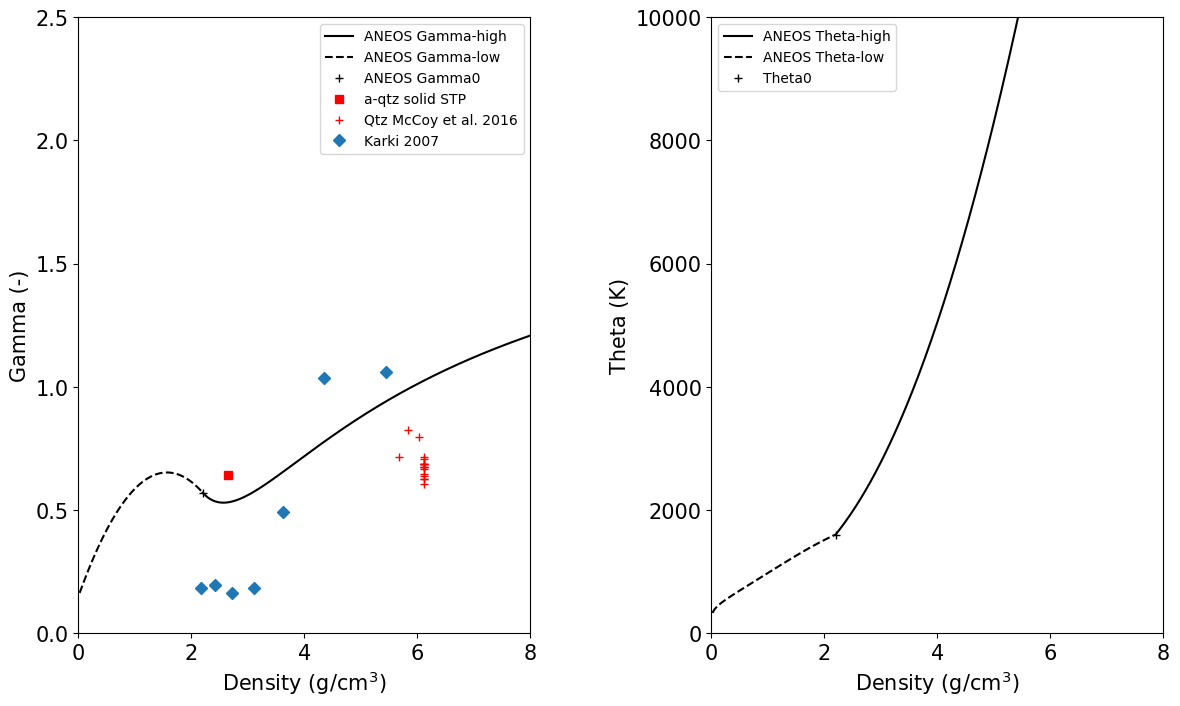

In [20]:
# plot the gamma and isotherms

#NewEOS.R0REF=4.0
#NewEOS.gamma0=1.1

# ANEOS Formulation for Gamma and theta
theta0=abs(NewEOS.theta0)
rhoarr = (1+np.arange(1000))/1000.*NewEOS.R0REF*10.
gammaarr = (NewEOS.gamma0*NewEOS.R0REF/rhoarr
           )+NewEOS.C24*np.power(1.0-NewEOS.R0REF/rhoarr,2.)*(1.-NewEOS.C60)+(NewEOS.gamma0 + (NewEOS.C24-NewEOS.gamma0)*np.power(1.-NewEOS.R0REF/rhoarr,2.))*NewEOS.C60
s3 = NewEOS.C61+1.
C14 = theta0 * np.exp(1.5*s3-(2.-0.5*NewEOS.C60)*NewEOS.gamma0)/(np.power(NewEOS.R0REF,s3))
C16 = (s3-(2.-NewEOS.C60)*NewEOS.gamma0)/(NewEOS.R0REF*NewEOS.R0REF)
C17 = ((3.-NewEOS.C60)*NewEOS.gamma0-2.*s3)/NewEOS.R0REF
gammaarrlow = C16*rhoarr*rhoarr+C17*rhoarr+s3
thetaarr = theta0*np.exp((1.-NewEOS.C60)*(1.-NewEOS.R0REF/rhoarr)*NewEOS.gamma0-0.5*(NewEOS.R0REF/rhoarr)*(3.-(NewEOS.R0REF/rhoarr)*(4-(NewEOS.R0REF/rhoarr))))*np.power((rhoarr/NewEOS.R0REF),NewEOS.C24)
thetalowarr = C14*np.exp(rhoarr*(C17+0.5*C16*rhoarr))*np.power(rhoarr,s3)


#-------- plots
sfont = 15
fig, axes = plt.subplots(1, 2, figsize=(14,8))
plt.subplots_adjust(wspace=0.4)


# -----
ai=0
indlow = np.where(rhoarr <= NewEOS.R0REF)
indhigh = np.where(rhoarr >= NewEOS.R0REF)
axes[ai].plot(rhoarr[indhigh[0]],gammaarr[indhigh[0]],label="ANEOS Gamma-high",color='black')
axes[ai].plot(rhoarr[indlow[0]], gammaarrlow[indlow[0]],label="ANEOS Gamma-low",color='black',ls='--')

axes[ai].plot(NewEOS.R0REF,NewEOS.gamma0,'+',label="ANEOS Gamma0",color='black')

axes[ai].set_ylim(0,2.5)
axes[ai].set_xlim(0,8)

axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Gamma (-)',size=sfont)
axes[ai].tick_params(labelsize=sfont)

# solid forsterite at STP
#axes[ai].plot([3.22],[1.29],'s',color='red',label='Fo solid STP')

# solid alpha-quartz at STP Rammo & Farid Powder Diffraction 1994 
axes[ai].plot([2.65],[0.641],'s',color='red',label='a-qtz solid STP')

# Thomas and Asimow 2013 liquid forsterite shock data
gamma_0=0.396
q=-2.02
q_u=1.03
Rho_0=2597. # kg/m^3
asi_rhot = np.array([3739.79122056, 3335.90237636,4691.02371542 ,4088.40354767, 4347.15217391 ,4681.1865942 ])
##asi_rhot=np.array([3340.0, 3740.0, 4100.0, 4680.0, 5290.0, 5420.0]) # BAD TABULATED VALUES in TA13
asi_gammat=gamma_0*np.power(Rho_0/asi_rhot,q)

asi_rho = np.append([2597.],asi_rhot)/1.e3
asi_gamma = np.append([0.396],asi_gammat)

#print(asi_rho)
#print(asi_gamma)
#[3739.79122056 3335.90237636 4691.02371542 4088.40354767 4347.15217391 4681.1865942 ]
#[0.82720568 0.65667847 1.30744208 0.99037675 1.12107749 1.30190973]

# Erik's error bars monte carlo'd for the asimow data
#gamma [ 0.82271901  0.65485213  1.29584059  0.97276836  1.11171104  1.29195917]
asi_gamma_sig_low=np.asarray([0., 0.25715384 , 0.14948592 , 0.5898531,   0.36154228 , 0.45607297 , 0.58790934])
asi_gamma_sig_high=np.asarray([0., 0.37855329,  0.19525818 , 1.09577441,  0.6137275 ,  0.78965792 , 1.08676142])

#axes[ai].plot(asi_rho,asi_gamma,'o',color='orange',label='Forsterite liq.\nTA13 corrected')
#for i in range(0,len(asi_gamma)):
#    axes[ai].plot([asi_rho[i],asi_rho[i]],[asi_gamma[i]-asi_gamma_sig_low[i],asi_gamma[i]+asi_gamma_sig_high[i]],linestyle='-',color='orange')

# these values from the submitted paper
#axes[ai].errorbar(SR_rho,SR_gamma,yerr=SR_gamma_e, xerr=SR_rho_e, fmt='g+', label ='Forsterite liq. Z data\nDavies et al. 2019')

gamma_0=0.5
Rho_0=2.65
Karato_gammar=np.arange(.7,1,.01)
q=-2
Karato_gammat=gamma_0*np.power(Karato_gammar,q)
#axes[ai].plot(Rho_0/(Karato_gammar),Karato_gammat,label='Karato gamma model')
#print(Rho_0/Karato_gammar)
#print(Karato_gammat)

axes[ai].plot(qtz_hug_McCoy16.rho,qtz_hug_McCoy16.gamma,'+',color='red',label=qtz_hug_McCoy16.label)
axes[ai].plot(karkigcvorig.rho,karkigcvorig.gamma,'D',label='Karki 2007')
# -----
ai=1
axes[ai].plot(rhoarr[indhigh[0]],thetaarr[indhigh[0]],label="ANEOS Theta-high",color='black')
axes[ai].plot(rhoarr[indlow[0]],thetalowarr[indlow[0]],label="ANEOS Theta-low",color='black',ls='--')
axes[ai].plot(NewEOS.R0REF,theta0,'+',label="Theta0",color='black')

axes[ai].set_ylim(0,10000)
axes[ai].set_xlim(0,8)

axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Theta (K)',size=sfont)
axes[ai].tick_params(labelsize=sfont)


axes[0].legend(fontsize=sfont-5)
axes[1].legend(fontsize=sfont-5)



# Specific Heat Capacity and Sounds Speeds

The calculated heat capacities on the forsterite Hugoniot in the liquid region, from Root et al. 2018, are similar to the 1-bar value derived from Thomas and Asimow 2013. Both are larger than the 3nR high temperature value for the solid (Gillet et al. 1991).

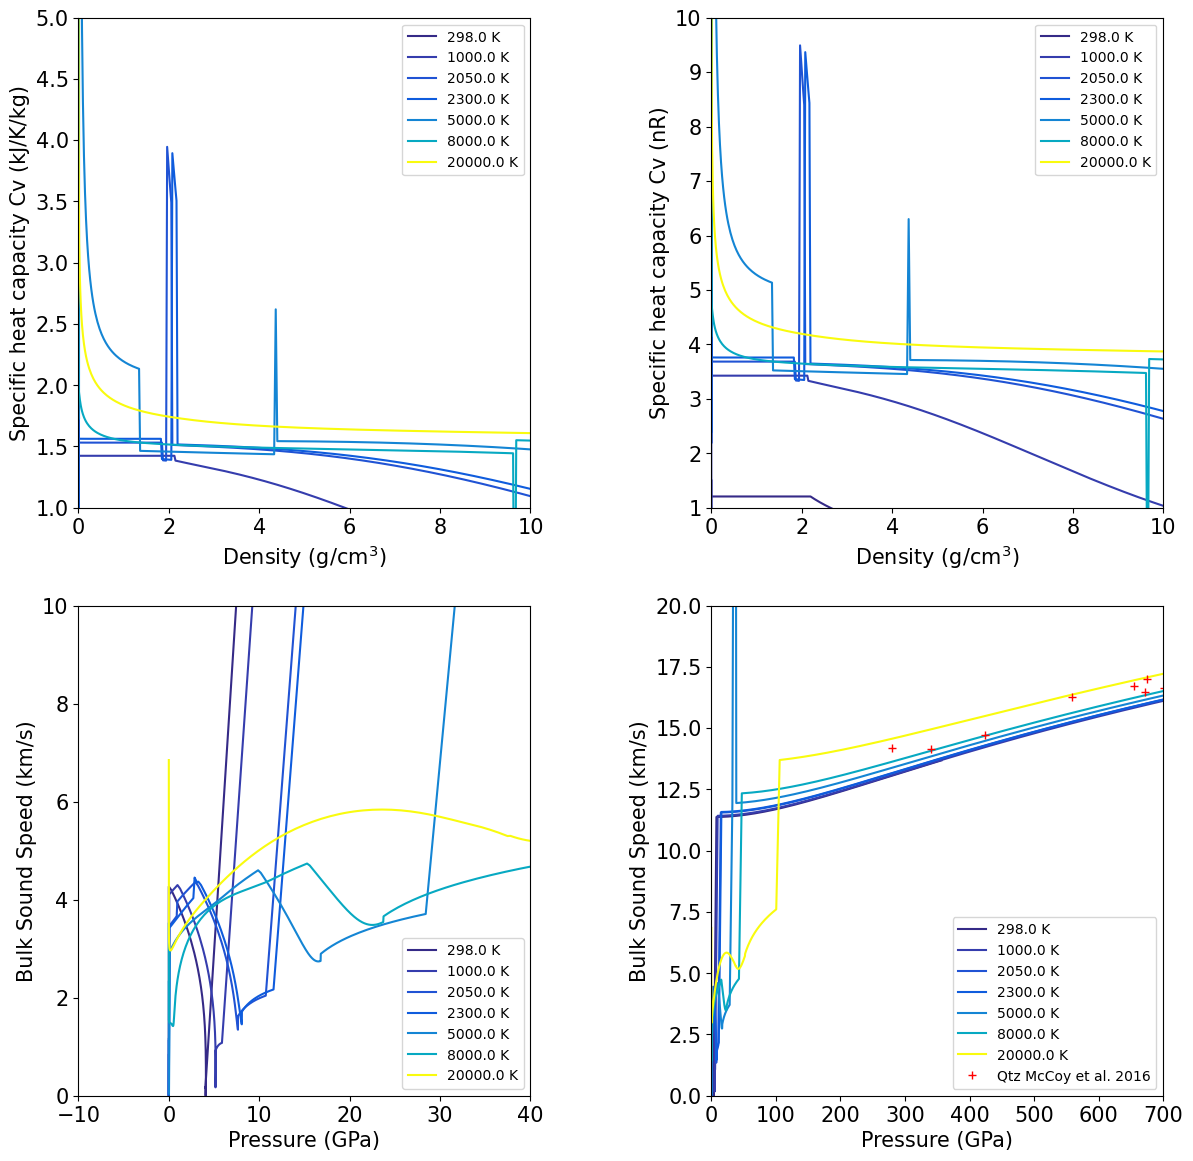

In [21]:

sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)


#-----------------------------
# Pick isotherms and set color scale
ixtemparr = [298.,1000.,2050.,2300.,5000.,8000.,20000.]
# set color scale same for all plots
tcolmin=0.
tcolmax=20000.

# find the index closest to the selected temperatures -- no interpolation
ixindarr=np.zeros(len(ixtemparr))
ixlabelarr = []
for i in np.arange(len(ixtemparr)):
    tmpi=int(np.round(np.interp(ixtemparr[i],NewEOS.T,np.arange(NewEOS.NT))))
    #print(tmpi,antarr[tmpi])
    ixindarr[i] = tmpi
    ixlabelarr.append(str(ixtemparr[i])+' K')


#-----------------------
ai=0
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.,c=col,linestyle='-',label=ixlabelarr[i])

#axes[ai,aj].plot(QMDH_r1,QMDH_cv*1000.,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
#axes[ai,aj].plot(2.597,1.73736,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 20133)')
#axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/1.E3,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(1.,5.)
axes[ai,aj].set_xlim(0,10)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
ai=0
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.*1000./7/8.314*0.14,c=col,linestyle='-',label=ixlabelarr[i])


#axes[ai,aj].plot(QMDH_r1,QMDH_cv*1.E6/7/8.314*0.14,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
#axes[ai,aj].plot(2.597,1737./7/8.314*0.140,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 2013)')
#axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/7/8.314*0.140,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(1.,10.)
axes[ai,aj].set_xlim(0,10)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (nR)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
# plot sound speed along isotherms
ai=1
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

#axes[ai,aj].plot(1.e-4,2.674,'d',color='orange',label='Thomas & Asimow 2013 2273 K')

axes[ai,aj].set_ylim(0,10)
axes[ai,aj].set_xlim(-10,40)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-----------------------
# plot sound speed along isotherms
ai=1
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

#axes[ai,aj].plot(1.e-4,2.674,'d',color='orange',label='Thomas & Asimow 2013 2273 K')

axes[ai,aj].plot(qtz_hug_McCoy16.P,qtz_hug_McCoy16.cs,'+',color='red',label=qtz_hug_McCoy16.label)


axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_xlim(0,700)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)


# Compare Silica EOS Models

In [22]:
# Load older ANEOS models for comparison
# Load in Melosh 2013 model
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
ORIGMODELNAME = MODELNAME
subdir='silica-Melosh2007/'
MODELNAME = 'Silica_Melosh_2007'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 070513.     # Date as a single 6-digit number YYMMDD
VERSION = 1.0      # ANEOS Parameters Version number
FMN = 30.          # Formula weight in atomic numbers for silica
FMW = 60.083       # Formula molecular weight (g/mol)
# The following define the default initial state for material in the 201 table
R0REF   = 2.65     # g/cm3 *** R0REF is inserted into the density array
K0REF   = 3.58E11  # dynes/cm2
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below

MeloshEOS  = etab.extEOStable() # FIRST make new empty EOS object
MeloshEOS.loadextsesame(subdir+'NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
MeloshEOS.loadstdsesame(subdir+'NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
MeloshEOS.MODELNAME = MODELNAME # string set above in user input
MeloshEOS.MDQ = np.zeros((MeloshEOS.NT,MeloshEOS.ND)) # makes the empty MDQ array
#print(MeloshEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
MeloshEOS.MATID   = MATID
MeloshEOS.DATE    = DATE
MeloshEOS.VERSION = VERSION
MeloshEOS.FMN     = FMN
MeloshEOS.FMW     = FMW
MeloshEOS.R0REF   = R0REF
MeloshEOS.K0REF   = K0REF
MeloshEOS.T0REF   = T0REF
MeloshEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
MeloshEOS.loadaneos(aneosinfname=subdir+'ANEOS.INPUT',aneosoutfname=subdir+'ANEOS.OUTPUT',silent=True)
#
# calculate the principal Hugoniot from the table
MeloshEOS.calchugoniot(r0=MeloshEOS.R0REF,t0=MeloshEOS.T0REF)
# Calculate the fused silica Hugoniot from the table
MeloshEOS.calcOffEOSHugoniot(r0=2.20,t0=298.,p0=1.e-4,e0=0.,r1=2.65)
#
# calculate the 1-bar profile; loop over temp
MeloshEOS.onebar.T = np.zeros(MeloshEOS.NT)
MeloshEOS.onebar.S = np.zeros(MeloshEOS.NT)
MeloshEOS.onebar.rho = np.zeros(MeloshEOS.NT)
it0 = np.where(MeloshEOS.T >= MeloshEOS.T0REF)[0]
id0 = np.arange(MeloshEOS.ND)#np.where(MeloshEOS.rho >= 0.8*MeloshEOS.R0REF)[0]
for iit in range(0,MeloshEOS.NT):
    MeloshEOS.onebar.T[iit] = MeloshEOS.T[iit]
    MeloshEOS.onebar.S[iit] = np.interp(1.E-4,MeloshEOS.P[iit,id0],MeloshEOS.S[iit,id0])
    MeloshEOS.onebar.rho[iit] = np.interp(1.E-4,MeloshEOS.P[iit,id0],MeloshEOS.rho[id0])
    #print(iit,MeloshEOS.onebar.rho[iit],MeloshEOS.onebar.T[iit],MeloshEOS.onebar.S[iit]*1.E3)


rho0= 2.65
r1= 2.65
367 22 2.2 298.0 0.0001 0.0 0.0 3.67465878



Requested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):
Initial Pressure (GPa): 0.0001
Initial Temperature (K): 298.0
Initial Sp. Entropy (MJ/K/kg): 0.00017886
Initial Sp. Internal Energy (MJ/kg): 0.043369
Initial Density (g/cm3): 2.2


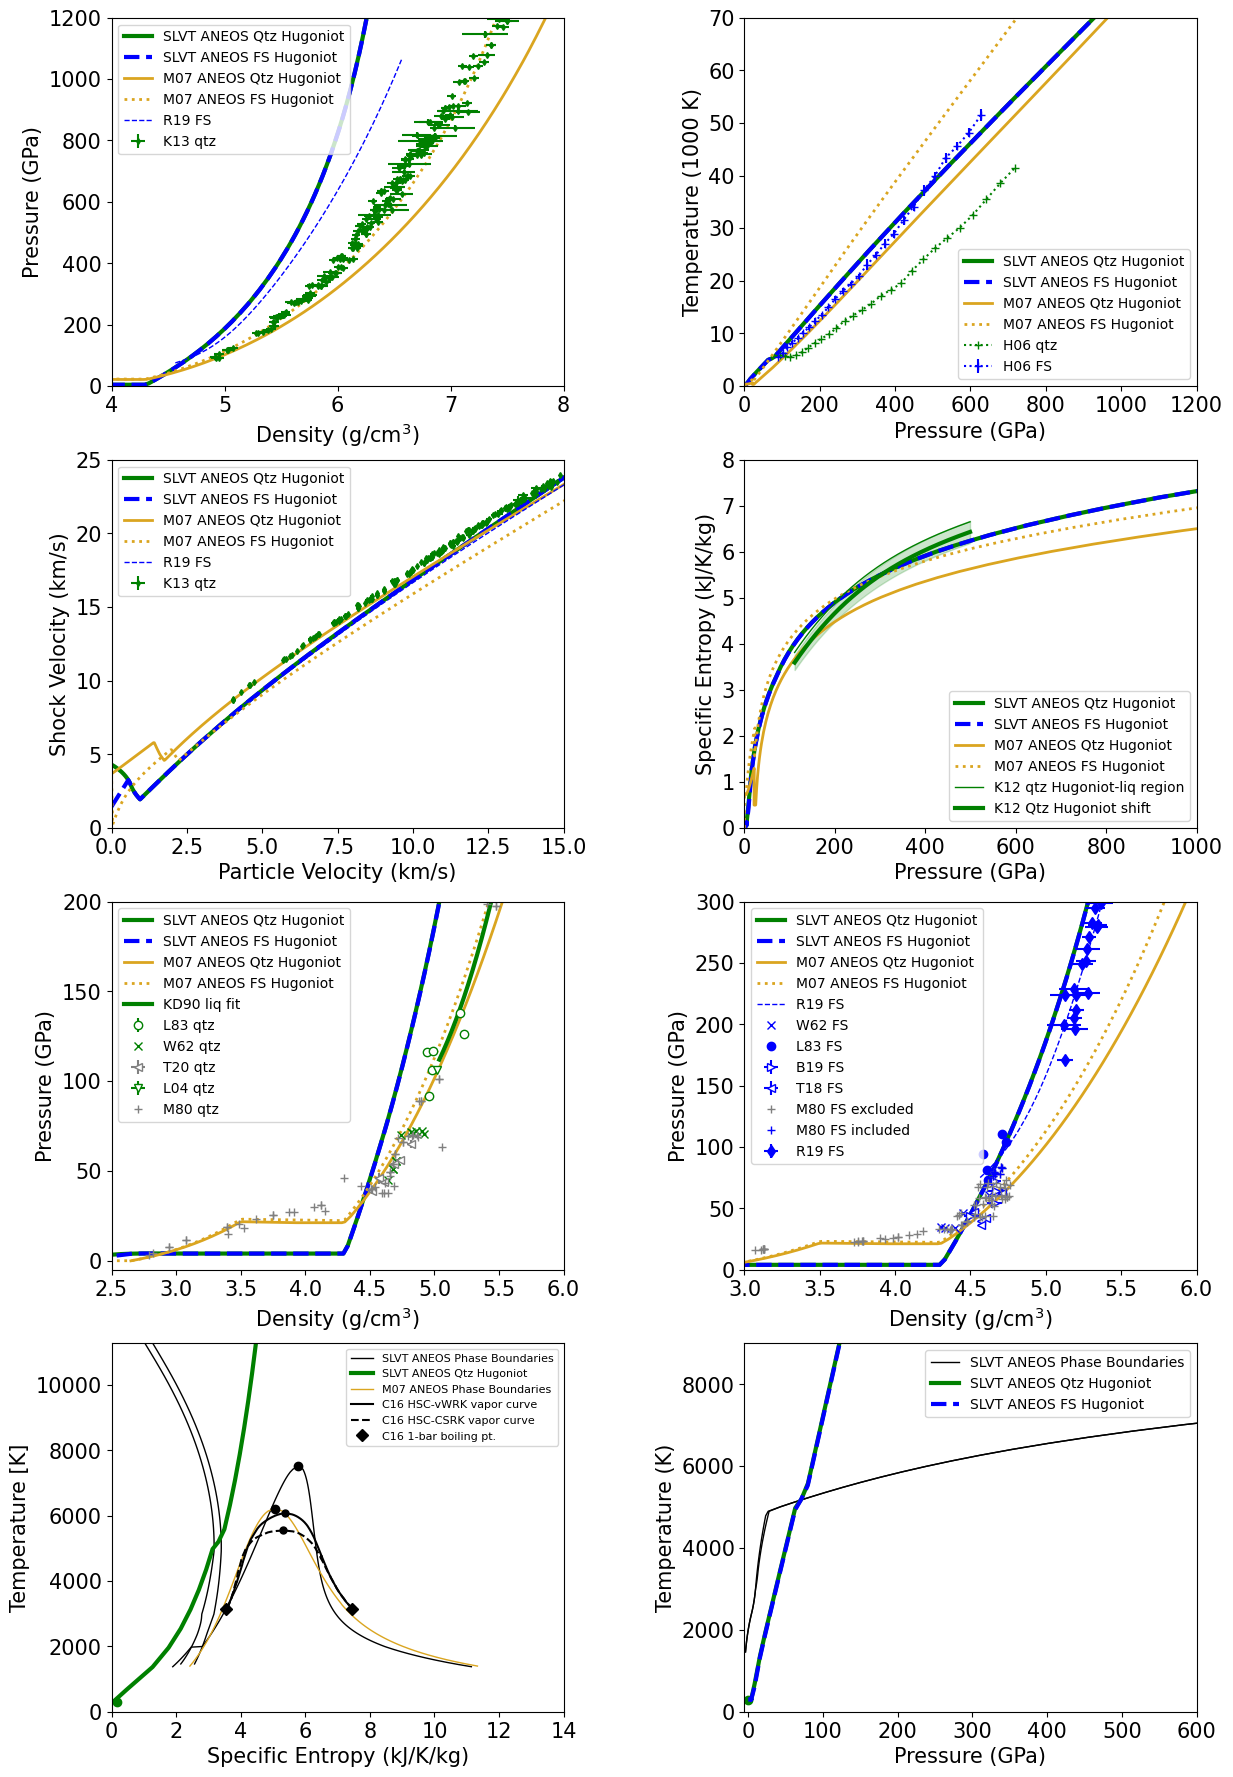

In [23]:
# Display the initial conditions for the Hugoniot in ANEOS.OUTPUT    
print('\nRequested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.anhug.P[0])
print('Initial Temperature (K):',NewEOS.anhug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.anhug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.anhug.U[0])
print('Initial Density (g/cm3):',NewEOS.anhug.rho[0])
#

#========== PLOTTING STYLES FOR LOTS OF PLOTS =================
styleqmd = ['^','red',5,'Fo QMD calc (Root et al. 2018)']
stylezdat = ['^','black',5,'Fo Z data (Root et al. 2018)']
stylegg = ['+','green',5,'Fo Gas gun data\n(Mosenfelder et al. 2007)']
styleliq = ['^','orange',7,'Liquid Fo data corrected\n(Thomas & Asimow 2013)']
styleliqhug = ['-','orange',1,'SLVT ANEOS Liquid 2273K Hugoniot']
stylezfit = ['-','green',1,'Fo Z fit (Davies et al. 2019)']
styleanhug = ['-','red',1,'SLVT ANEOS Glass-tension Hugoniot']
stylestphug = ['-','green',3,'SLVT ANEOS Qtz Hugoniot']
styleanphase = ['-','black',1,'SLVT ANEOS Phase Boundaries']
stylephasept = ['o','black',6]

styleanFS = ['--','blue',3,'SLVT ANEOS FS Hugoniot']

styleqtzhugmelosh = ['-','goldenrod',2,'M07 ANEOS Qtz Hugoniot']
stylefshugmelosh = [':','goldenrod',2,'M07 ANEOS FS Hugoniot']
styleanphasemelosh = ['-','goldenrod',1,'M07 ANEOS Phase Boundaries']


#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,22))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Density Data vs. ANEOS
ai=0
aj=0
#axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,styleanFS[0],linewidth=styleanFS[2],color=styleanFS[1],label=styleanFS[3])

axes[ai,aj].plot(MeloshEOS.hug.rho,MeloshEOS.hug.P,styleqtzhugmelosh[0],linewidth=styleqtzhugmelosh[2],color=styleqtzhugmelosh[1],label=styleqtzhugmelosh[3])
axes[ai,aj].plot(MeloshEOS.hugo.rho,MeloshEOS.hugo.P,stylefshugmelosh[0],linewidth=stylefshugmelosh[2],color=stylefshugmelosh[1],label=stylefshugmelosh[3])
     
if 0:
    axes[ai,aj].scatter(qtz_hug_W62.rho,qtz_hug_W62.P,marker='+',color='purple',label=qtz_hug_W62.label)
    axes[ai,aj].scatter(qtz_hug_L3.rho,qtz_hug_L3.P,marker='+',color='blue',label=qtz_hug_L3.label)
    axes[ai,aj].plot(qtz_hug_KD.rho,qtz_hug_KD.P,color='green',linewidth=5,label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.rho,fs_hug_RTK19.P,':',color='green',linewidth=5,label=fs_hug_RTK19.label)

if 1:
    axes[ai,aj].errorbar(shockdat_list[K13qtz['id']].rho,shockdat_list[K13qtz['id']].P,fmt='gd',markersize=3,\
             xerr=shockdat_list[K13qtz['id']].rho_std,yerr=shockdat_list[K13qtz['id']].P_std,label=K13qtz['lab'])
    ind = np.where(fs_hug_RTK19.P > 74.)[0]
    axes[ai,aj].plot(fs_hug_RTK19.rho[ind],fs_hug_RTK19.P[ind],'b--',label='R19 FS',linewidth=1)

axes[ai,aj].set_ylim(0,1200)
axes[ai,aj].set_xlim(4.,8)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure - Temperature Data vs. ANEOS
ai=0
aj=1

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.e3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.T/1.e3,styleanFS[0],linewidth=styleanFS[2],color=styleanFS[1],label=styleanFS[3])

axes[ai,aj].plot(MeloshEOS.hug.P,MeloshEOS.hug.T/1.e3,styleqtzhugmelosh[0],linewidth=styleqtzhugmelosh[2],color=styleqtzhugmelosh[1],label=styleqtzhugmelosh[3])
axes[ai,aj].plot(MeloshEOS.hugo.P,MeloshEOS.hugo.T/1.e3,stylefshugmelosh[0],linewidth=stylefshugmelosh[2],color=stylefshugmelosh[1],label=stylefshugmelosh[3])

if 0:
    axes[ai,aj].plot(qtz_hug_KD.P,qtz_hug_KD.T/1.e3,color='green',linewidth=5,label='Qtz Brygoo et al. 2015')
    axes[ai,aj].plot(fs_hug_Hicks06.P,fs_hug_Hicks06.T/1.e3,':',color='green',linewidth=5,label=fs_hug_Hicks06.label)

    axes[ai,aj].scatter(qtz_hug_LA80.P,qtz_hug_LA80.T/1.E3,marker='+',color='green',label='Qtz Lyzenga & Ahrens 1980')
    axes[ai,aj].plot(stv_mc_MM15.Pl,stv_mc_MM15.T/1.E3,color='black',label=stv_mc_MM15.label)
if 1:
    axes[ai,aj].errorbar(fs_hug_Hicks06.P,fs_hug_Hicks06.T/1.e3,fmt='b+:',\
             yerr=fs_hug_Hicks06.T_std/1.e3,label='H06 FS')
    axes[ai,aj].plot(qtz_hug_Hicks06.P,qtz_hug_Hicks06.T/1.e3,'g+:',label='H06 qtz')

axes[ai,aj].set_xlim(0,1200)
axes[ai,aj].set_ylim(0,70)
axes[ai,aj].set_ylabel('Temperature (1000 K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Particle Velocity vs. Shock Velocity; Data vs. ANEOS
ai=1
aj=0

axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.up,NewEOS.hugo.us,styleanFS[0],linewidth=styleanFS[2],color=styleanFS[1],label=styleanFS[3])

axes[ai,aj].plot(MeloshEOS.hug.up,MeloshEOS.hug.us,styleqtzhugmelosh[0],linewidth=styleqtzhugmelosh[2],color=styleqtzhugmelosh[1],label=styleqtzhugmelosh[3])
axes[ai,aj].plot(MeloshEOS.hugo.up,MeloshEOS.hugo.us,stylefshugmelosh[0],linewidth=stylefshugmelosh[2],color=stylefshugmelosh[1],label=stylefshugmelosh[3])

if 0:
    axes[ai,aj].scatter(qtz_hug_W62.up,qtz_hug_W62.us,marker='+',color='purple',label=qtz_hug_W62.label)
    axes[ai,aj].scatter(qtz_hug_L3.up,qtz_hug_L3.us,marker='+',color='blue',label=qtz_hug_L3.label)
    axes[ai,aj].plot(qtz_hug_KD.up,qtz_hug_KD.us,color='green',label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.up,fs_hug_RTK19.us,':',color='green',label=fs_hug_RTK19.label)

if 1:
    axes[ai,aj].errorbar(shockdat_list[K13qtz['id']].up,shockdat_list[K13qtz['id']].us,fmt='gd',markersize=3,\
             xerr=shockdat_list[K13qtz['id']].up_std,yerr=shockdat_list[K13qtz['id']].us_std,label=K13qtz['lab'])
    ind = np.where(fs_hug_RTK19.P > 74.)[0]
    axes[ai,aj].plot(fs_hug_RTK19.up[ind],fs_hug_RTK19.us[ind],'b--',label='R19 FS',linewidth=1)


axes[ai,aj].set_xlim(0,15)
axes[ai,aj].set_ylim(0,25)
axes[ai,aj].set_xlabel('Particle Velocity (km/s)',size=sfont)
axes[ai,aj].set_ylabel('Shock Velocity (km/s)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Sp. Entropy vs Pressure; Calculated from experiments vs. ANEOS
ai=1
aj=1

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.e3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.S*1.e3,styleanFS[0],linewidth=styleanFS[2],color=styleanFS[1],label=styleanFS[3])

axes[ai,aj].plot(MeloshEOS.hug.P,MeloshEOS.hug.S*1.e3,styleqtzhugmelosh[0],linewidth=styleqtzhugmelosh[2],color=styleqtzhugmelosh[1],label=styleqtzhugmelosh[3])
axes[ai,aj].plot(MeloshEOS.hugo.P,MeloshEOS.hugo.S*1.e3,stylefshugmelosh[0],linewidth=stylefshugmelosh[2],color=stylefshugmelosh[1],label=stylefshugmelosh[3])

if 0:
    # Kraus entropy fit only good to 800 GPa
    ind = np.where(qtz_hug_KD.P <= 800.)
    axes[ai,aj].plot(qtz_hug_KD.P[ind],qtz_hug_KD.S[ind],color='green',label='Qtz Kraus et al. 2012')
    Kraus_serr = (127.3+0.328*qtz_hug_KD.P[ind]-0.000193*np.power(qtz_hug_KD.P[ind],2))/1.e3 # kJ/K/kg
    axes[ai,aj].fill_between(qtz_hug_KD.P[ind],(qtz_hug_KD.S[ind]-Kraus_serr),(qtz_hug_KD.S[ind]+Kraus_serr),color=stylezfit[1],alpha=0.2)

# silicadb
if 1:
    entropyshift = 220.
    penter = 111.
    kqtzparr = np.arange(100,500) # GPa
    kqtzsarr = 1793+22.4*kqtzparr-0.0426*np.power(kqtzparr,2)+4.319e-05*np.power(kqtzparr,3)-1.742e-8*np.power(kqtzparr,4)
    kqtzserrarr = 127.3+0.328*kqtzparr-0.000193*np.power(kqtzparr,2)
    ind = np.where(kqtzparr >= penter)[0]
    axes[ai,aj].plot(kqtzparr[ind],kqtzsarr[ind]/1.e3,'g-',linewidth=1,label='K12 qtz Hugoniot-liq region')
    axes[ai,aj].plot(kqtzparr[ind],(kqtzsarr[ind]-entropyshift)/1.e3,'g-',linewidth=3,label='K12 Qtz Hugoniot shift')
    axes[ai,aj].fill_between(kqtzparr[ind],(kqtzsarr[ind]-entropyshift-kqtzserrarr[ind])/1.e3,(kqtzsarr[ind]-entropyshift+kqtzserrarr[ind])/1.e3,color=stylezfit[1],alpha=0.2)
   
axes[ai,aj].set_ylim(0,8.)
axes[ai,aj].set_xlim(0,1000)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   LOW PRESSURE + LIQUID HUGONIOT
ai=2
aj=0
# ANEOS REFERENCE POINT (STP) Hugoniots
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,styleanFS[0],linewidth=styleanFS[2],color=styleanFS[1],label=styleanFS[3])

axes[ai,aj].plot(MeloshEOS.hug.rho,MeloshEOS.hug.P,styleqtzhugmelosh[0],linewidth=styleqtzhugmelosh[2],color=styleqtzhugmelosh[1],label=styleqtzhugmelosh[3])
axes[ai,aj].plot(MeloshEOS.hugo.rho,MeloshEOS.hugo.P,stylefshugmelosh[0],linewidth=stylefshugmelosh[2],color=stylefshugmelosh[1],label=stylefshugmelosh[3])

if 0:
    axes[ai,aj].scatter(qtz_hug_W62.rho,qtz_hug_W62.P,marker='+',color='purple',label=qtz_hug_W62.label)
    axes[ai,aj].scatter(qtz_hug_L3.rho,qtz_hug_L3.P,marker='+',color='blue',label=qtz_hug_L3.label)
    axes[ai,aj].plot(qtz_hug_KD.rho,qtz_hug_KD.P,color='green',label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.rho,fs_hug_RTK19.P,':',color='green',label=fs_hug_RTK19.label)

# silicadb
if 1:
    axes[ai,aj].errorbar(shockdat_list[L83qtzhug['id']].rho,shockdat_list[L83qtzhug['id']].P,fmt='go',mfc='white',\
                 yerr=shockdat_list[L83qtzhug['id']].P_std,label=L83qtzhug['lab'])
    axes[ai,aj].errorbar(shockdat_list[W62qtz['id']].rho,shockdat_list[W62qtz['id']].P,fmt='gx',label=W62qtz['lab'])
    #plt.errorbar(shockdat_list[A23qtz['id']].rho,shockdat_list[A23qtz['id']].P,fmt='gD',mfc='white',label=A23qtz['lab'],\
    #            xerr=shockdat_list[A23qtz['id']].rho_std,yerr=shockdat_list[A23qtz['id']].P_std)
    axes[ai,aj].errorbar(shockdat_list[T20qtz['id']].rho,shockdat_list[T20qtz['id']].P,fmt='<',mfc='white',color='grey',\
                 xerr = shockdat_list[T20qtz['id']].rho_std, yerr=shockdat_list[T20qtz['id']].P_std, label=T20qtz['lab'])
    #print(shockdat_list[T20qtz['id']].up,shockdat_list[T20qtz['id']].us)
    #res = np.polyfit(shockdat_list[T20qtz['id']].up,shockdat_list[T20qtz['id']].us,1)
    #print(res)
    axes[ai,aj].errorbar(shockdat_list[L04qtz['id']].rho,shockdat_list[L04qtz['id']].P,fmt='gv',mfc='white',\
             xerr=shockdat_list[L04qtz['id']].rho_std,yerr=shockdat_list[L04qtz['id']].P_std,label=L04qtz['lab'])

    ind = np.where(qtz_hug_KD.P>112)[0]
    axes[ai,aj].plot(qtz_hug_KD.rho[ind],qtz_hug_KD.P[ind],'g-',linewidth=3,label='KD90 liq fit')
    axes[ai,aj].errorbar(qtzdf['rho'][indqtz],qtzdf['P'][indqtz],fmt='+',color='grey',label='M80 qtz')

axes[ai,aj].set_ylim(-5,200)
axes[ai,aj].set_xlim(2.5,6.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   EXTRAPOLATED HIGH PRESSURE
ai=2
aj=1
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hugo.rho,NewEOS.hugo.P,styleanFS[0],linewidth=styleanFS[2],color=styleanFS[1],label=styleanFS[3])

axes[ai,aj].plot(MeloshEOS.hug.rho,MeloshEOS.hug.P,styleqtzhugmelosh[0],linewidth=styleqtzhugmelosh[2],color=styleqtzhugmelosh[1],label=styleqtzhugmelosh[3])
axes[ai,aj].plot(MeloshEOS.hugo.rho,MeloshEOS.hugo.P,stylefshugmelosh[0],linewidth=stylefshugmelosh[2],color=stylefshugmelosh[1],label=stylefshugmelosh[3])

if 0:
    axes[ai,aj].plot(qtz_hug_KD.rho,qtz_hug_KD.P,color='green',label=qtz_hug_KD.label)
    axes[ai,aj].plot(fs_hug_RTK19.rho,fs_hug_RTK19.P,':',color='green',label=fs_hug_RTK19.label)

# silicadb
if 1:
    axes[ai,aj].errorbar(shockdat_list[W62fs['id']].rho,shockdat_list[W62fs['id']].P,fmt='bx',label=W62fs['lab'])
    axes[ai,aj].errorbar(shockdat_list[L83fshug['id']].rho,shockdat_list[L83fshug['id']].P,fmt='bo',label=L83fshug['lab'])
    axes[ai,aj].errorbar(shockdat_list[B19fs['id']].rho,shockdat_list[B19fs['id']].P,fmt='b>',xerr=shockdat_list[B19fs['id']].rho_std,\
                 yerr=shockdat_list[B19fs['id']].P_std,mfc='white',label=B19fs['lab'])
    axes[ai,aj].errorbar(shockdat_list[T18fs['id']].rho,shockdat_list[T18fs['id']].P,fmt='b<',mfc='white',\
                 xerr=shockdat_list[T18fs['id']].rho_std,yerr=shockdat_list[T18fs['id']].P_std,label=T18fs['lab'])

    #plt.errorbar(np.asarray(shockdat_list[A23fs['id']].rho)/1000.,shockdat_list[A23fs['id']].P,fmt='bD',mfc='white',label=A23fs['lab'])
    #plt.errorbar(np.asarray(shockdat_list[A23fs['id']].rho),shockdat_list[A23fs['id']].P,fmt='bD',mfc='white',label=A23fs['lab'],\
    #            xerr=shockdat_list[A23fs['id']].rho_std,yerr=shockdat_list[A23fs['id']].P_std)
    axes[ai,aj].errorbar(fsdf['rho'][indfs],fsdf['P'][indfs],fmt='+',color='grey',label='M80 FS excluded')
    indhigh = np.where(fsdf['P'][indfs] > 74)[0]
    axes[ai,aj].errorbar(fsdf['rho'][indfs][indhigh],fsdf['P'][indfs][indhigh],fmt='b+',label='M80 FS included')

    #axes[ai,aj].plot(fitfslrarr,fitfslparr,'b-',linewidth=2,label='cubic fit liquid')
    #axes[ai,aj].plot(fitfssrarr,fitfssparr,'b-',label='linear fit solid')
    ind = np.where(fs_hug_RTK19.P > 74.)[0]
    axes[ai,aj].plot(fs_hug_RTK19.rho[ind],fs_hug_RTK19.P[ind],'b--',label='R19 FS',linewidth=1)
    axes[ai,aj].errorbar(shockdat_list[R19fs['id']].rho,shockdat_list[R19fs['id']].P,fmt='bd',\
             xerr=shockdat_list[R19fs['id']].rho_std,yerr=shockdat_list[R19fs['id']].P_std,label=R19fs['lab'])

axes[ai,aj].set_ylim(0,300)
axes[ai,aj].set_xlim(3.,6.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)





#------------------------------
# entropy-temperature
ai=3
aj=0
axes[ai,aj].plot(NewEOS.vc.Sl*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.T[0],'o',color=stylestphug[1])


axes[ai,aj].plot(MeloshEOS.vc.Sl*1.E3,MeloshEOS.vc.T,styleanphasemelosh[0],color=styleanphasemelosh[1],linewidth=styleanphasemelosh[2],label=styleanphasemelosh[3])
axes[ai,aj].plot(MeloshEOS.vc.Sv*1.E3,MeloshEOS.vc.T,styleanphasemelosh[0],color=styleanphasemelosh[1],linewidth=styleanphasemelosh[2])
axes[ai,aj].plot(MeloshEOS.cp.S*1.E3,MeloshEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])


if 1:
    #plot Connolly calcs
    b = np.argsort(C16highs)
    axes[ai,aj].plot(C16highs[b]/1.e3,C16hight[b],'-',color='black',label='C16 HSC-vWRK vapor curve')
    axes[ai,aj].plot(5.382,6074,'o',color='black',markersize=5)
    axes[ai,aj].plot(C16lows/1.e3,C16lowt,'--',color='black',label='C16 HSC-CSRK vapor curve')
    axes[ai,aj].plot(5.322,5548,'o',color='black',markersize=5)
    #plt.plot(C16sils,C16silt,'-',color='orangered',label='C16 SiO(l)-vWRK')
    #plt.plot(5403,5675,'o',color='orangered')
    # plot boiling point at 1 bar
    # note Kraus S_vap too small
    axes[ai,aj].plot([3.554,7.460],[3130,3130],'kD',label='C16 1-bar boiling pt.')

axes[ai,aj].set_ylim(0,1.5*NewEOS.cp.T)
axes[ai,aj].set_xlim(0,14)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-7)


#-------
# pressure - temperature melt curve
ai=3
aj=1
#axes[ai,aj].plot(NewEOS.vc.Pl,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
#axes[ai,aj].plot(NewEOS.vc.Pv,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
#axes[ai,aj].plot(NewEOS.cp.P,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Pl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.Ps,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.P[0],NewEOS.hug.T[0],'o',color=stylestphug[1])
axes[ai,aj].plot(NewEOS.hugo.P,NewEOS.hugo.T,'--',linewidth=styleanFS[2],color=styleanFS[1],label=styleanFS[3])

if 0:
    ind = np.where(stsmcsmooth.P <=Pt3)[0]
    axes[ai,aj].plot(stsmcsmooth.P[ind],stsmcsmooth.T[ind],'m-',linewidth=3,label='Proposed melt curve')
    ind = np.where(stsmcsmooth.P >=Pt3)[0]
    axes[ai,aj].plot(stsmcsmooth.P[ind],stsmcsmooth.T[ind],'m:',linewidth=3)#,label='Proposed melt curve')
    # Millot stv melt curve crossing
    axes[ai,aj].fill_between([470.,530.],[8000.,8000.],[8600.,8600.],alpha=0.5,color='blue',label='MM15')

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,9000)
axes[ai,aj].set_xlim(-5,600)
axes[ai,aj].legend(fontsize=sfont-5)




plt.savefig(ORIGMODELNAME+'-vs-Melosh-2007.pdf')

## Check the grid spacing compared to the phase boundaries

Colors correspond to temperature. Black lines are ANEOS phase boundaries.

Note that ANEOS by default puts a tension region in for the solid that extends to rhomin (V17) in the input file. 

If the tension region is kept, it is visible as a kink connects to the low entropy extension of the melt curve in the lower left plot of density vs. specific entropy. 

The lack of points below 1000 K in the vapor dome (seen in temperature vs. specific entropy upper left) corresponds to when the sublimation pressure reaches 1.E-30. At this point, ANEOS bottoms out the pressures at this value and fixes the other state variables (it looks like to constant values; will investigate this region more closely later).

The ANEOS triple point convergence is not perfect, and there are kinks in the tabulated phase boundaries right at the triple point.

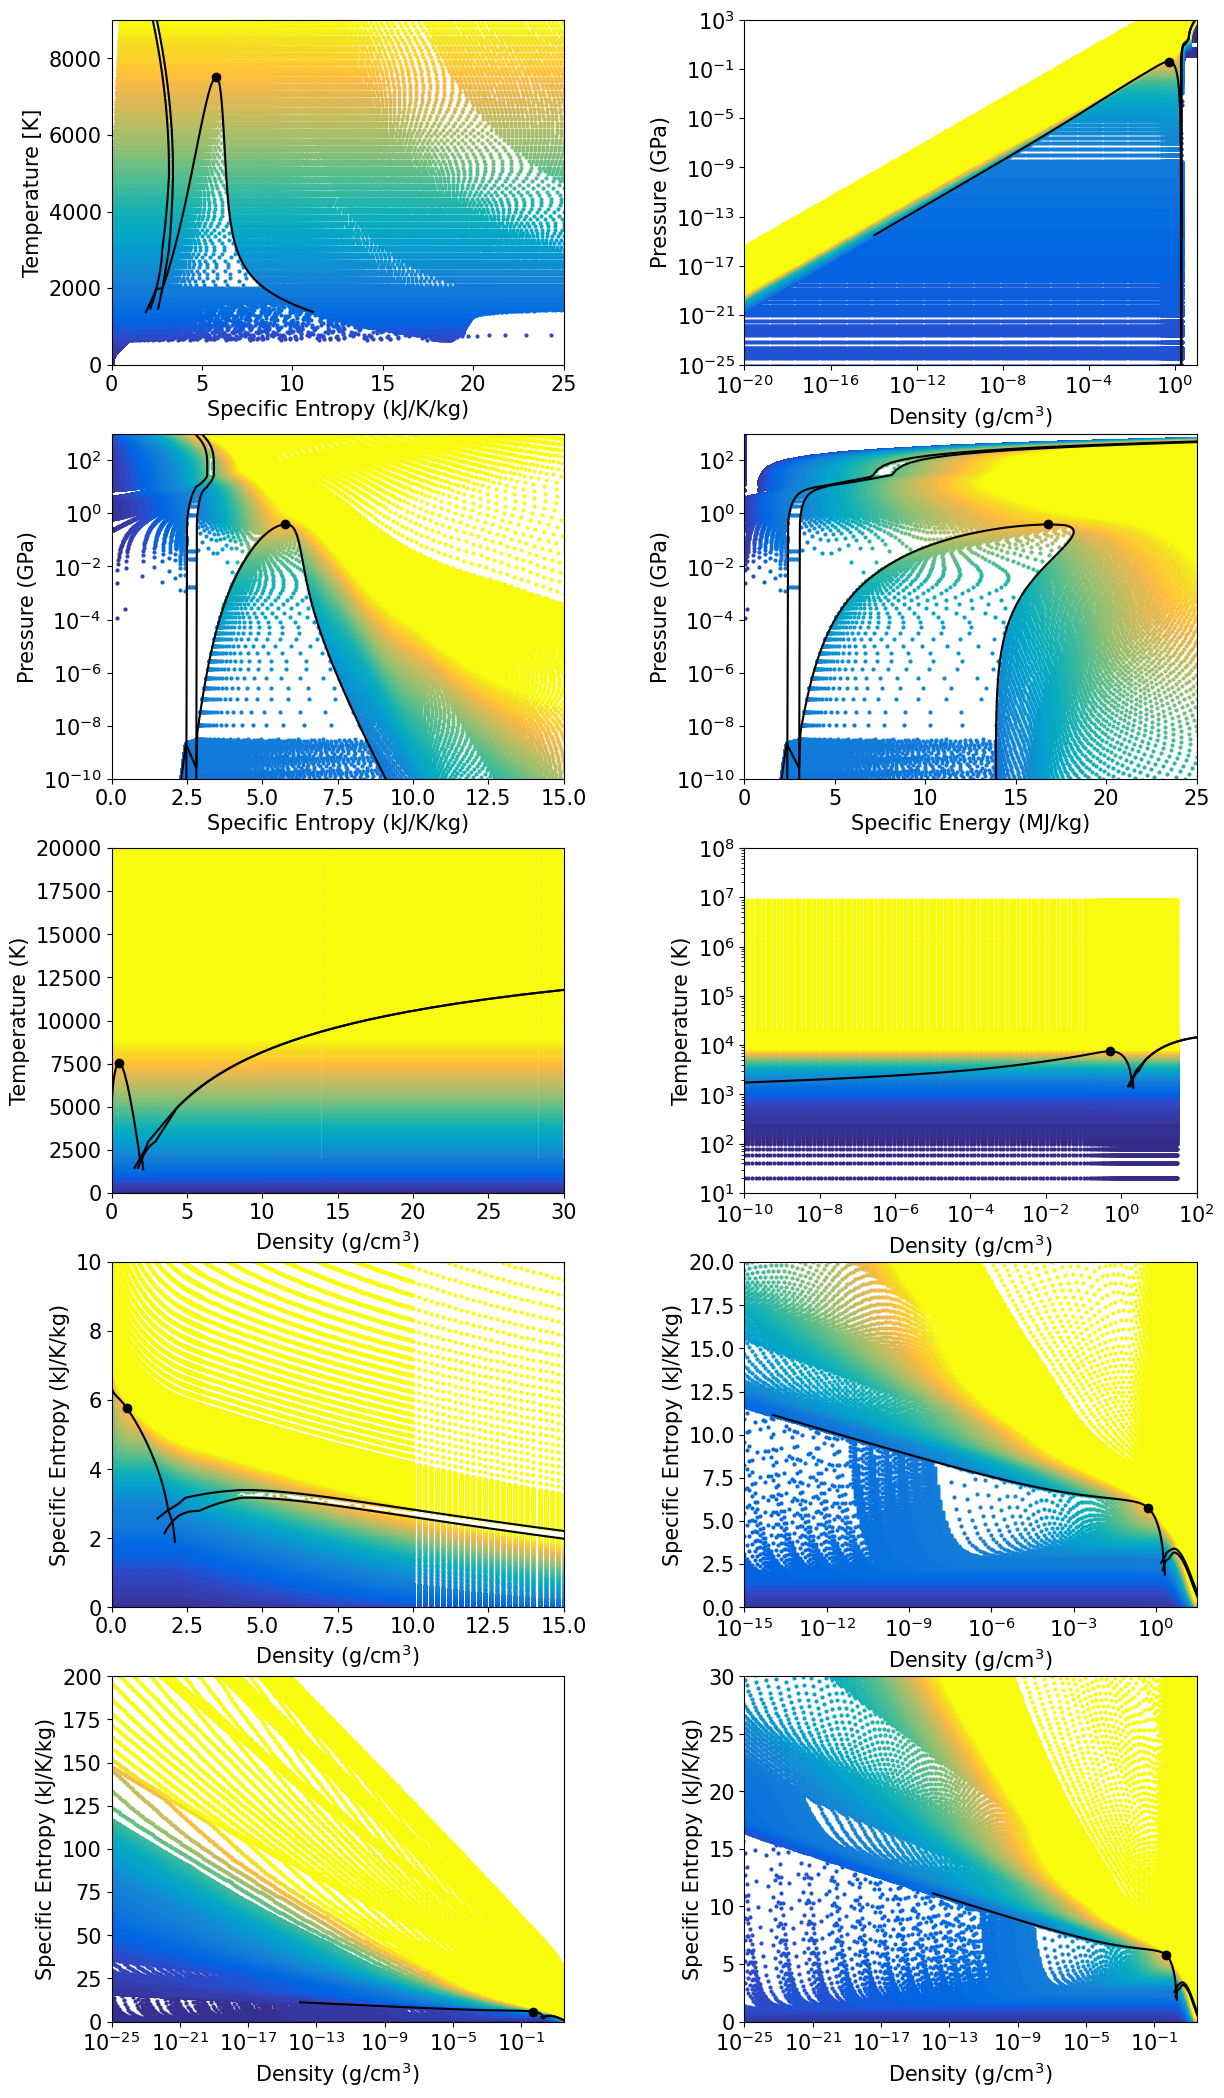

In [24]:
# check the gridding of the table around the vapor curve

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.4)
tcolmin=0.
tcolmax=1.2*NewEOS.cp.T
tpltmax=1.2*NewEOS.cp.T

tskip=1
#-------------
ai=0
aj=0
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[ai,aj].set_ylim(0,tpltmax)
axes[ai,aj].set_xlim(0,25)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.Sl*1.e3,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.Sv*1.e3,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.S*1.e3,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.T,color="black")


#-------------
ai=0
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col)
axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-25,1000)
axes[ai,aj].set_xlim(1.e-20,10.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.E3,NewEOS.P[it,:],'o',markersize=2,color=col)
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.e3,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.Sv*1.e3,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.S*1.e3,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(0,15)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=1
aj=1


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,color=col)

axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(0,25)
axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)



#-------------
ai=2
aj=0

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)
axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(0.,20000)
axes[ai,aj].set_xlim(0,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=2
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].loglog(NewEOS.rho,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-10,100.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=3
aj=0

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")


axes[ai,aj].set_ylim(0.,10)
axes[ai,aj].set_xlim(0.,15.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=3
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,20)
axes[ai,aj].set_xlim(1.E-15,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)




#-------------
ai=4
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,30)
axes[ai,aj].set_xlim(1.E-25,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=0

tcolmax=40000.
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,200)
axes[ai,aj].set_xlim(1.E-25,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#axes[0,0].legend(fontsize=sfont-5)
#axes[0,1].legend(fontsize=sfont-5)
#axes[1,0].legend(fontsize=sfont-5)
#axes[1,1].legend(fontsize=sfont-5)



# ANEOS KPA FLAG

                                TABLE          ANEOS
     KPAQQ=STATE INDICATOR      =1, 1p    =1, 1p    (eos without melt)
                                =2, 2p lv =2, 2p liquid/solid plus vapor
                                          =4, 1p solid  (eos with melt)
                                          =5, 2p melt   (eos with melt)
                                          =6, 1p liquid (eos with melt)
                                =-1 bad value of temperature
                                =-2 bad value of density
                                =-3 bad value of material number

To resolve a melt curve, there should be sufficient numbers of points within the melt curve (KPA=5, red points) so that the melt curve is continuously sampled in the grid.

The pink region is where the vapor pressure is bottomed out at 1.E-30 GPa or the pressures are negative (if there is a tension region.)

Every 10th isotherm is plotted.

Unique values in the KPA flag array: [2. 4. 5. 6.]
Value: # elements with this value
2.0 :  104934
4.0 :  213143
5.0 :  935
6.0 :  246665


(1e-22, 100.0)

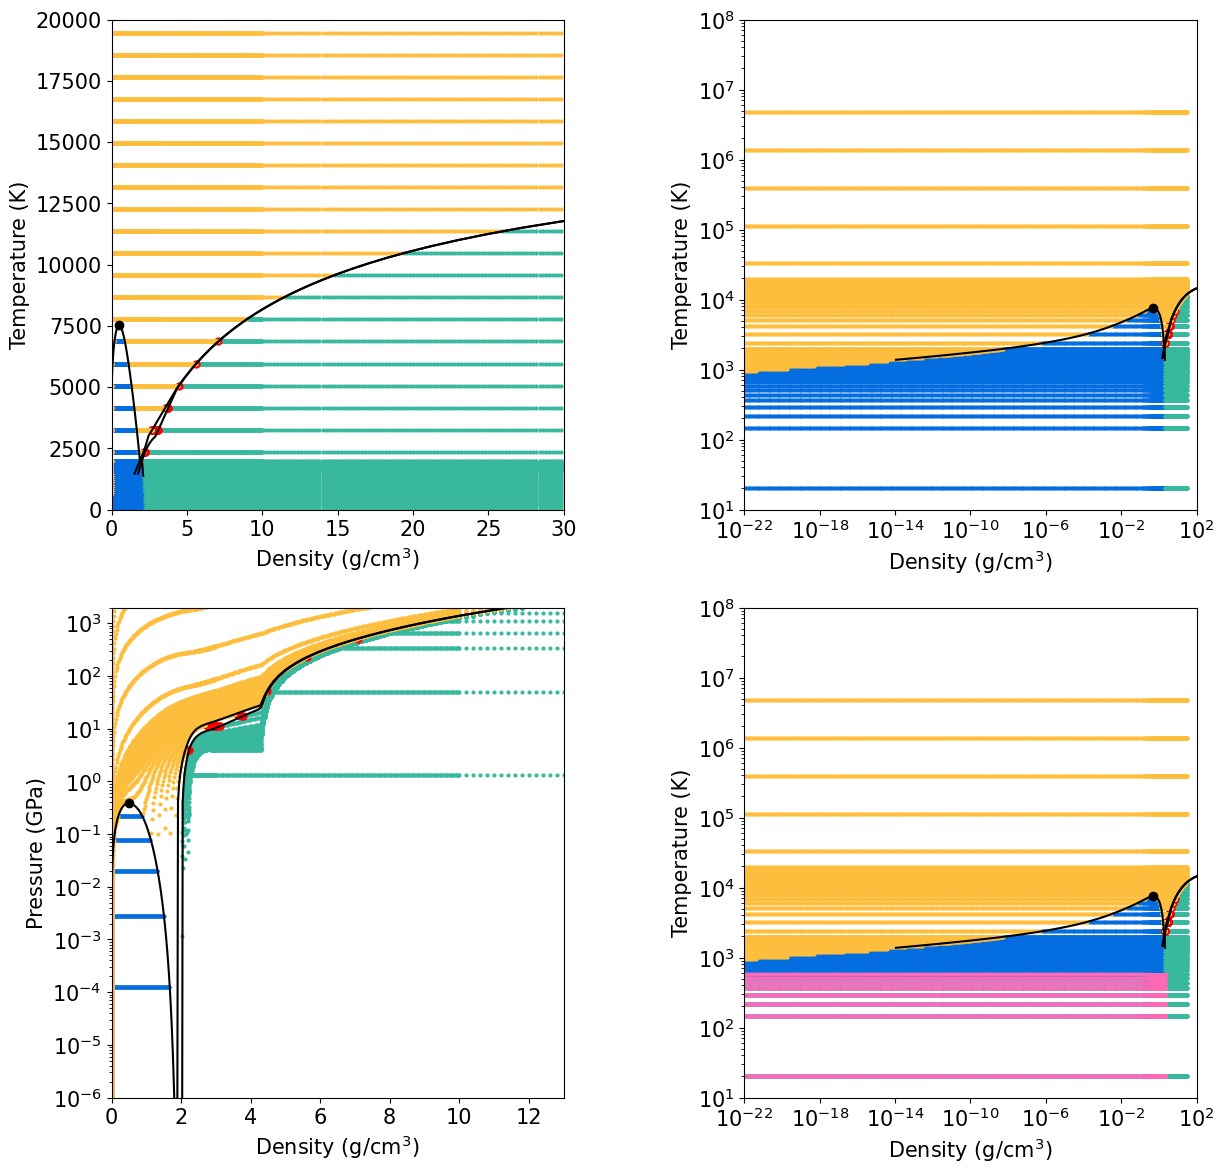

In [25]:
# check the ANEOS quality flag for errors in the EOS surface
uniqkarr = np.unique(NewEOS.KPA)
print("Unique values in the KPA flag array:", uniqkarr)
print("Value: # elements with this value")
#get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

for i in uniqkarr:
    ix = get_indexes(i,np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT))
    print(i,': ',len(ix))


    
# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)
kcolmin=1
kcolmax=7

tskip=10
#-------------


#-------------
ai=0
aj=0
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")


axes[ai,aj].set_ylim(0.,20000)
axes[ai,aj].set_xlim(0,30.)


#-------------
ai=0
aj=1

for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].loglog(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].loglog(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)

axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-22,100.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].semilogy(NewEOS.rho[ix],NewEOS.P[itt,ix],'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].semilogy(NewEOS.rho[ix],NewEOS.P[itt,ix],'o',markersize=2,color=col)

axes[ai,aj].semilogy(NewEOS.vc.rl,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-6,2000)
axes[ai,aj].set_xlim(0,13.)


#-------------
ai=1
aj=1
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)
    tmp = np.where(NewEOS.P[itt,:] < 0.)
    if (len(tmp[0]) > 0):
        axes[ai,aj].plot(NewEOS.rho[tmp[0]],np.full(len(tmp[0]),NewEOS.T[itt]),'o',markersize=2,color='purple')
    tmp = np.where(NewEOS.P[itt,:]*1.e30 <= 2.)
    if (len(tmp[0]) > 0):
        axes[ai,aj].plot(NewEOS.rho[tmp[0]],np.full(len(tmp[0]),NewEOS.T[itt]),'o',markersize=2,color='hotpink')

axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")
    
axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-22,100.)
#fig.show()

# Check the Melt Curve in Tabulated EOS

Colored lines correspond to isotherms. Black lines are ANEOS phase boundaries.

Tabulations of the equation of state can lead to erroneous material descriptions across the melt curve. In the following plots, the isotherms should be flat (constant pressure) across the phase boundary (black lines). Every 10th isotherm in the table is shown in the plotted regions.

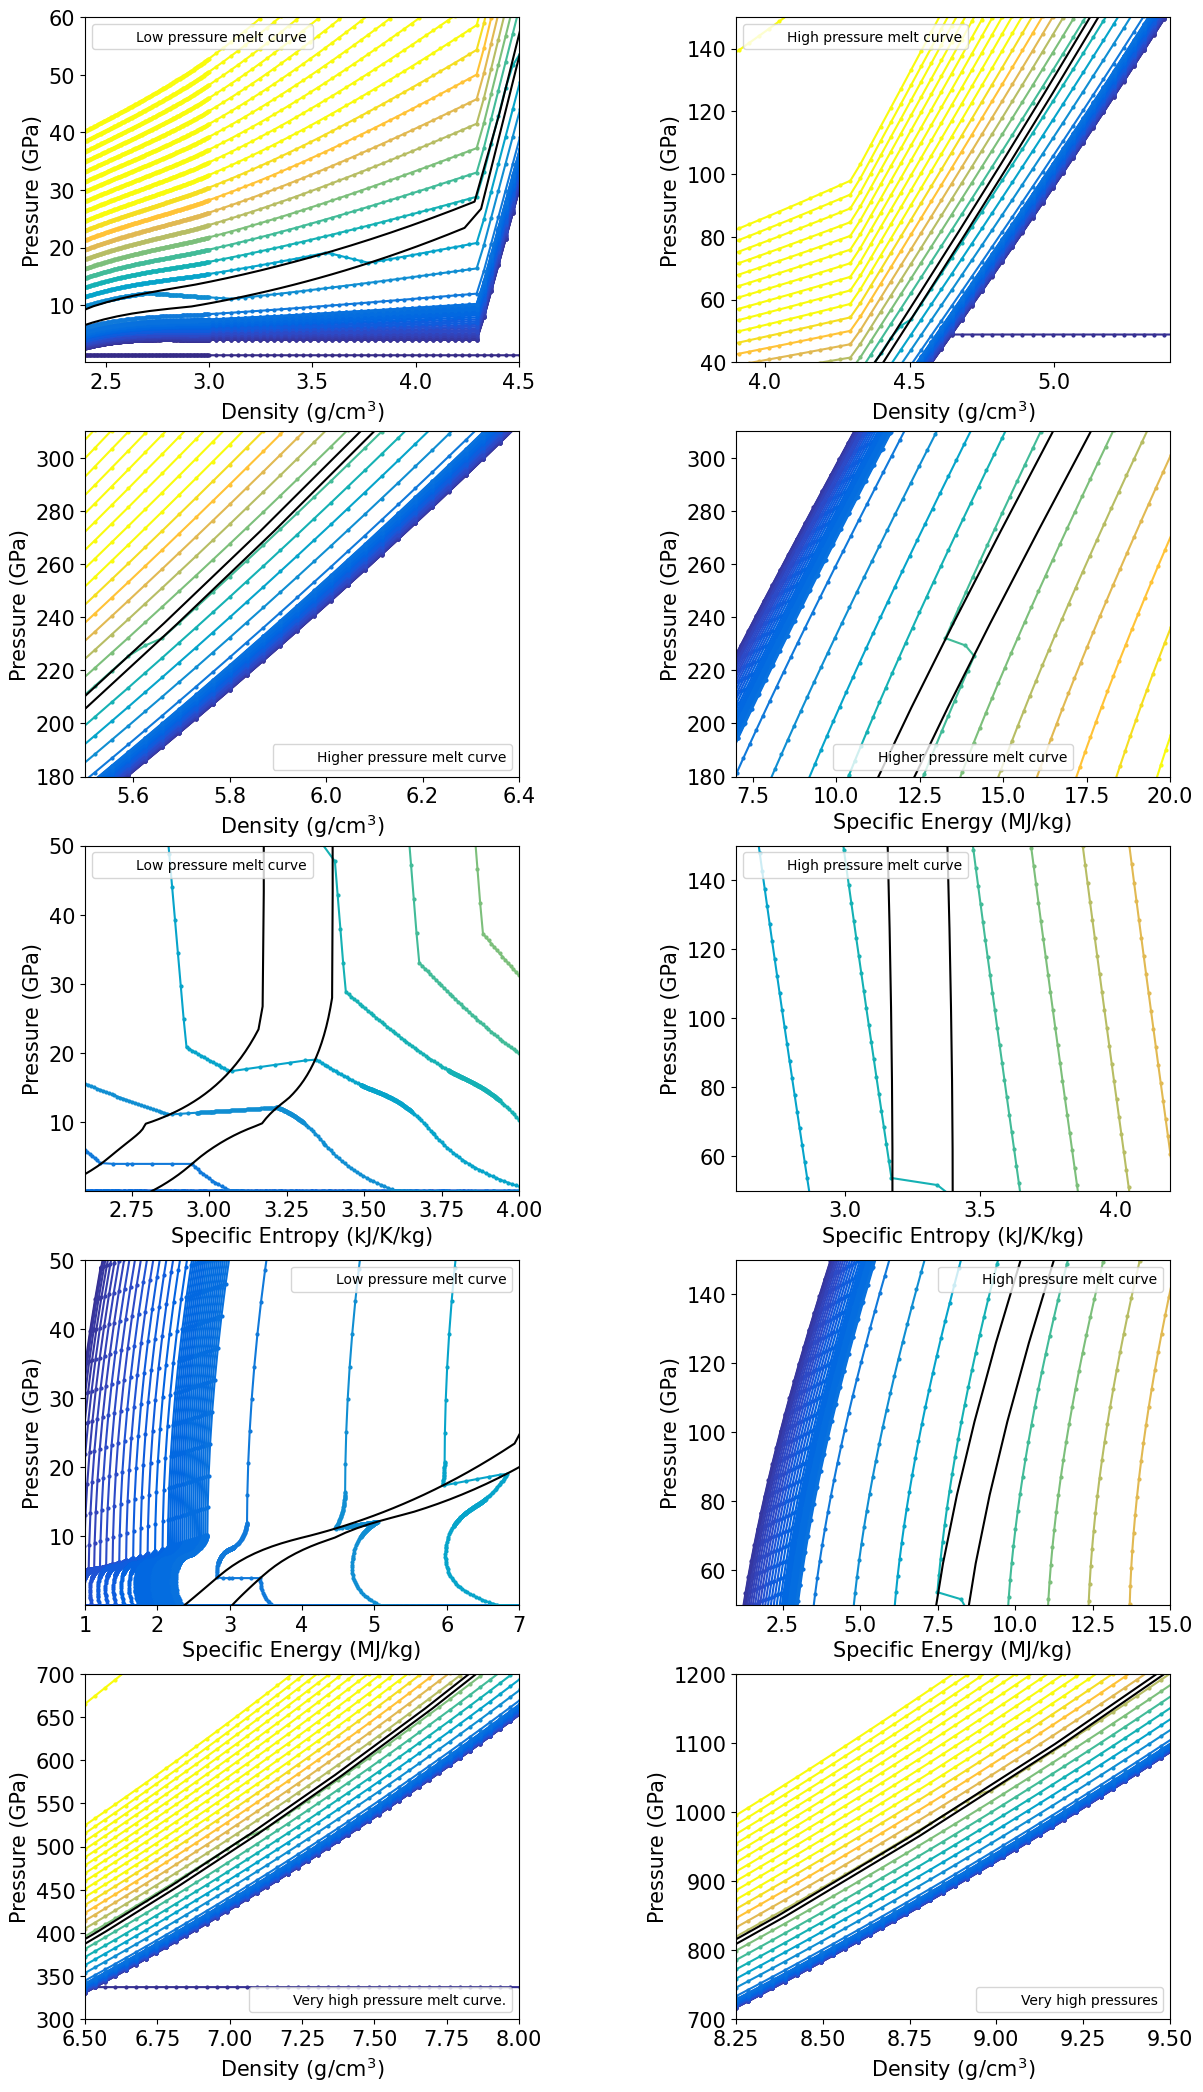

In [26]:
# CHECK MELT CURVE GRIDDING
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.5)
tcolmin=0.
tcolmax=1.5*NewEOS.cp.T
tpltmax=1.5*NewEOS.cp.T

tskip=10
#-------------
ai=0
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(.1,60)
axes[ai,aj].set_xlim(2.4,4.5)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=0
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(40.,150)
axes[ai,aj].set_xlim(3.9,5.4)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")


axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(5.5,6.4)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=1
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(7,20)

#-------------

ai=2
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(.1,50)
axes[ai,aj].set_xlim(2.6,4.)


#-------------

ai=2
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(2.6,4.2)


#-------------
ai=3
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_xlim(1,7)
axes[ai,aj].set_ylim(.1,50)

#-------------
ai=3
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(1,15)



#-------------
ai=4
aj=0
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col,linestyle='-')

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(300,700)
axes[ai,aj].set_xlim(6.5,8.)

axes[ai,aj].plot([],[],' ',label='Very high pressure melt curve.')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(700,1200)
axes[ai,aj].set_xlim(8.25,9.5)

axes[ai,aj].plot([],[],' ',label='Very high pressures')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)
axes[4,0].legend(fontsize=sfont-5)
axes[4,1].legend(fontsize=sfont-5)



# References

<references need updating>

Andrault, D., Bolfan-Casanova, N., Bouhifd, M. A., Boujibar, A., Garbarino, G., Manthilake, G., ... & Pesce, G. (2017). Toward a coherent model for the melting behavior of the deep Earth’s mantle. Physics of the Earth and Planetary Interiors, 265, 67-81.

Asimow, P. D. (2018). Melts under extreme conditions from shock experiments, in Magmas Under Pressure, Elsevier, p. 387-418. https://doi.org/10.1016/B978-0-12-811301-1.00015-0

Asimow P. D. and Ahrens T. J. (2010) Shock compression of liquid silicates to 125 GPa: the anorthite–diopside join. J. Geophys. Res. 115, B10209. doi:10.1029/2009JB007145.

Asimow P. D., Ghiorso M. S. (1998) Algorithmic Modifications Extending MELTS to Calculate Subsolidus Phase Relations. American Mineralogist 83, 1127-1131.

Caracas, R., Stewart, S. T. (in review) No magma ocean surface after giant impacts between rocky planets.

Centolanzi, F. J., & Chapman, D. R. (1966). Vapor pressure of tektite glass and its bearing on tektite trajectories determined from aerodynamic analysis. Journal of Geophysical Research, 71(6), 1735-1749.

Chase Jr, M. W., Curnutt, J. L., Downey Jr, J. R., McDonald, R. A., Syverud, A. N., & Valenzuela, E. A. (1982). JANAF thermochemical tables, 1982 supplement. Journal of Physical and Chemical Reference Data, 11(3), 695-940.  https://janaf.nist.gov

Costa, G. C., Jacobson, N. S., & Fegley Jr, B. (2017). Vaporization and thermodynamics of forsterite-rich olivine and some implications for silicate atmospheres of hot rocky exoplanets. Icarus, 289, 42-55.

de Koker, N. P., Stixrude, L., & Karki, B. B. (2008). Thermodynamics, structure, dynamics, and freezing of Mg2SiO4 liquid at high pressure. Geochimica et Cosmochimica Acta, 72(5), 1427-1441.

Davies, E.J., Carter, P.J., Root, S., Kraus, R.G., Spaulding, D.K., Stewart, S.T., Jacobsen, S.B. (2019) Silicate Melting and Vaporization during Rocky Planet Formation, J. Geophys. Res. Planets, submitted.

Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.

Fiquet, G., Auzende, A. L., Siebert, J., Corgne, A., Bureau, H., Ozawa, H., & Garbarino, G. (2010). Melting of peridotite to 140 gigapascals. Science, 329(5998), 1516-1518.

Gillet, P., Richet, P., Guyot, F., & Fiquet, G. (1991). High‐temperature thermodynamic properties of forsterite. Journal of Geophysical Research: Solid Earth, 96(B7), 11805-11816.

Ghiorso, Mark S., and Sack, Richard O. (1995) Chemical Mass Transfer in Magmatic Processes. IV. A Revised and Internally Consistent Thermodynamic Model for the Interpolation and Extrapolation of Liquid-Solid Equilibria in Magmatic Systems at Elevated Temperatures and Pressures. Contributions to Mineralogy and Petrology, 119, 197-212.

Hosono, N., Karato, S. I., Makino, J., & Saitoh, T. R. (2019). Terrestrial magma ocean origin of the Moon. Nature Geoscience, 1, 418-423.

Jacobsen, S.D., Holl, C.M., Adams, K.A., Fischer, R.A., Martin, E.S., Bina, C.R., Lin, J.F., Prakapenka, V.B., Kubo, A. and Dera, P., 2008. Compression of single-crystal magnesium oxide to 118 GPa and a ruby pressure gauge for helium pressure media. American Mineralogist, 93(11-12), pp.1823-1828.

Jing, Z, and Karato, S. (2011) A new approach to the equation of state of silicate melts: An application of the theory of hard sphere mixtures, Geochimica et Cosmochimica Acta 75, 6780–6802.

Kraus, R.G., Stewart, S.T., Swift, D.C., Bolme, C.A., Smith, R.F., Hamel, S., Hammel, B.D., Spaulding, D.K., Hicks, D.G., Eggert, J.H. and Collins, G.W. (2012). Shock vaporization of silica and the thermodynamics of planetary impact events. Journal of Geophysical Research: Planets, 117(E9), E09009, doi:10.1029/2012JE004082.

Kumazawa, M., & Anderson, O. L. (1969). Elastic moduli, pressure derivatives, and temperature derivatives of single‐crystal olivine and single‐crystal forsterite. Journal of Geophysical Research, 74(25), 5961-5972.

Luo, S. N., Akins, J. A., Ahrens, T. J., & Asimow, P. D. (2004). Shock‐compressed MgSiO$_3$ glass, enstatite, olivine, and quartz: Optical emission, temperatures, and melting. Journal of Geophysical Research: Solid Earth, 109(B5).

Lyon, S. P., & Johnson, J. D. (1992). SESAME: The LANL equation of state database. Los Alamos National Laboratories Report LAUR-92-3407, Los Alamos, NM.

McDonough, W. and Sun, S.-s. (1995). The composition of the Earth. Chemical Geology 120, 223-253.

Marinova, M. M., Aharonson, O., & Asphaug, E. (2011). Geophysical consequences of planetary-scale impacts into a Mars-like planet. Icarus, 211(2), 960-985.

Mosenfelder, J. L., Asimow, P. D., & Ahrens, T. J. (2007). Thermodynamic properties of Mg2SiO4 liquid at ultra‐high pressures from shock measurements to 200 GPa on forsterite and wadsleyite. Journal of Geophysical Research: Solid Earth, 112(B6).

Mysen, B. O., & Kushiro, I. (1988). Condensation, evaporation, melting, and crystallization in the primitive solar nebula; experimental data in the system MgO-SiO$_2$-H$_2$ to $1.0\times10^{-9}$ bar and 1870 degrees C with variable oxygen fugacity. American Mineralogist, 73(1-2), 1-19.

Nagahara, H., Kushiro, I., & Mysen, B. O. (1994). Evaporation of olivine: Low pressure phase relations of the olivine system and its implication for the origin of chondritic components in the solar nebula. Geochimica et cosmochimica acta, 58(8), 1951-1963.

Richet, P., Leclerc, F., & Benoist, L. (1993). Melting of forsterite and spinel, with implications for the glass transition of Mg$_2$SiO$_4$ liquid. Geophysical Research Letters, 20(16), 1675-1678.

Robie, R. A., Hemingway, B. S., & Takei, H. (1982). Heat capacities and entropies of Mg$_2$SiO$_4$, Mn$_2$SiO$_4$, and Co$_2$SiO$_4$ between 5 and 380 K. American Mineralogist, 67(5-6), 470-482.

Root, S., Townsend, J.P., Davies, E., Lemke, R.W., Bliss, D.E., Fratanduono, D.E., Kraus, R.G., Millot, M., Spaulding, D.K., Shulenburger, L. and Stewart, S.T. (2018). The principal Hugoniot of forsterite to 950 GPa. Geophysical Research Letters, 45(9), 3865-3872.

Solomatova, N. V., & Caracas, R. (2019). Pressure‐induced coordination changes in a pyrolitic silicate melt from ab initio molecular dynamics simulations. Journal of Geophysical Research: Solid Earth, 124, 11232–11250. https://doi.org/10.1029/2019JB018238

Suzuki, A., & Ohanti, E. (2003). Density of peridotite melts at high pressure. Phys. Chem. Minerals 30, 449-456, doi:10.1007/s00269-003-0322-6.

Thomas, C. W., & Asimow, P. D. (2013). Direct shock compression experiments on premolten forsterite and progress toward a consistent high‐pressure equation of state for CaO‐MgO‐Al$_2$O$_3$‐SiO$_2$‐FeO liquids. Journal of Geophysical Research: Solid Earth, 118(11), 5738-5752.

Tillotson, J. H. (1962). Metallic equations of state for hypervelocity impact (No. GA-3216). General Atomics Division, General Dynamics, San Diego, CA.

Townsend, J. P., Shohet, G., & Cochrane, K. R. (2020). Liquid-vapor coexistence and critical point of Mg2SiO4 from ab initio simulations. Geophysical Research Letters, 47, e2020GL089599. https:// doi.org/10.1029/2020GL089599

Vanpeteghem, C. B., Zhao, J., Angel, R. J., Ross, N. L., & Bolfan‐Casanova, N. (2006). Crystal structure and equation of state of MgSiO3 perovskite. Geophysical Research Letters, 33(3), 2005GL024955.

Xiao, B., & Stixrude, L. (2018). Critical vaporization of MgSiO$_3$. Proceedings of the National Academy of Sciences, 115(21), 5371-5376.

Zeman, M., Holec, M., & Váchal, P. (2019). HerEOS: A framework for consistent treatment of the Equation of State in ALE hydrodynamics. Computers & Mathematics with Applications, 78(2), 483-503.

## ANEOS references
Collins, Gareth S., and H. Jay Melosh (2014). Improvements to ANEOS for multiple phase transitions. 45th Lunar Planet. Sci. Conf. Abs. 2664.

Melosh, H. J. (2007). A hydrocode equation of state for SiO$_2$. Meteoritics & Planetary Science, 42(12), 2079-2098.

Thompson, S. L. (1990). ANEOS analytic equations of state for shock physics codes input manual. SANDIA REPORT SAND, 89-2951.

Thompson, S. L., & Lauson, H. S. (1974). Improvements in the Chart D radiation-hydrodynamic CODE III: Revised analytic equations of state (No. SC-RR--71-0714). Sandia Labs.

Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019, November 1). M-ANEOS (Version 1.0). Zenodo. http://doi.org/10.5281/zenodo.3525030

Stewart, S. T. (2019). ANEOS Code Modification: Thermal model adjustment parameter. https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/

# ANEOS Input Parameters

EOS -1: low temperature solid model<br>
THUG, RHUG: initial state for the Hugoniot calculated in ANEOS.OUTPUT. <br>
<p>
V01 nelem = 1: This model has 1 elements: Si, O. <br>
V02 model type=4: solid-liquid-gas model with ionization<br>
V03 rho0=2.2 g/cm3: reference solid density at the reference state, in this case STP.<br>
V04 T0=298 K: reference state is STP.<br>
V05 P0=1.e6 dynes/cm2: reference state STP.<br>
V06 B0=0.40E12 dynes/cm2: bulk modulus is close to alpha-quartz true value.<br>
V07 gamma0=0.57: Grueneisen parameter.<br>
V08 Tdebye=-1600.0 K: fitted to obtain an entropy of vaporization for silica. Negative means use full Debye model.<br>
<p>
V09 TG model=1: based on free-volume theory, generate a derivative of the bulk modulus near 4.<br>
V10 3*C24=6.0: Compromise value for the gamma function to span solid to liquid. <br>
V11 Esep=1.2E11 erg/g: Zero temperature separation energy. Fitted to match the triple point pressure and critical point temperature.<br>
V12 Tmelt=1996 K: Melting temperature at reference pressure. Here, using the value for alpha-quartz from Bourova and Richet 1998..<br>
V13 C53=0 erg/g: Critical point adjustment parameter. Not used.<br>
V14 C54=0. [dimless]: Critical point adjustment parameter. Not used.<br>
V15 H0=0: Thermal conduction parameter. Not used.<br>
V16 C41=0: Thermal conduction parameter. Not used.<br>
<p>
V17 rhomin=0 g/cm3: minimum density for the solid. Defines the tension region in the model. The default value is 0.8*rho0 when rhomin=0.<br>
V18=2.92 g/cm3: Solid-solid phase transition parameter. Density at onset of transition. <br>
V19=4.30 g/cm3: Solid-solid phase transition parameter. Density at end of transition. <br>
V20=0.4E11 dynes/cm2: Solid-solid phase transition parameter. Pctr, pressure at the center of the transition. <br>
V21=2.85E12: Solid-solid phase transition parameter. First derivative of Pctr with respect to density. Bulk modulus of stishovite. https://doi.org/10.1016/0167-6636(93)90083-4 <br>

V22=1.E1: Solid-solid phase transition parameter. Second derivative of Pctr with respect to density. <br>
V23 Hfusion=0.66E10 erg/g: Latent heat of fusion at the reference pressure. Fitted to provide a melt curve similar to Millot et al. 2015.<br>
V24 rhol/rhos=0.93: Volume change on melting. Compromise value. <br>
<p>
V25 upper=0.0: Upper limit to cold compression curve extension. Default=1. Setting to zero means use default value.<br>
V26 lower=0.: Default=0.<br>
V27 alpha=0.3: Liquid model parameter ($0<\alpha<1$, default=0.3).<br>
V28 beta=0.1: Liquid model parameter ($0<\beta<1$, default=0.1). beta cannot be equal to gamma.<br>
V29 gamma=0.3: Liquid model parameter ($0<\gamma<1$, default=0.2). beta cannot be equal to gamma.<br>
V30 C60=0: Gamma model adjustment parameter. Default=0.<br>
V31 C61=-0.851 Gamma model adjustment parameter to provide best fit to the critical point. Default=0.<br>
V32 C62=0.5: Critical point adjustment parameter. Default=0. ($0<C63<1$). Fitted to improve critical point.<br>
<p>
V33 Ionization model=0=Saha model.<br>
V34-V35=0: Reactive chemistry model not used.<br>
Melosh molecular clusters model for the critical point (Melosh fitted values for V36-V43):<br>
V36 Natom=2: number of atoms in molecular clusters<br>
V37 Ebind=5.0 eV: Binding energy<br>
V38 RotDOF=2.0: Rotational degrees of freedom, 2 for diatomic molecule<br>
V39 Rbond=1.5E-8 cm: Length of molecular bond (cm)<br>
V40 VibDOF=1: Numer of vibrational degrees of freedom, 1 for diatomic molecule<br>
<p>
V41 Tdebye=2000 K: Vibrational Debye temperature<br>
V42 Mieflag=1: Flag for Mie potential (1) or Morse potential.<br>
V43 a_exp=1.7: Power in Mie potential (1 to 2). Fitted to improve critical point<br>
V44 $f_{cv}=1.40$: Adjust heat capacity in high temperature limit. $C_v=3f_{cv}NkT$.<br>
V45 QCC1: 1.E-30. low density value to transition to ideal gas.<br>
V45 QCC6: 1.E5. high temperature psi value to transition to ideal gas.<br>
V46 to V48=0: Variables not used.<br>
<p>
Atomic number and atom fraction:<br>
 8        0.66667<br>
14        0.33333<br>


# Development Notes

This preliminary fused silica model was developed using the data from K. Amodeo's PhD thesis (manuscript in prep.).



End of File

##### 